C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\FunctionsAndClass.py:12: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


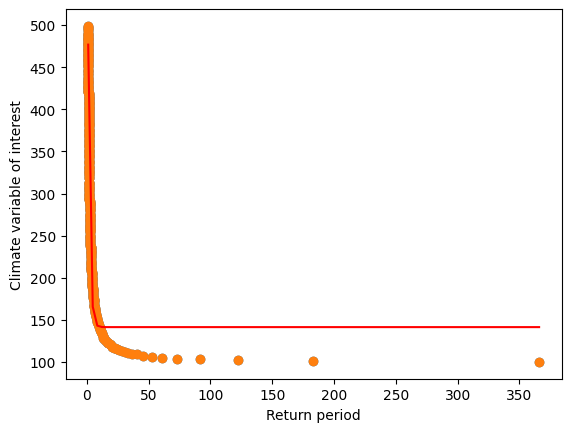

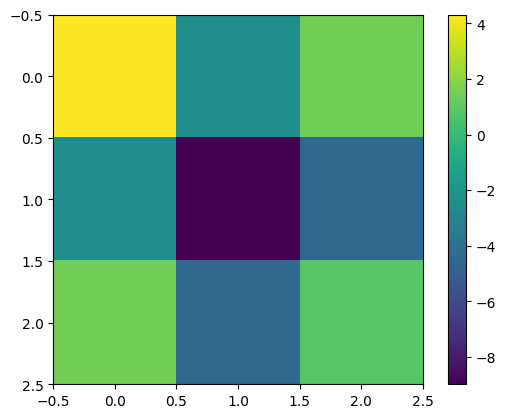

In [1]:
## Import packages ..... 
import cdsapi
import os
import os.path
import shutil # to move folders


## ..... and function
from FunctionsAndClass import year_copernicus
from FunctionsAndClass import path_length

In [2]:
## list all element necessary for download
class obs_elements:
    versions = ('v1.0','v2.0','v2020.0','v2020.0-v6.0-fg','v4.0','v4.03','v6.0')
    origins = ('berkearth','chirps','cmorph','cpc','cpc-conus','cru','gistemp','gpcc','imerg')
    # test only with chirps and cru at the beginning
    horizontal_aggregations = ('0_25_x_0_25','0_2_x_0_2','0_5_x_0_5','1_x_1','2_5_x_2_5','horizontal_average')
    time_aggregations = ('daily','monthly')
    regions = ('africa','global','conus','quasi_global')
    variables = ('precipitation','temperature','temperature_anomaly')
    statistics = ('NaN','maximum','mean','minimum') # NaN for when statistic is not needed

In [ ]:
len(obs_elements.versions)

In [ ]:
len(obs_elements.origins)

In [ ]:
len(obs_elements.horizontal_aggregations)

In [ ]:
len(obs_elements.time_aggregations)

In [ ]:
len(obs_elements.regions)

In [ ]:
len(obs_elements.variables)

In [ ]:
len(obs_elements.statistics)

In [3]:
# create a list of iterable for the later for loop which will be use to download elements
list_obs_elements = []
for statistic in obs_elements.statistics:
    for origin in obs_elements.origins:
        for horizontal_aggregation in obs_elements.horizontal_aggregations:
            for time_aggregation in obs_elements.time_aggregations:
                for region in obs_elements.regions:
                    for variable in obs_elements.variables:
                        for version in obs_elements.versions:
                            list_obs_elements.append((version,origin,horizontal_aggregation,time_aggregation,region,variable,statistic))

In [4]:
list_obs_elements

[('v1.0',
  'berkearth',
  '0_25_x_0_25',
  'daily',
  'africa',
  'precipitation',
  'NaN'),
 ('v2.0',
  'berkearth',
  '0_25_x_0_25',
  'daily',
  'africa',
  'precipitation',
  'NaN'),
 ('v2020.0',
  'berkearth',
  '0_25_x_0_25',
  'daily',
  'africa',
  'precipitation',
  'NaN'),
 ('v2020.0-v6.0-fg',
  'berkearth',
  '0_25_x_0_25',
  'daily',
  'africa',
  'precipitation',
  'NaN'),
 ('v4.0',
  'berkearth',
  '0_25_x_0_25',
  'daily',
  'africa',
  'precipitation',
  'NaN'),
 ('v4.03',
  'berkearth',
  '0_25_x_0_25',
  'daily',
  'africa',
  'precipitation',
  'NaN'),
 ('v6.0',
  'berkearth',
  '0_25_x_0_25',
  'daily',
  'africa',
  'precipitation',
  'NaN'),
 ('v1.0', 'berkearth', '0_25_x_0_25', 'daily', 'africa', 'temperature', 'NaN'),
 ('v2.0', 'berkearth', '0_25_x_0_25', 'daily', 'africa', 'temperature', 'NaN'),
 ('v2020.0',
  'berkearth',
  '0_25_x_0_25',
  'daily',
  'africa',
  'temperature',
  'NaN'),
 ('v2020.0-v6.0-fg',
  'berkearth',
  '0_25_x_0_25',
  'daily',
  'afric

In [5]:
len(list_obs_elements)

36288

In [6]:
def download_extract(path_for_file,source):
    if not os.path.isdir(path_for_file): # path_for_file does not exists, need to ensure that is is created
        os.makedirs(path_for_file) # to ensure the creation of the path
    # unzip the downloaded file
    from zipfile import ZipFile
    zf = ZipFile('download.zip', 'r')
    zf.extractall(source) # if no precision of directory, extract in current directory
    zf.close()

    #if not os.path.isdir(file_download): # path_for_file does not exists, need to ensure that is is created
    #   os.makedirs(file_download) # to ensure the creation of the path
    # moving download to appropriate place
    #shutil.move('download.zip',file_download) # no need to delete 'download.zip' from inital place
    shutil.move(source,path_for_file) # move extracted data to the path created for them
    #path_file=os.path.join(path_for_file,source)
    print('\n ------------------------------------- The downloaded file is extracted -------------------------------------')
    #os.remove('download.zip') # delete 'download.zip' from current directory
    return #path_file

In [7]:
# this function define the start_date, dependent on the origin
def f_start_date(origin):
    # start_date depend on the origin
    if origin == 'berkearth':
        start_date = 1950
    if origin == 'chirps':
        start_date = 1981
    if origin == 'cmorph':
        start_date = 1998
    if origin == 'cpc':
        start_date = 1979
    if origin == 'cpc-conus':
        start_date = 1950
    if origin == 'cru':
        start_date = 1950
    if origin == 'gistemp':
        start_date = 1950
    if origin == 'gpcc':
        start_date = 1950
    if origin == 'imerg':
        start_date = 2000
    return start_date

# this function defines the period of the set of data
def f_period_str(origin):
    # stop_date is the same for every origin
    stop_date = 2015
    start_date = f_start_date(origin) # start_date depend on the origin
    period = str(start_date) +' - '+str(stop_date)
    return period

## this function produce the year vector, which is dependent on the origin

def year_temp_pr_obs(origin):
    # stop_date is the same for every origin
    stop_date = 2015
    start_date = f_start_date(origin) # start_date depend on the origin
    # produce vector of years
    (year, year_str, index)= year_copernicus(start_date,stop_date)
    return year_str

In [8]:
## this function aim to download observation data of https://cds.climate.copernicus.eu/cdsapp#!/dataset/insitu-gridded-observations-global-and-regional?tab=form
# the function returns the path where the data has been downloaded
def try_download_copernicus_temp_pr_obs(version,origin,horizontal_aggregation,time_aggregation,region,variable,statistic,path_for_file,source):
    # produce the year vector, which is dependent on the origin
    year = year_temp_pr_obs(origin)
    
    # start the API request
    c = cdsapi.Client()# function to use the c.retrieve
    # basic needed dictionnary to give to the c.retrieve function the parameters asked by the user
    variables = {
                'format': 'zip', # this function is only designed to download and unzip zip files
                'version': version,
                'origin': origin,
                'year': year,
                'horizontal_aggregation': horizontal_aggregation,
                'time_aggregation': time_aggregation,
                'region': region,
                'variable': variable,
    }
    
    if statistic != 'NaN':
        variables['statistic'] = statistic
    
    try:
        c.retrieve(
            'insitu-gridded-observations-global-and-regional',
            variables,
            'download.zip') # the file in a zip format is registered in the current directory
    except:
        print('------------------------------- Some parameters are not matching -------------------------------')
        return # stop the function, because some data the user entered are not matching
    
    # function to extract the downloaded zip
    #path_file=download_extract(path_for_file,file_download,source)
    download_extract(path_for_file,source)
    return #path_file

In [10]:
# define path and source of data
out_path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\Observations'
source = 'copernicus-data-in-situ-and-satellite'
# start testing if data exists and if yes, download them with function try_download_copernicus_temp_pr_obs
count = 0
for (version, origin, horizontal_aggregation,time_aggregation, region,variable,statistic) in list_obs_elements:
    count +=1
    print('\n')    
    print('version: ' +version)
    print('\n')    
    print('origin: ' +origin)
    print('\n')
    print('horizontal_aggregation: ' +horizontal_aggregation)
    print('\n')
    print('time_aggregation: ' +time_aggregation)
    print('\n')
    print('region: ' +region )
    print('\n')
    print('variable: '+ variable)
    print('\n')
    print('statistic: ' +statistic)
    print('\n')
    period = f_period_str(origin) # produce string of the considered period, to integrate period in the path
    path_for_file = os.path.join(out_path,variable, region,period, time_aggregation, horizontal_aggregation, origin, version) # create string of the path
    if statistic != 'NaN': # a statitics is requested
        path_for_file = os.path.join(path_for_file, statistic) # add statistic in the path
    path_for_file=path_length(path_for_file)# test if path is too long
    # try to download the data with the parameter of the loop. If the parameter match, the file will be dowloaded 
    # and extract within the same function try_download_copernicus_temp_pr_obs
    try_download_copernicus_temp_pr_obs(version,origin,horizontal_aggregation,time_aggregation,region,variable,statistic,path_for_file,source)

os.remove('download.zip') # delete 'download.zip' from current directory



version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:37:02,499 INFO Welcome to the CDS
2023-05-24 15:37:02,500 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-global-and-regional
2023-05-24 15:37:02,602 INFO Request is queued
2023-05-24 15:37:03,645 INFO Request is failed
2023-05-24 15:37:03,646 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:03,647 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:03,648 ERROR   Traceback (most recent call last):
2023-05-24 15:37:03,650 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:03,651 ERROR       result = handle_locally()
2023-05-24 15:37:03,651 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:03,652 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:03,652 ERROR     File "/o

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:37:04,840 INFO Request is failed
2023-05-24 15:37:04,842 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:04,843 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:04,844 ERROR   Traceback (most recent call last):
2023-05-24 15:37:04,845 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:04,845 ERROR       result = handle_locally()
2023-05-24 15:37:04,846 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:04,846 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:04,847 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:04,847 ERROR       raise exception
2023-05-24 15:37:04,848 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:37:06,019 INFO Request is failed
2023-05-24 15:37:06,020 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:06,020 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:06,021 ERROR   Traceback (most recent call last):
2023-05-24 15:37:06,021 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:06,021 ERROR       result = handle_locally()
2023-05-24 15:37:06,022 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:06,023 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:06,023 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:06,024 ERROR       raise exception
2023-05-24 15:37:06,024 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:37:07,209 INFO Request is failed
2023-05-24 15:37:07,210 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:07,211 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:07,212 ERROR   Traceback (most recent call last):
2023-05-24 15:37:07,213 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:07,214 ERROR       result = handle_locally()
2023-05-24 15:37:07,214 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:07,215 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:07,215 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:07,216 ERROR       raise exception
2023-05-24 15:37:07,216 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:37:08,370 INFO Request is failed
2023-05-24 15:37:08,372 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:08,373 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:08,374 ERROR   Traceback (most recent call last):
2023-05-24 15:37:08,375 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:08,376 ERROR       result = handle_locally()
2023-05-24 15:37:08,377 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:08,378 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:08,378 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:08,379 ERROR       raise exception
2023-05-24 15:37:08,379 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:37:09,535 INFO Request is failed
2023-05-24 15:37:09,535 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:09,536 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:09,538 ERROR   Traceback (most recent call last):
2023-05-24 15:37:09,538 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:09,538 ERROR       result = handle_locally()
2023-05-24 15:37:09,539 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:09,539 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:09,540 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:09,540 ERROR       raise exception
2023-05-24 15:37:09,542 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:37:10,727 INFO Request is failed
2023-05-24 15:37:10,729 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:10,731 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:10,733 ERROR   Traceback (most recent call last):
2023-05-24 15:37:10,735 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:10,736 ERROR       result = handle_locally()
2023-05-24 15:37:10,736 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:10,737 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:10,738 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:10,739 ERROR       raise exception
2023-05-24 15:37:10,740 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:37:11,910 INFO Request is failed
2023-05-24 15:37:11,911 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:11,912 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:11,912 ERROR   Traceback (most recent call last):
2023-05-24 15:37:11,913 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:11,914 ERROR       result = handle_locally()
2023-05-24 15:37:11,915 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:11,915 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:11,916 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:11,916 ERROR       raise exception
2023-05-24 15:37:11,917 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:37:13,085 INFO Request is failed
2023-05-24 15:37:13,086 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:13,087 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:13,088 ERROR   Traceback (most recent call last):
2023-05-24 15:37:13,088 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:13,089 ERROR       result = handle_locally()
2023-05-24 15:37:13,089 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:13,090 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:13,090 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:13,091 ERROR       raise exception
2023-05-24 15:37:13,092 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:37:14,259 INFO Request is failed
2023-05-24 15:37:14,259 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:14,260 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:14,261 ERROR   Traceback (most recent call last):
2023-05-24 15:37:14,262 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:14,263 ERROR       result = handle_locally()
2023-05-24 15:37:14,263 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:14,264 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:14,264 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:14,265 ERROR       raise exception
2023-05-24 15:37:14,267 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:37:15,549 INFO Request is failed
2023-05-24 15:37:15,549 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:15,550 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:15,550 ERROR   Traceback (most recent call last):
2023-05-24 15:37:15,551 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:15,552 ERROR       result = handle_locally()
2023-05-24 15:37:15,552 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:15,553 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:15,554 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:15,554 ERROR       raise exception
2023-05-24 15:37:15,556 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:37:16,723 INFO Request is failed
2023-05-24 15:37:16,724 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:16,724 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:16,725 ERROR   Traceback (most recent call last):
2023-05-24 15:37:16,725 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:16,726 ERROR       result = handle_locally()
2023-05-24 15:37:16,727 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:16,728 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:16,729 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:16,729 ERROR       raise exception
2023-05-24 15:37:16,729 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:37:17,902 INFO Request is failed
2023-05-24 15:37:17,902 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:17,904 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:17,904 ERROR   Traceback (most recent call last):
2023-05-24 15:37:17,905 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:17,906 ERROR       result = handle_locally()
2023-05-24 15:37:17,907 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:17,908 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:17,909 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:17,909 ERROR       raise exception
2023-05-24 15:37:17,910 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:37:19,099 INFO Request is failed
2023-05-24 15:37:19,100 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:19,101 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:19,101 ERROR   Traceback (most recent call last):
2023-05-24 15:37:19,102 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:19,103 ERROR       result = handle_locally()
2023-05-24 15:37:19,103 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:19,104 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:19,104 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:19,105 ERROR       raise exception
2023-05-24 15:37:19,105 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:37:20,316 INFO Request is failed
2023-05-24 15:37:20,317 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:20,318 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:20,319 ERROR   Traceback (most recent call last):
2023-05-24 15:37:20,319 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:20,320 ERROR       result = handle_locally()
2023-05-24 15:37:20,320 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:20,321 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:20,321 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:20,322 ERROR       raise exception
2023-05-24 15:37:20,322 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:37:21,511 INFO Request is failed
2023-05-24 15:37:21,512 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:21,512 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:21,513 ERROR   Traceback (most recent call last):
2023-05-24 15:37:21,513 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:21,514 ERROR       result = handle_locally()
2023-05-24 15:37:21,515 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:21,515 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:21,516 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:21,516 ERROR       raise exception
2023-05-24 15:37:21,517 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:37:22,702 INFO Request is failed
2023-05-24 15:37:22,703 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:22,704 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:22,705 ERROR   Traceback (most recent call last):
2023-05-24 15:37:22,706 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:22,706 ERROR       result = handle_locally()
2023-05-24 15:37:22,707 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:22,707 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:22,708 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:22,709 ERROR       raise exception
2023-05-24 15:37:22,710 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:37:23,881 INFO Request is failed
2023-05-24 15:37:23,881 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:23,881 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:23,882 ERROR   Traceback (most recent call last):
2023-05-24 15:37:23,882 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:23,883 ERROR       result = handle_locally()
2023-05-24 15:37:23,883 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:23,885 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:23,885 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:23,885 ERROR       raise exception
2023-05-24 15:37:23,886 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:37:25,053 INFO Request is failed
2023-05-24 15:37:25,053 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:25,055 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:25,055 ERROR   Traceback (most recent call last):
2023-05-24 15:37:25,055 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:25,056 ERROR       result = handle_locally()
2023-05-24 15:37:25,056 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:25,057 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:25,057 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:25,057 ERROR       raise exception
2023-05-24 15:37:25,057 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:37:26,280 INFO Request is failed
2023-05-24 15:37:26,281 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:26,282 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:26,282 ERROR   Traceback (most recent call last):
2023-05-24 15:37:26,283 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:26,283 ERROR       result = handle_locally()
2023-05-24 15:37:26,284 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:26,285 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:26,285 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:26,286 ERROR       raise exception
2023-05-24 15:37:26,286 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:37:27,434 INFO Request is failed
2023-05-24 15:37:27,435 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:27,436 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:27,436 ERROR   Traceback (most recent call last):
2023-05-24 15:37:27,437 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:27,437 ERROR       result = handle_locally()
2023-05-24 15:37:27,438 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:27,438 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:27,439 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:27,439 ERROR       raise exception
2023-05-24 15:37:27,440 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:37:28,683 INFO Request is failed
2023-05-24 15:37:28,683 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:28,684 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:28,685 ERROR   Traceback (most recent call last):
2023-05-24 15:37:28,685 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:28,686 ERROR       result = handle_locally()
2023-05-24 15:37:28,687 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:28,687 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:28,688 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:28,688 ERROR       raise exception
2023-05-24 15:37:28,689 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:37:29,872 INFO Request is failed
2023-05-24 15:37:29,873 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:29,874 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:29,875 ERROR   Traceback (most recent call last):
2023-05-24 15:37:29,876 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:29,876 ERROR       result = handle_locally()
2023-05-24 15:37:29,877 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:29,877 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:29,877 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:29,878 ERROR       raise exception
2023-05-24 15:37:29,878 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:37:31,038 INFO Request is failed
2023-05-24 15:37:31,039 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:31,040 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:31,040 ERROR   Traceback (most recent call last):
2023-05-24 15:37:31,041 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:31,042 ERROR       result = handle_locally()
2023-05-24 15:37:31,042 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:31,043 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:31,043 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:31,044 ERROR       raise exception
2023-05-24 15:37:31,045 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:37:32,218 INFO Request is failed
2023-05-24 15:37:32,220 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:32,220 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:32,221 ERROR   Traceback (most recent call last):
2023-05-24 15:37:32,221 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:32,222 ERROR       result = handle_locally()
2023-05-24 15:37:32,222 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:32,223 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:32,223 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:32,224 ERROR       raise exception
2023-05-24 15:37:32,225 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:37:33,400 INFO Request is failed
2023-05-24 15:37:33,401 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:33,402 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:33,402 ERROR   Traceback (most recent call last):
2023-05-24 15:37:33,402 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:33,403 ERROR       result = handle_locally()
2023-05-24 15:37:33,404 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:33,404 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:33,405 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:33,406 ERROR       raise exception
2023-05-24 15:37:33,406 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:37:34,545 INFO Request is failed
2023-05-24 15:37:34,547 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:34,547 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:34,548 ERROR   Traceback (most recent call last):
2023-05-24 15:37:34,549 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:34,550 ERROR       result = handle_locally()
2023-05-24 15:37:34,551 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:34,552 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:34,552 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:34,553 ERROR       raise exception
2023-05-24 15:37:34,553 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:37:35,761 INFO Request is failed
2023-05-24 15:37:35,761 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:35,762 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:35,762 ERROR   Traceback (most recent call last):
2023-05-24 15:37:35,763 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:35,763 ERROR       result = handle_locally()
2023-05-24 15:37:35,764 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:35,765 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:35,765 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:35,766 ERROR       raise exception
2023-05-24 15:37:35,766 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:37:36,936 INFO Request is failed
2023-05-24 15:37:36,937 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:36,937 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:36,938 ERROR   Traceback (most recent call last):
2023-05-24 15:37:36,938 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:36,939 ERROR       result = handle_locally()
2023-05-24 15:37:36,939 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:36,939 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:36,940 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:36,940 ERROR       raise exception
2023-05-24 15:37:36,941 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:37:38,131 INFO Request is failed
2023-05-24 15:37:38,133 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:38,135 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:38,136 ERROR   Traceback (most recent call last):
2023-05-24 15:37:38,138 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:38,138 ERROR       result = handle_locally()
2023-05-24 15:37:38,139 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:38,140 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:38,140 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:38,141 ERROR       raise exception
2023-05-24 15:37:38,142 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:37:39,369 INFO Request is failed
2023-05-24 15:37:39,371 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:39,373 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:39,374 ERROR   Traceback (most recent call last):
2023-05-24 15:37:39,374 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:39,375 ERROR       result = handle_locally()
2023-05-24 15:37:39,376 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:39,376 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:39,378 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:39,378 ERROR       raise exception
2023-05-24 15:37:39,379 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:37:40,580 INFO Request is failed
2023-05-24 15:37:40,581 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:40,582 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:40,582 ERROR   Traceback (most recent call last):
2023-05-24 15:37:40,583 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:40,583 ERROR       result = handle_locally()
2023-05-24 15:37:40,584 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:40,585 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:40,586 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:40,587 ERROR       raise exception
2023-05-24 15:37:40,587 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:37:40,839 INFO Welcome to the CDS
2023-05-24 15:37:40,841 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-global-and-regional
2023-05-24 15:37:40,916 INFO Request is queued
2023-05-24 15:37:41,958 INFO Request is failed
2023-05-24 15:37:41,960 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:41,961 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:41,963 ERROR   Traceback (most recent call last):
2023-05-24 15:37:41,965 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:41,966 ERROR       result = handle_locally()
2023-05-24 15:37:41,966 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:41,967 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:41,967 ERROR     File "/o

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:37:42,389 INFO Request is queued
2023-05-24 15:37:43,430 INFO Request is failed
2023-05-24 15:37:43,432 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:43,434 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:43,436 ERROR   Traceback (most recent call last):
2023-05-24 15:37:43,437 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:43,438 ERROR       result = handle_locally()
2023-05-24 15:37:43,438 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:43,439 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:43,439 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:43,440 ERROR       raise exception
2023-05-24 15:37:43,441 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:37:44,596 INFO Request is failed
2023-05-24 15:37:44,596 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:44,597 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:44,598 ERROR   Traceback (most recent call last):
2023-05-24 15:37:44,598 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:44,599 ERROR       result = handle_locally()
2023-05-24 15:37:44,600 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:44,600 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:44,601 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:44,602 ERROR       raise exception
2023-05-24 15:37:44,603 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:37:45,902 INFO Request is failed
2023-05-24 15:37:45,903 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:45,903 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:45,904 ERROR   Traceback (most recent call last):
2023-05-24 15:37:45,904 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:45,905 ERROR       result = handle_locally()
2023-05-24 15:37:45,905 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:45,906 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:45,907 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:45,907 ERROR       raise exception
2023-05-24 15:37:45,908 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:37:47,034 INFO Request is failed
2023-05-24 15:37:47,036 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:47,037 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:47,039 ERROR   Traceback (most recent call last):
2023-05-24 15:37:47,040 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:47,040 ERROR       result = handle_locally()
2023-05-24 15:37:47,041 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:47,041 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:47,042 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:47,042 ERROR       raise exception
2023-05-24 15:37:47,043 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:37:48,167 INFO Request is failed
2023-05-24 15:37:48,169 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:48,170 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:48,171 ERROR   Traceback (most recent call last):
2023-05-24 15:37:48,172 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:48,172 ERROR       result = handle_locally()
2023-05-24 15:37:48,174 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:48,175 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:48,176 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:48,176 ERROR       raise exception
2023-05-24 15:37:48,177 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:37:49,311 INFO Request is failed
2023-05-24 15:37:49,313 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:49,314 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:49,315 ERROR   Traceback (most recent call last):
2023-05-24 15:37:49,315 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:49,316 ERROR       result = handle_locally()
2023-05-24 15:37:49,316 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:49,317 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:49,317 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:49,318 ERROR       raise exception
2023-05-24 15:37:49,318 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:37:49,559 INFO Request is queued
2023-05-24 15:37:50,599 INFO Request is failed
2023-05-24 15:37:50,600 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:50,601 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:50,603 ERROR   Traceback (most recent call last):
2023-05-24 15:37:50,605 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:50,605 ERROR       result = handle_locally()
2023-05-24 15:37:50,606 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:50,607 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:50,607 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:50,608 ERROR       raise exception
2023-05-24 15:37:50,608 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:37:51,922 INFO Request is failed
2023-05-24 15:37:51,924 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:51,926 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:51,927 ERROR   Traceback (most recent call last):
2023-05-24 15:37:51,928 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:51,929 ERROR       result = handle_locally()
2023-05-24 15:37:51,930 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:51,931 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:51,932 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:51,933 ERROR       raise exception
2023-05-24 15:37:51,933 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:37:53,088 INFO Request is failed
2023-05-24 15:37:53,088 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:53,089 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:53,089 ERROR   Traceback (most recent call last):
2023-05-24 15:37:53,090 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:53,090 ERROR       result = handle_locally()
2023-05-24 15:37:53,091 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:53,091 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:53,091 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:53,092 ERROR       raise exception
2023-05-24 15:37:53,092 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:37:54,253 INFO Request is failed
2023-05-24 15:37:54,254 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:54,256 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:54,257 ERROR   Traceback (most recent call last):
2023-05-24 15:37:54,258 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:54,259 ERROR       result = handle_locally()
2023-05-24 15:37:54,259 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:54,260 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:54,260 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:54,262 ERROR       raise exception
2023-05-24 15:37:54,263 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:37:55,405 INFO Request is failed
2023-05-24 15:37:55,406 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:55,407 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:55,408 ERROR   Traceback (most recent call last):
2023-05-24 15:37:55,409 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:55,410 ERROR       result = handle_locally()
2023-05-24 15:37:55,411 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:55,411 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:55,412 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:55,413 ERROR       raise exception
2023-05-24 15:37:55,414 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:37:56,539 INFO Request is failed
2023-05-24 15:37:56,540 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:56,543 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:56,543 ERROR   Traceback (most recent call last):
2023-05-24 15:37:56,543 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:56,544 ERROR       result = handle_locally()
2023-05-24 15:37:56,544 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:56,546 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:56,547 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:56,547 ERROR       raise exception
2023-05-24 15:37:56,547 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:37:57,680 INFO Request is failed
2023-05-24 15:37:57,681 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:57,682 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:57,684 ERROR   Traceback (most recent call last):
2023-05-24 15:37:57,685 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:57,686 ERROR       result = handle_locally()
2023-05-24 15:37:57,687 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:57,687 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:57,687 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:57,688 ERROR       raise exception
2023-05-24 15:37:57,688 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:37:58,829 INFO Request is failed
2023-05-24 15:37:58,830 ERROR Message: the request you have submitted is not valid
2023-05-24 15:37:58,831 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:37:58,832 ERROR   Traceback (most recent call last):
2023-05-24 15:37:58,833 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:37:58,833 ERROR       result = handle_locally()
2023-05-24 15:37:58,835 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:37:58,835 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:37:58,836 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:37:58,837 ERROR       raise exception
2023-05-24 15:37:58,838 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:38:00,009 INFO Request is failed
2023-05-24 15:38:00,009 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:00,010 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:00,011 ERROR   Traceback (most recent call last):
2023-05-24 15:38:00,011 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:00,013 ERROR       result = handle_locally()
2023-05-24 15:38:00,013 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:00,013 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:00,014 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:00,014 ERROR       raise exception
2023-05-24 15:38:00,015 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:38:01,223 INFO Request is failed
2023-05-24 15:38:01,224 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:01,225 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:01,226 ERROR   Traceback (most recent call last):
2023-05-24 15:38:01,226 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:01,227 ERROR       result = handle_locally()
2023-05-24 15:38:01,228 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:01,228 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:01,229 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:01,229 ERROR       raise exception
2023-05-24 15:38:01,230 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:38:02,365 INFO Request is failed
2023-05-24 15:38:02,368 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:02,369 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:02,370 ERROR   Traceback (most recent call last):
2023-05-24 15:38:02,371 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:02,371 ERROR       result = handle_locally()
2023-05-24 15:38:02,373 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:02,374 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:02,374 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:02,375 ERROR       raise exception
2023-05-24 15:38:02,375 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:38:03,513 INFO Request is failed
2023-05-24 15:38:03,514 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:03,514 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:03,515 ERROR   Traceback (most recent call last):
2023-05-24 15:38:03,516 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:03,516 ERROR       result = handle_locally()
2023-05-24 15:38:03,517 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:03,518 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:03,518 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:03,518 ERROR       raise exception
2023-05-24 15:38:03,519 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:38:04,659 INFO Request is failed
2023-05-24 15:38:04,661 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:04,662 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:04,663 ERROR   Traceback (most recent call last):
2023-05-24 15:38:04,664 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:04,664 ERROR       result = handle_locally()
2023-05-24 15:38:04,666 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:04,666 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:04,668 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:04,668 ERROR       raise exception
2023-05-24 15:38:04,669 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:38:05,850 INFO Request is failed
2023-05-24 15:38:05,851 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:05,852 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:05,852 ERROR   Traceback (most recent call last):
2023-05-24 15:38:05,852 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:05,854 ERROR       result = handle_locally()
2023-05-24 15:38:05,855 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:05,855 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:05,856 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:05,856 ERROR       raise exception
2023-05-24 15:38:05,857 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:38:07,057 INFO Request is failed
2023-05-24 15:38:07,058 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:07,060 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:07,062 ERROR   Traceback (most recent call last):
2023-05-24 15:38:07,065 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:07,066 ERROR       result = handle_locally()
2023-05-24 15:38:07,067 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:07,067 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:07,068 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:07,069 ERROR       raise exception
2023-05-24 15:38:07,070 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:38:08,471 INFO Request is failed
2023-05-24 15:38:08,472 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:08,475 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:08,475 ERROR   Traceback (most recent call last):
2023-05-24 15:38:08,476 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:08,476 ERROR       result = handle_locally()
2023-05-24 15:38:08,476 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:08,477 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:08,478 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:08,478 ERROR       raise exception
2023-05-24 15:38:08,479 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:38:09,610 INFO Request is failed
2023-05-24 15:38:09,610 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:09,611 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:09,611 ERROR   Traceback (most recent call last):
2023-05-24 15:38:09,612 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:09,612 ERROR       result = handle_locally()
2023-05-24 15:38:09,613 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:09,613 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:09,614 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:09,614 ERROR       raise exception
2023-05-24 15:38:09,614 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:38:10,777 INFO Request is failed
2023-05-24 15:38:10,779 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:10,780 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:10,781 ERROR   Traceback (most recent call last):
2023-05-24 15:38:10,781 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:10,783 ERROR       result = handle_locally()
2023-05-24 15:38:10,783 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:10,784 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:10,785 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:10,785 ERROR       raise exception
2023-05-24 15:38:10,786 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:38:11,940 INFO Request is failed
2023-05-24 15:38:11,942 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:11,943 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:11,944 ERROR   Traceback (most recent call last):
2023-05-24 15:38:11,945 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:11,945 ERROR       result = handle_locally()
2023-05-24 15:38:11,946 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:11,947 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:11,948 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:11,948 ERROR       raise exception
2023-05-24 15:38:11,949 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:38:13,072 INFO Request is failed
2023-05-24 15:38:13,074 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:13,075 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:13,075 ERROR   Traceback (most recent call last):
2023-05-24 15:38:13,076 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:13,077 ERROR       result = handle_locally()
2023-05-24 15:38:13,077 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:13,078 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:13,078 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:13,079 ERROR       raise exception
2023-05-24 15:38:13,079 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:38:14,243 INFO Request is failed
2023-05-24 15:38:14,244 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:14,245 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:14,245 ERROR   Traceback (most recent call last):
2023-05-24 15:38:14,247 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:14,247 ERROR       result = handle_locally()
2023-05-24 15:38:14,248 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:14,248 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:14,249 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:14,250 ERROR       raise exception
2023-05-24 15:38:14,250 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:38:15,400 INFO Request is failed
2023-05-24 15:38:15,402 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:15,403 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:15,405 ERROR   Traceback (most recent call last):
2023-05-24 15:38:15,406 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:15,406 ERROR       result = handle_locally()
2023-05-24 15:38:15,407 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:15,407 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:15,408 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:15,408 ERROR       raise exception
2023-05-24 15:38:15,410 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:38:16,578 INFO Request is failed
2023-05-24 15:38:16,579 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:16,580 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:16,581 ERROR   Traceback (most recent call last):
2023-05-24 15:38:16,581 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:16,582 ERROR       result = handle_locally()
2023-05-24 15:38:16,583 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:16,583 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:16,583 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:16,584 ERROR       raise exception
2023-05-24 15:38:16,584 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:38:17,780 INFO Request is failed
2023-05-24 15:38:17,782 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:17,784 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:17,785 ERROR   Traceback (most recent call last):
2023-05-24 15:38:17,786 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:17,787 ERROR       result = handle_locally()
2023-05-24 15:38:17,787 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:17,788 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:17,788 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:17,789 ERROR       raise exception
2023-05-24 15:38:17,790 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:38:18,927 INFO Request is failed
2023-05-24 15:38:18,927 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:18,928 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:18,929 ERROR   Traceback (most recent call last):
2023-05-24 15:38:18,930 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:18,931 ERROR       result = handle_locally()
2023-05-24 15:38:18,931 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:18,932 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:18,932 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:18,933 ERROR       raise exception
2023-05-24 15:38:18,933 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:38:20,086 INFO Request is failed
2023-05-24 15:38:20,088 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:20,089 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:20,090 ERROR   Traceback (most recent call last):
2023-05-24 15:38:20,090 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:20,091 ERROR       result = handle_locally()
2023-05-24 15:38:20,092 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:20,092 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:20,093 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:20,093 ERROR       raise exception
2023-05-24 15:38:20,094 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:38:21,222 INFO Request is failed
2023-05-24 15:38:21,223 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:21,224 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:21,226 ERROR   Traceback (most recent call last):
2023-05-24 15:38:21,227 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:21,228 ERROR       result = handle_locally()
2023-05-24 15:38:21,229 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:21,230 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:21,230 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:21,231 ERROR       raise exception
2023-05-24 15:38:21,232 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:38:22,752 INFO Request is failed
2023-05-24 15:38:22,754 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:22,755 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:22,757 ERROR   Traceback (most recent call last):
2023-05-24 15:38:22,757 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:22,758 ERROR       result = handle_locally()
2023-05-24 15:38:22,759 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:22,759 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:22,760 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:22,760 ERROR       raise exception
2023-05-24 15:38:22,760 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:38:23,966 INFO Request is failed
2023-05-24 15:38:23,967 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:23,970 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:23,972 ERROR   Traceback (most recent call last):
2023-05-24 15:38:23,973 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:23,973 ERROR       result = handle_locally()
2023-05-24 15:38:23,974 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:23,975 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:23,975 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:23,975 ERROR       raise exception
2023-05-24 15:38:23,976 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:38:25,121 INFO Request is failed
2023-05-24 15:38:25,122 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:25,122 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:25,124 ERROR   Traceback (most recent call last):
2023-05-24 15:38:25,124 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:25,125 ERROR       result = handle_locally()
2023-05-24 15:38:25,127 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:25,127 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:25,128 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:25,129 ERROR       raise exception
2023-05-24 15:38:25,129 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:38:26,331 INFO Request is failed
2023-05-24 15:38:26,333 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:26,334 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:26,336 ERROR   Traceback (most recent call last):
2023-05-24 15:38:26,337 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:26,338 ERROR       result = handle_locally()
2023-05-24 15:38:26,339 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:26,339 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:26,341 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:26,342 ERROR       raise exception
2023-05-24 15:38:26,342 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:38:27,476 INFO Request is failed
2023-05-24 15:38:27,477 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:27,478 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:27,479 ERROR   Traceback (most recent call last):
2023-05-24 15:38:27,480 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:27,481 ERROR       result = handle_locally()
2023-05-24 15:38:27,482 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:27,482 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:27,483 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:27,483 ERROR       raise exception
2023-05-24 15:38:27,484 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:38:28,646 INFO Request is failed
2023-05-24 15:38:28,647 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:28,649 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:28,649 ERROR   Traceback (most recent call last):
2023-05-24 15:38:28,649 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:28,650 ERROR       result = handle_locally()
2023-05-24 15:38:28,650 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:28,651 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:28,651 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:28,652 ERROR       raise exception
2023-05-24 15:38:28,653 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:38:29,868 INFO Request is failed
2023-05-24 15:38:29,870 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:29,871 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:29,872 ERROR   Traceback (most recent call last):
2023-05-24 15:38:29,873 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:29,874 ERROR       result = handle_locally()
2023-05-24 15:38:29,875 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:29,875 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:29,876 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:29,877 ERROR       raise exception
2023-05-24 15:38:29,877 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:38:31,014 INFO Request is failed
2023-05-24 15:38:31,015 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:31,015 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:31,016 ERROR   Traceback (most recent call last):
2023-05-24 15:38:31,017 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:31,017 ERROR       result = handle_locally()
2023-05-24 15:38:31,018 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:31,019 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:31,020 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:31,020 ERROR       raise exception
2023-05-24 15:38:31,021 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:38:32,170 INFO Request is failed
2023-05-24 15:38:32,171 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:32,171 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:32,172 ERROR   Traceback (most recent call last):
2023-05-24 15:38:32,174 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:32,174 ERROR       result = handle_locally()
2023-05-24 15:38:32,174 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:32,175 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:32,176 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:32,176 ERROR       raise exception
2023-05-24 15:38:32,177 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:38:33,368 INFO Request is failed
2023-05-24 15:38:33,370 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:33,372 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:33,374 ERROR   Traceback (most recent call last):
2023-05-24 15:38:33,374 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:33,375 ERROR       result = handle_locally()
2023-05-24 15:38:33,375 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:33,375 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:33,376 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:33,376 ERROR       raise exception
2023-05-24 15:38:33,377 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:38:34,508 INFO Request is failed
2023-05-24 15:38:34,508 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:34,509 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:34,510 ERROR   Traceback (most recent call last):
2023-05-24 15:38:34,511 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:34,511 ERROR       result = handle_locally()
2023-05-24 15:38:34,511 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:34,512 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:34,512 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:34,514 ERROR       raise exception
2023-05-24 15:38:34,514 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:38:35,655 INFO Request is failed
2023-05-24 15:38:35,656 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:35,657 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:35,658 ERROR   Traceback (most recent call last):
2023-05-24 15:38:35,658 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:35,659 ERROR       result = handle_locally()
2023-05-24 15:38:35,659 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:35,660 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:35,660 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:35,661 ERROR       raise exception
2023-05-24 15:38:35,662 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:38:36,839 INFO Request is failed
2023-05-24 15:38:36,841 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:36,842 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:36,843 ERROR   Traceback (most recent call last):
2023-05-24 15:38:36,843 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:36,844 ERROR       result = handle_locally()
2023-05-24 15:38:36,845 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:36,845 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:36,846 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:36,846 ERROR       raise exception
2023-05-24 15:38:36,847 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:38:37,989 INFO Request is failed
2023-05-24 15:38:37,990 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:37,992 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:37,993 ERROR   Traceback (most recent call last):
2023-05-24 15:38:37,993 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:37,994 ERROR       result = handle_locally()
2023-05-24 15:38:37,995 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:37,996 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:37,997 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:37,998 ERROR       raise exception
2023-05-24 15:38:37,999 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:38:39,159 INFO Request is failed
2023-05-24 15:38:39,161 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:39,163 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:39,164 ERROR   Traceback (most recent call last):
2023-05-24 15:38:39,166 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:39,167 ERROR       result = handle_locally()
2023-05-24 15:38:39,168 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:39,169 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:39,170 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:39,171 ERROR       raise exception
2023-05-24 15:38:39,172 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:38:40,368 INFO Request is failed
2023-05-24 15:38:40,370 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:40,371 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:40,372 ERROR   Traceback (most recent call last):
2023-05-24 15:38:40,374 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:40,375 ERROR       result = handle_locally()
2023-05-24 15:38:40,376 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:40,376 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:40,377 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:40,378 ERROR       raise exception
2023-05-24 15:38:40,379 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:38:41,515 INFO Request is failed
2023-05-24 15:38:41,515 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:41,516 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:41,517 ERROR   Traceback (most recent call last):
2023-05-24 15:38:41,517 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:41,518 ERROR       result = handle_locally()
2023-05-24 15:38:41,518 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:41,519 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:41,519 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:41,520 ERROR       raise exception
2023-05-24 15:38:41,520 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:38:42,690 INFO Request is failed
2023-05-24 15:38:42,691 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:42,692 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:42,694 ERROR   Traceback (most recent call last):
2023-05-24 15:38:42,695 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:42,695 ERROR       result = handle_locally()
2023-05-24 15:38:42,696 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:42,697 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:42,699 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:42,700 ERROR       raise exception
2023-05-24 15:38:42,701 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:38:43,872 INFO Request is failed
2023-05-24 15:38:43,874 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:43,875 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:43,876 ERROR   Traceback (most recent call last):
2023-05-24 15:38:43,877 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:43,878 ERROR       result = handle_locally()
2023-05-24 15:38:43,879 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:43,879 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:43,880 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:43,881 ERROR       raise exception
2023-05-24 15:38:43,881 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:38:45,035 INFO Request is failed
2023-05-24 15:38:45,036 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:45,038 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:45,039 ERROR   Traceback (most recent call last):
2023-05-24 15:38:45,040 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:45,041 ERROR       result = handle_locally()
2023-05-24 15:38:45,043 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:45,043 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:45,044 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:45,044 ERROR       raise exception
2023-05-24 15:38:45,045 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:38:45,325 INFO Request is queued
2023-05-24 15:38:46,365 INFO Request is failed
2023-05-24 15:38:46,366 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:46,369 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:46,371 ERROR   Traceback (most recent call last):
2023-05-24 15:38:46,372 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:46,373 ERROR       result = handle_locally()
2023-05-24 15:38:46,374 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:46,375 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:46,377 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:46,377 ERROR       raise exception
2023-05-24 15:38:46,378 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:38:47,556 INFO Request is failed
2023-05-24 15:38:47,557 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:47,558 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:47,559 ERROR   Traceback (most recent call last):
2023-05-24 15:38:47,561 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:47,563 ERROR       result = handle_locally()
2023-05-24 15:38:47,564 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:47,565 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:47,567 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:47,567 ERROR       raise exception
2023-05-24 15:38:47,568 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:38:48,698 INFO Request is failed
2023-05-24 15:38:48,699 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:48,702 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:48,703 ERROR   Traceback (most recent call last):
2023-05-24 15:38:48,704 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:48,705 ERROR       result = handle_locally()
2023-05-24 15:38:48,706 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:48,706 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:48,707 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:48,708 ERROR       raise exception
2023-05-24 15:38:48,709 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:38:49,857 INFO Request is failed
2023-05-24 15:38:49,858 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:49,860 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:49,861 ERROR   Traceback (most recent call last):
2023-05-24 15:38:49,862 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:49,864 ERROR       result = handle_locally()
2023-05-24 15:38:49,865 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:49,865 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:49,867 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:49,867 ERROR       raise exception
2023-05-24 15:38:49,867 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:38:51,048 INFO Request is failed
2023-05-24 15:38:51,049 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:51,049 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:51,051 ERROR   Traceback (most recent call last):
2023-05-24 15:38:51,051 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:51,052 ERROR       result = handle_locally()
2023-05-24 15:38:51,052 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:51,053 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:51,053 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:51,054 ERROR       raise exception
2023-05-24 15:38:51,054 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:38:52,215 INFO Request is failed
2023-05-24 15:38:52,217 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:52,218 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:52,219 ERROR   Traceback (most recent call last):
2023-05-24 15:38:52,220 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:52,221 ERROR       result = handle_locally()
2023-05-24 15:38:52,221 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:52,222 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:52,222 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:52,222 ERROR       raise exception
2023-05-24 15:38:52,223 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:38:53,356 INFO Request is failed
2023-05-24 15:38:53,357 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:53,359 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:53,360 ERROR   Traceback (most recent call last):
2023-05-24 15:38:53,360 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:53,361 ERROR       result = handle_locally()
2023-05-24 15:38:53,361 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:53,362 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:53,363 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:53,363 ERROR       raise exception
2023-05-24 15:38:53,364 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:38:54,521 INFO Request is failed
2023-05-24 15:38:54,521 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:54,522 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:54,522 ERROR   Traceback (most recent call last):
2023-05-24 15:38:54,523 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:54,523 ERROR       result = handle_locally()
2023-05-24 15:38:54,524 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:54,524 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:54,525 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:54,526 ERROR       raise exception
2023-05-24 15:38:54,526 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:38:55,702 INFO Request is failed
2023-05-24 15:38:55,703 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:55,706 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:55,708 ERROR   Traceback (most recent call last):
2023-05-24 15:38:55,709 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:55,710 ERROR       result = handle_locally()
2023-05-24 15:38:55,711 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:55,712 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:55,713 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:55,713 ERROR       raise exception
2023-05-24 15:38:55,714 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:38:56,911 INFO Request is failed
2023-05-24 15:38:56,912 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:56,913 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:56,913 ERROR   Traceback (most recent call last):
2023-05-24 15:38:56,914 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:56,915 ERROR       result = handle_locally()
2023-05-24 15:38:56,915 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:56,916 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:56,916 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:56,917 ERROR       raise exception
2023-05-24 15:38:56,918 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:38:58,079 INFO Request is failed
2023-05-24 15:38:58,080 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:58,081 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:58,082 ERROR   Traceback (most recent call last):
2023-05-24 15:38:58,084 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:58,085 ERROR       result = handle_locally()
2023-05-24 15:38:58,086 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:58,087 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:58,087 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:58,088 ERROR       raise exception
2023-05-24 15:38:58,088 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:38:59,229 INFO Request is failed
2023-05-24 15:38:59,231 ERROR Message: the request you have submitted is not valid
2023-05-24 15:38:59,233 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:38:59,234 ERROR   Traceback (most recent call last):
2023-05-24 15:38:59,236 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:38:59,237 ERROR       result = handle_locally()
2023-05-24 15:38:59,238 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:38:59,239 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:38:59,239 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:38:59,240 ERROR       raise exception
2023-05-24 15:38:59,240 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:00,418 INFO Request is failed
2023-05-24 15:39:00,419 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:00,420 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:00,421 ERROR   Traceback (most recent call last):
2023-05-24 15:39:00,423 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:00,423 ERROR       result = handle_locally()
2023-05-24 15:39:00,424 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:00,425 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:00,425 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:00,426 ERROR       raise exception
2023-05-24 15:39:00,426 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:01,572 INFO Request is failed
2023-05-24 15:39:01,572 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:01,573 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:01,574 ERROR   Traceback (most recent call last):
2023-05-24 15:39:01,575 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:01,575 ERROR       result = handle_locally()
2023-05-24 15:39:01,576 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:01,576 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:01,577 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:01,577 ERROR       raise exception
2023-05-24 15:39:01,578 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:01,954 INFO Welcome to the CDS
2023-05-24 15:39:01,956 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-global-and-regional
2023-05-24 15:39:01,996 INFO Request is queued
2023-05-24 15:39:03,041 INFO Request is failed
2023-05-24 15:39:03,043 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:03,044 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:03,045 ERROR   Traceback (most recent call last):
2023-05-24 15:39:03,045 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:03,046 ERROR       result = handle_locally()
2023-05-24 15:39:03,046 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:03,047 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:03,048 ERROR     File "/o

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:03,395 INFO Request is queued
2023-05-24 15:39:04,434 INFO Request is failed
2023-05-24 15:39:04,435 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:04,436 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:04,438 ERROR   Traceback (most recent call last):
2023-05-24 15:39:04,439 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:04,440 ERROR       result = handle_locally()
2023-05-24 15:39:04,441 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:04,441 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:04,442 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:04,443 ERROR       raise exception
2023-05-24 15:39:04,443 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:05,622 INFO Request is failed
2023-05-24 15:39:05,624 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:05,626 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:05,627 ERROR   Traceback (most recent call last):
2023-05-24 15:39:05,628 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:05,628 ERROR       result = handle_locally()
2023-05-24 15:39:05,629 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:05,630 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:05,630 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:05,631 ERROR       raise exception
2023-05-24 15:39:05,631 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:06,799 INFO Request is failed
2023-05-24 15:39:06,802 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:06,803 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:06,804 ERROR   Traceback (most recent call last):
2023-05-24 15:39:06,805 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:06,807 ERROR       result = handle_locally()
2023-05-24 15:39:06,808 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:06,808 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:06,809 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:06,809 ERROR       raise exception
2023-05-24 15:39:06,810 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:07,964 INFO Request is failed
2023-05-24 15:39:07,966 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:07,967 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:07,970 ERROR   Traceback (most recent call last):
2023-05-24 15:39:07,971 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:07,972 ERROR       result = handle_locally()
2023-05-24 15:39:07,972 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:07,973 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:07,974 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:07,974 ERROR       raise exception
2023-05-24 15:39:07,975 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:39:09,109 INFO Request is failed
2023-05-24 15:39:09,111 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:09,111 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:09,112 ERROR   Traceback (most recent call last):
2023-05-24 15:39:09,113 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:09,113 ERROR       result = handle_locally()
2023-05-24 15:39:09,114 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:09,115 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:09,115 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:09,116 ERROR       raise exception
2023-05-24 15:39:09,116 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:39:10,324 INFO Request is failed
2023-05-24 15:39:10,325 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:10,325 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:10,327 ERROR   Traceback (most recent call last):
2023-05-24 15:39:10,328 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:10,328 ERROR       result = handle_locally()
2023-05-24 15:39:10,329 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:10,329 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:10,330 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:10,331 ERROR       raise exception
2023-05-24 15:39:10,331 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:39:11,478 INFO Request is failed
2023-05-24 15:39:11,479 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:11,479 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:11,480 ERROR   Traceback (most recent call last):
2023-05-24 15:39:11,481 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:11,481 ERROR       result = handle_locally()
2023-05-24 15:39:11,482 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:11,483 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:11,484 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:11,484 ERROR       raise exception
2023-05-24 15:39:11,485 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:39:12,625 INFO Request is failed
2023-05-24 15:39:12,626 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:12,628 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:12,628 ERROR   Traceback (most recent call last):
2023-05-24 15:39:12,629 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:12,630 ERROR       result = handle_locally()
2023-05-24 15:39:12,631 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:12,631 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:12,632 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:12,632 ERROR       raise exception
2023-05-24 15:39:12,633 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:39:13,789 INFO Request is failed
2023-05-24 15:39:13,790 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:13,791 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:13,791 ERROR   Traceback (most recent call last):
2023-05-24 15:39:13,792 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:13,792 ERROR       result = handle_locally()
2023-05-24 15:39:13,793 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:13,793 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:13,793 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:13,794 ERROR       raise exception
2023-05-24 15:39:13,795 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:39:14,996 INFO Request is failed
2023-05-24 15:39:14,997 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:14,997 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:14,998 ERROR   Traceback (most recent call last):
2023-05-24 15:39:14,998 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:15,000 ERROR       result = handle_locally()
2023-05-24 15:39:15,002 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:15,003 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:15,004 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:15,004 ERROR       raise exception
2023-05-24 15:39:15,005 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:39:16,181 INFO Request is failed
2023-05-24 15:39:16,182 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:16,183 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:16,183 ERROR   Traceback (most recent call last):
2023-05-24 15:39:16,184 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:16,184 ERROR       result = handle_locally()
2023-05-24 15:39:16,185 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:16,185 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:16,185 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:16,186 ERROR       raise exception
2023-05-24 15:39:16,186 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:39:17,365 INFO Request is failed
2023-05-24 15:39:17,366 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:17,367 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:17,368 ERROR   Traceback (most recent call last):
2023-05-24 15:39:17,368 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:17,369 ERROR       result = handle_locally()
2023-05-24 15:39:17,370 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:17,370 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:17,371 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:17,372 ERROR       raise exception
2023-05-24 15:39:17,372 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:39:18,594 INFO Request is failed
2023-05-24 15:39:18,595 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:18,595 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:18,596 ERROR   Traceback (most recent call last):
2023-05-24 15:39:18,597 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:18,598 ERROR       result = handle_locally()
2023-05-24 15:39:18,599 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:18,600 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:18,600 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:18,600 ERROR       raise exception
2023-05-24 15:39:18,602 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:39:19,764 INFO Request is failed
2023-05-24 15:39:19,765 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:19,766 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:19,766 ERROR   Traceback (most recent call last):
2023-05-24 15:39:19,767 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:19,768 ERROR       result = handle_locally()
2023-05-24 15:39:19,769 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:19,769 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:19,770 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:19,770 ERROR       raise exception
2023-05-24 15:39:19,771 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:39:20,936 INFO Request is failed
2023-05-24 15:39:20,937 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:20,938 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:20,938 ERROR   Traceback (most recent call last):
2023-05-24 15:39:20,939 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:20,939 ERROR       result = handle_locally()
2023-05-24 15:39:20,940 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:20,941 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:20,941 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:20,942 ERROR       raise exception
2023-05-24 15:39:20,943 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:39:22,098 INFO Request is failed
2023-05-24 15:39:22,098 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:22,099 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:22,100 ERROR   Traceback (most recent call last):
2023-05-24 15:39:22,101 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:22,101 ERROR       result = handle_locally()
2023-05-24 15:39:22,102 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:22,103 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:22,104 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:22,105 ERROR       raise exception
2023-05-24 15:39:22,106 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:39:23,256 INFO Request is failed
2023-05-24 15:39:23,258 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:23,259 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:23,260 ERROR   Traceback (most recent call last):
2023-05-24 15:39:23,261 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:23,262 ERROR       result = handle_locally()
2023-05-24 15:39:23,264 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:23,265 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:23,265 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:23,266 ERROR       raise exception
2023-05-24 15:39:23,267 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:39:24,417 INFO Request is failed
2023-05-24 15:39:24,418 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:24,420 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:24,422 ERROR   Traceback (most recent call last):
2023-05-24 15:39:24,423 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:24,423 ERROR       result = handle_locally()
2023-05-24 15:39:24,424 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:24,425 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:24,425 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:24,426 ERROR       raise exception
2023-05-24 15:39:24,426 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:25,582 INFO Request is failed
2023-05-24 15:39:25,584 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:25,585 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:25,586 ERROR   Traceback (most recent call last):
2023-05-24 15:39:25,586 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:25,587 ERROR       result = handle_locally()
2023-05-24 15:39:25,588 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:25,588 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:25,589 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:25,589 ERROR       raise exception
2023-05-24 15:39:25,590 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:26,787 INFO Request is failed
2023-05-24 15:39:26,788 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:26,789 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:26,789 ERROR   Traceback (most recent call last):
2023-05-24 15:39:26,789 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:26,790 ERROR       result = handle_locally()
2023-05-24 15:39:26,791 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:26,791 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:26,792 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:26,793 ERROR       raise exception
2023-05-24 15:39:26,793 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:27,930 INFO Request is failed
2023-05-24 15:39:27,931 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:27,932 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:27,932 ERROR   Traceback (most recent call last):
2023-05-24 15:39:27,933 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:27,933 ERROR       result = handle_locally()
2023-05-24 15:39:27,934 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:27,934 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:27,935 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:27,935 ERROR       raise exception
2023-05-24 15:39:27,936 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:29,076 INFO Request is failed
2023-05-24 15:39:29,077 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:29,077 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:29,078 ERROR   Traceback (most recent call last):
2023-05-24 15:39:29,079 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:29,079 ERROR       result = handle_locally()
2023-05-24 15:39:29,080 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:29,081 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:29,081 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:29,082 ERROR       raise exception
2023-05-24 15:39:29,082 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:30,212 INFO Request is failed
2023-05-24 15:39:30,213 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:30,213 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:30,214 ERROR   Traceback (most recent call last):
2023-05-24 15:39:30,214 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:30,215 ERROR       result = handle_locally()
2023-05-24 15:39:30,216 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:30,216 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:30,217 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:30,217 ERROR       raise exception
2023-05-24 15:39:30,218 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:31,379 INFO Request is failed
2023-05-24 15:39:31,380 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:31,380 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:31,381 ERROR   Traceback (most recent call last):
2023-05-24 15:39:31,381 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:31,382 ERROR       result = handle_locally()
2023-05-24 15:39:31,383 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:31,383 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:31,384 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:31,384 ERROR       raise exception
2023-05-24 15:39:31,385 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:32,547 INFO Request is failed
2023-05-24 15:39:32,548 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:32,548 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:32,549 ERROR   Traceback (most recent call last):
2023-05-24 15:39:32,550 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:32,551 ERROR       result = handle_locally()
2023-05-24 15:39:32,552 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:32,553 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:32,553 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:32,553 ERROR       raise exception
2023-05-24 15:39:32,554 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:39:33,695 INFO Request is failed
2023-05-24 15:39:33,696 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:33,698 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:33,699 ERROR   Traceback (most recent call last):
2023-05-24 15:39:33,699 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:33,700 ERROR       result = handle_locally()
2023-05-24 15:39:33,701 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:33,702 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:33,703 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:33,703 ERROR       raise exception
2023-05-24 15:39:33,704 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:39:34,831 INFO Request is failed
2023-05-24 15:39:34,832 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:34,834 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:34,835 ERROR   Traceback (most recent call last):
2023-05-24 15:39:34,836 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:34,837 ERROR       result = handle_locally()
2023-05-24 15:39:34,837 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:34,838 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:34,839 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:34,839 ERROR       raise exception
2023-05-24 15:39:34,840 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:39:35,995 INFO Request is failed
2023-05-24 15:39:35,996 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:35,997 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:35,997 ERROR   Traceback (most recent call last):
2023-05-24 15:39:35,998 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:35,999 ERROR       result = handle_locally()
2023-05-24 15:39:36,001 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:36,001 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:36,003 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:36,003 ERROR       raise exception
2023-05-24 15:39:36,003 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:39:37,156 INFO Request is failed
2023-05-24 15:39:37,158 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:37,158 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:37,159 ERROR   Traceback (most recent call last):
2023-05-24 15:39:37,160 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:37,161 ERROR       result = handle_locally()
2023-05-24 15:39:37,161 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:37,162 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:37,162 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:37,163 ERROR       raise exception
2023-05-24 15:39:37,163 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:39:38,342 INFO Request is failed
2023-05-24 15:39:38,343 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:38,345 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:38,346 ERROR   Traceback (most recent call last):
2023-05-24 15:39:38,346 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:38,348 ERROR       result = handle_locally()
2023-05-24 15:39:38,349 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:38,349 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:38,350 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:38,350 ERROR       raise exception
2023-05-24 15:39:38,350 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:39:39,508 INFO Request is failed
2023-05-24 15:39:39,509 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:39,511 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:39,512 ERROR   Traceback (most recent call last):
2023-05-24 15:39:39,513 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:39,514 ERROR       result = handle_locally()
2023-05-24 15:39:39,514 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:39,515 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:39,516 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:39,516 ERROR       raise exception
2023-05-24 15:39:39,517 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:39:40,651 INFO Request is failed
2023-05-24 15:39:40,653 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:40,654 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:40,655 ERROR   Traceback (most recent call last):
2023-05-24 15:39:40,655 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:40,657 ERROR       result = handle_locally()
2023-05-24 15:39:40,658 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:40,658 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:40,659 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:40,659 ERROR       raise exception
2023-05-24 15:39:40,660 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:39:41,071 INFO Request is queued
2023-05-24 15:39:42,111 INFO Request is failed
2023-05-24 15:39:42,113 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:42,114 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:42,114 ERROR   Traceback (most recent call last):
2023-05-24 15:39:42,114 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:42,115 ERROR       result = handle_locally()
2023-05-24 15:39:42,115 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:42,116 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:42,116 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:42,118 ERROR       raise exception
2023-05-24 15:39:42,118 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:39:43,274 INFO Request is failed
2023-05-24 15:39:43,275 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:43,277 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:43,279 ERROR   Traceback (most recent call last):
2023-05-24 15:39:43,280 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:43,280 ERROR       result = handle_locally()
2023-05-24 15:39:43,282 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:43,283 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:43,283 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:43,284 ERROR       raise exception
2023-05-24 15:39:43,284 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:39:44,416 INFO Request is failed
2023-05-24 15:39:44,417 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:44,418 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:44,419 ERROR   Traceback (most recent call last):
2023-05-24 15:39:44,420 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:44,421 ERROR       result = handle_locally()
2023-05-24 15:39:44,422 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:44,423 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:44,424 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:44,424 ERROR       raise exception
2023-05-24 15:39:44,425 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:39:45,581 INFO Request is failed
2023-05-24 15:39:45,583 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:45,584 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:45,585 ERROR   Traceback (most recent call last):
2023-05-24 15:39:45,586 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:45,587 ERROR       result = handle_locally()
2023-05-24 15:39:45,588 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:45,589 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:45,590 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:45,590 ERROR       raise exception
2023-05-24 15:39:45,591 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:39:46,758 INFO Request is failed
2023-05-24 15:39:46,759 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:46,760 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:46,761 ERROR   Traceback (most recent call last):
2023-05-24 15:39:46,762 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:46,763 ERROR       result = handle_locally()
2023-05-24 15:39:46,763 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:46,764 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:46,764 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:46,765 ERROR       raise exception
2023-05-24 15:39:46,766 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:39:47,935 INFO Request is failed
2023-05-24 15:39:47,935 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:47,936 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:47,937 ERROR   Traceback (most recent call last):
2023-05-24 15:39:47,937 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:47,938 ERROR       result = handle_locally()
2023-05-24 15:39:47,940 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:47,941 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:47,941 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:47,942 ERROR       raise exception
2023-05-24 15:39:47,942 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:39:49,096 INFO Request is failed
2023-05-24 15:39:49,098 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:49,100 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:49,102 ERROR   Traceback (most recent call last):
2023-05-24 15:39:49,103 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:49,104 ERROR       result = handle_locally()
2023-05-24 15:39:49,105 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:49,106 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:49,107 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:49,107 ERROR       raise exception
2023-05-24 15:39:49,108 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:50,277 INFO Request is failed
2023-05-24 15:39:50,279 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:50,280 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:50,281 ERROR   Traceback (most recent call last):
2023-05-24 15:39:50,282 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:50,282 ERROR       result = handle_locally()
2023-05-24 15:39:50,283 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:50,284 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:50,285 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:50,286 ERROR       raise exception
2023-05-24 15:39:50,286 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:51,453 INFO Request is failed
2023-05-24 15:39:51,454 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:51,455 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:51,456 ERROR   Traceback (most recent call last):
2023-05-24 15:39:51,457 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:51,458 ERROR       result = handle_locally()
2023-05-24 15:39:51,459 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:51,459 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:51,460 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:51,460 ERROR       raise exception
2023-05-24 15:39:51,461 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:52,615 INFO Request is failed
2023-05-24 15:39:52,617 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:52,618 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:52,620 ERROR   Traceback (most recent call last):
2023-05-24 15:39:52,621 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:52,622 ERROR       result = handle_locally()
2023-05-24 15:39:52,622 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:52,623 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:52,624 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:52,625 ERROR       raise exception
2023-05-24 15:39:52,625 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:53,778 INFO Request is failed
2023-05-24 15:39:53,780 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:53,781 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:53,782 ERROR   Traceback (most recent call last):
2023-05-24 15:39:53,783 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:53,784 ERROR       result = handle_locally()
2023-05-24 15:39:53,785 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:53,785 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:53,786 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:53,787 ERROR       raise exception
2023-05-24 15:39:53,787 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:54,919 INFO Request is failed
2023-05-24 15:39:54,919 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:54,920 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:54,921 ERROR   Traceback (most recent call last):
2023-05-24 15:39:54,922 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:54,922 ERROR       result = handle_locally()
2023-05-24 15:39:54,923 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:54,924 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:54,924 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:54,925 ERROR       raise exception
2023-05-24 15:39:54,925 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:56,084 INFO Request is failed
2023-05-24 15:39:56,085 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:56,085 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:56,087 ERROR   Traceback (most recent call last):
2023-05-24 15:39:56,087 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:56,088 ERROR       result = handle_locally()
2023-05-24 15:39:56,088 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:56,089 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:56,089 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:56,090 ERROR       raise exception
2023-05-24 15:39:56,090 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:39:57,239 INFO Request is failed
2023-05-24 15:39:57,240 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:57,242 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:57,243 ERROR   Traceback (most recent call last):
2023-05-24 15:39:57,244 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:57,246 ERROR       result = handle_locally()
2023-05-24 15:39:57,248 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:57,248 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:57,249 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:57,249 ERROR       raise exception
2023-05-24 15:39:57,250 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:39:58,399 INFO Request is failed
2023-05-24 15:39:58,400 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:58,400 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:58,401 ERROR   Traceback (most recent call last):
2023-05-24 15:39:58,402 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:58,403 ERROR       result = handle_locally()
2023-05-24 15:39:58,403 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:58,403 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:58,405 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:58,405 ERROR       raise exception
2023-05-24 15:39:58,406 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:39:59,592 INFO Request is failed
2023-05-24 15:39:59,593 ERROR Message: the request you have submitted is not valid
2023-05-24 15:39:59,594 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:39:59,595 ERROR   Traceback (most recent call last):
2023-05-24 15:39:59,596 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:39:59,597 ERROR       result = handle_locally()
2023-05-24 15:39:59,598 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:39:59,599 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:39:59,599 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:39:59,600 ERROR       raise exception
2023-05-24 15:39:59,600 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:40:00,771 INFO Request is failed
2023-05-24 15:40:00,773 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:00,774 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:00,776 ERROR   Traceback (most recent call last):
2023-05-24 15:40:00,777 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:00,778 ERROR       result = handle_locally()
2023-05-24 15:40:00,778 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:00,779 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:00,780 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:00,780 ERROR       raise exception
2023-05-24 15:40:00,781 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:40:01,959 INFO Request is failed
2023-05-24 15:40:01,960 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:01,961 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:01,962 ERROR   Traceback (most recent call last):
2023-05-24 15:40:01,963 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:01,964 ERROR       result = handle_locally()
2023-05-24 15:40:01,965 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:01,966 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:01,966 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:01,967 ERROR       raise exception
2023-05-24 15:40:01,967 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:40:03,121 INFO Request is failed
2023-05-24 15:40:03,123 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:03,123 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:03,124 ERROR   Traceback (most recent call last):
2023-05-24 15:40:03,125 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:03,125 ERROR       result = handle_locally()
2023-05-24 15:40:03,126 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:03,127 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:03,127 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:03,128 ERROR       raise exception
2023-05-24 15:40:03,129 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:40:04,378 INFO Request is failed
2023-05-24 15:40:04,379 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:04,380 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:04,381 ERROR   Traceback (most recent call last):
2023-05-24 15:40:04,383 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:04,384 ERROR       result = handle_locally()
2023-05-24 15:40:04,385 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:04,386 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:04,387 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:04,387 ERROR       raise exception
2023-05-24 15:40:04,388 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:40:05,528 INFO Request is failed
2023-05-24 15:40:05,530 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:05,531 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:05,533 ERROR   Traceback (most recent call last):
2023-05-24 15:40:05,534 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:05,535 ERROR       result = handle_locally()
2023-05-24 15:40:05,535 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:05,536 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:05,537 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:05,538 ERROR       raise exception
2023-05-24 15:40:05,540 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:40:06,713 INFO Request is failed
2023-05-24 15:40:06,713 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:06,714 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:06,714 ERROR   Traceback (most recent call last):
2023-05-24 15:40:06,715 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:06,716 ERROR       result = handle_locally()
2023-05-24 15:40:06,717 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:06,718 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:06,718 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:06,719 ERROR       raise exception
2023-05-24 15:40:06,719 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:40:07,884 INFO Request is failed
2023-05-24 15:40:07,886 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:07,887 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:07,887 ERROR   Traceback (most recent call last):
2023-05-24 15:40:07,888 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:07,888 ERROR       result = handle_locally()
2023-05-24 15:40:07,889 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:07,889 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:07,890 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:07,890 ERROR       raise exception
2023-05-24 15:40:07,891 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:40:09,035 INFO Request is failed
2023-05-24 15:40:09,037 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:09,038 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:09,039 ERROR   Traceback (most recent call last):
2023-05-24 15:40:09,040 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:09,041 ERROR       result = handle_locally()
2023-05-24 15:40:09,042 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:09,043 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:09,043 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:09,044 ERROR       raise exception
2023-05-24 15:40:09,045 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:40:10,214 INFO Request is failed
2023-05-24 15:40:10,216 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:10,216 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:10,217 ERROR   Traceback (most recent call last):
2023-05-24 15:40:10,218 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:10,219 ERROR       result = handle_locally()
2023-05-24 15:40:10,219 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:10,220 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:10,221 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:10,221 ERROR       raise exception
2023-05-24 15:40:10,222 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:40:11,394 INFO Request is failed
2023-05-24 15:40:11,395 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:11,395 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:11,396 ERROR   Traceback (most recent call last):
2023-05-24 15:40:11,397 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:11,397 ERROR       result = handle_locally()
2023-05-24 15:40:11,398 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:11,399 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:11,399 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:11,400 ERROR       raise exception
2023-05-24 15:40:11,400 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:40:12,536 INFO Request is failed
2023-05-24 15:40:12,536 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:12,537 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:12,537 ERROR   Traceback (most recent call last):
2023-05-24 15:40:12,538 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:12,538 ERROR       result = handle_locally()
2023-05-24 15:40:12,539 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:12,540 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:12,540 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:12,541 ERROR       raise exception
2023-05-24 15:40:12,542 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:40:13,711 INFO Request is failed
2023-05-24 15:40:13,712 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:13,712 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:13,713 ERROR   Traceback (most recent call last):
2023-05-24 15:40:13,713 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:13,715 ERROR       result = handle_locally()
2023-05-24 15:40:13,715 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:13,716 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:13,716 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:13,717 ERROR       raise exception
2023-05-24 15:40:13,717 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:40:14,889 INFO Request is failed
2023-05-24 15:40:14,890 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:14,891 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:14,891 ERROR   Traceback (most recent call last):
2023-05-24 15:40:14,893 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:14,893 ERROR       result = handle_locally()
2023-05-24 15:40:14,894 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:14,895 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:14,896 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:14,896 ERROR       raise exception
2023-05-24 15:40:14,897 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:40:16,073 INFO Request is failed
2023-05-24 15:40:16,074 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:16,075 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:16,076 ERROR   Traceback (most recent call last):
2023-05-24 15:40:16,076 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:16,077 ERROR       result = handle_locally()
2023-05-24 15:40:16,078 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:16,078 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:16,079 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:16,079 ERROR       raise exception
2023-05-24 15:40:16,080 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:40:17,218 INFO Request is failed
2023-05-24 15:40:17,219 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:17,220 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:17,221 ERROR   Traceback (most recent call last):
2023-05-24 15:40:17,221 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:17,222 ERROR       result = handle_locally()
2023-05-24 15:40:17,223 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:17,224 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:17,224 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:17,225 ERROR       raise exception
2023-05-24 15:40:17,226 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:40:18,359 INFO Request is failed
2023-05-24 15:40:18,361 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:18,362 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:18,364 ERROR   Traceback (most recent call last):
2023-05-24 15:40:18,367 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:18,368 ERROR       result = handle_locally()
2023-05-24 15:40:18,369 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:18,370 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:18,371 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:18,372 ERROR       raise exception
2023-05-24 15:40:18,373 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:40:19,537 INFO Request is failed
2023-05-24 15:40:19,538 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:19,539 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:19,539 ERROR   Traceback (most recent call last):
2023-05-24 15:40:19,540 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:19,540 ERROR       result = handle_locally()
2023-05-24 15:40:19,541 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:19,541 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:19,543 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:19,544 ERROR       raise exception
2023-05-24 15:40:19,544 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:40:21,035 INFO Request is failed
2023-05-24 15:40:21,036 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:21,037 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:21,038 ERROR   Traceback (most recent call last):
2023-05-24 15:40:21,040 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:21,041 ERROR       result = handle_locally()
2023-05-24 15:40:21,042 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:21,042 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:21,043 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:21,043 ERROR       raise exception
2023-05-24 15:40:21,044 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_25_x_0_25


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:40:22,222 INFO Request is failed
2023-05-24 15:40:22,223 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:22,224 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:22,224 ERROR   Traceback (most recent call last):
2023-05-24 15:40:22,224 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:22,225 ERROR       result = handle_locally()
2023-05-24 15:40:22,226 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:22,226 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:22,227 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:22,227 ERROR       raise exception
2023-05-24 15:40:22,227 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:40:23,400 INFO Request is failed
2023-05-24 15:40:23,402 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:23,404 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:23,405 ERROR   Traceback (most recent call last):
2023-05-24 15:40:23,407 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:23,408 ERROR       result = handle_locally()
2023-05-24 15:40:23,409 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:23,410 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:23,410 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:23,410 ERROR       raise exception
2023-05-24 15:40:23,412 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:40:24,567 INFO Request is failed
2023-05-24 15:40:24,569 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:24,571 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:24,572 ERROR   Traceback (most recent call last):
2023-05-24 15:40:24,574 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:24,577 ERROR       result = handle_locally()
2023-05-24 15:40:24,578 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:24,579 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:24,580 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:24,581 ERROR       raise exception
2023-05-24 15:40:24,581 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:40:24,839 INFO Request is queued
2023-05-24 15:40:25,885 INFO Request is failed
2023-05-24 15:40:25,887 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:25,888 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:25,889 ERROR   Traceback (most recent call last):
2023-05-24 15:40:25,890 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:25,890 ERROR       result = handle_locally()
2023-05-24 15:40:25,891 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:25,892 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:25,893 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:25,894 ERROR       raise exception
2023-05-24 15:40:25,894 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:40:27,063 INFO Request is failed
2023-05-24 15:40:27,064 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:27,065 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:27,066 ERROR   Traceback (most recent call last):
2023-05-24 15:40:27,066 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:27,067 ERROR       result = handle_locally()
2023-05-24 15:40:27,067 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:27,068 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:27,068 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:27,068 ERROR       raise exception
2023-05-24 15:40:27,069 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:40:28,238 INFO Request is failed
2023-05-24 15:40:28,239 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:28,240 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:28,241 ERROR   Traceback (most recent call last):
2023-05-24 15:40:28,242 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:28,242 ERROR       result = handle_locally()
2023-05-24 15:40:28,243 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:28,243 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:28,244 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:28,245 ERROR       raise exception
2023-05-24 15:40:28,246 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:40:29,394 INFO Request is failed
2023-05-24 15:40:29,395 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:29,395 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:29,396 ERROR   Traceback (most recent call last):
2023-05-24 15:40:29,397 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:29,397 ERROR       result = handle_locally()
2023-05-24 15:40:29,398 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:29,398 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:29,399 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:29,399 ERROR       raise exception
2023-05-24 15:40:29,399 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:40:30,578 INFO Request is failed
2023-05-24 15:40:30,579 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:30,580 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:30,581 ERROR   Traceback (most recent call last):
2023-05-24 15:40:30,582 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:30,582 ERROR       result = handle_locally()
2023-05-24 15:40:30,583 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:30,583 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:30,584 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:30,584 ERROR       raise exception
2023-05-24 15:40:30,584 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:40:30,831 INFO Request is queued
2023-05-24 15:40:31,882 INFO Request is failed
2023-05-24 15:40:31,884 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:31,884 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:31,885 ERROR   Traceback (most recent call last):
2023-05-24 15:40:31,886 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:31,887 ERROR       result = handle_locally()
2023-05-24 15:40:31,887 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:31,888 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:31,888 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:31,889 ERROR       raise exception
2023-05-24 15:40:31,890 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:40:33,044 INFO Request is failed
2023-05-24 15:40:33,046 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:33,048 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:33,050 ERROR   Traceback (most recent call last):
2023-05-24 15:40:33,051 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:33,052 ERROR       result = handle_locally()
2023-05-24 15:40:33,052 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:33,053 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:33,054 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:33,055 ERROR       raise exception
2023-05-24 15:40:33,055 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:40:34,201 INFO Request is failed
2023-05-24 15:40:34,201 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:34,202 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:34,203 ERROR   Traceback (most recent call last):
2023-05-24 15:40:34,203 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:34,204 ERROR       result = handle_locally()
2023-05-24 15:40:34,204 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:34,204 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:34,206 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:34,207 ERROR       raise exception
2023-05-24 15:40:34,207 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:40:35,384 INFO Request is failed
2023-05-24 15:40:35,386 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:35,387 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:35,388 ERROR   Traceback (most recent call last):
2023-05-24 15:40:35,388 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:35,388 ERROR       result = handle_locally()
2023-05-24 15:40:35,389 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:35,391 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:35,391 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:35,391 ERROR       raise exception
2023-05-24 15:40:35,392 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:40:36,534 INFO Request is failed
2023-05-24 15:40:36,536 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:36,538 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:36,540 ERROR   Traceback (most recent call last):
2023-05-24 15:40:36,541 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:36,543 ERROR       result = handle_locally()
2023-05-24 15:40:36,544 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:36,545 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:36,545 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:36,546 ERROR       raise exception
2023-05-24 15:40:36,547 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:40:37,744 INFO Request is failed
2023-05-24 15:40:37,745 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:37,746 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:37,747 ERROR   Traceback (most recent call last):
2023-05-24 15:40:37,748 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:37,749 ERROR       result = handle_locally()
2023-05-24 15:40:37,749 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:37,750 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:37,751 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:37,752 ERROR       raise exception
2023-05-24 15:40:37,752 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:40:38,906 INFO Request is failed
2023-05-24 15:40:38,908 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:38,909 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:38,911 ERROR   Traceback (most recent call last):
2023-05-24 15:40:38,913 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:38,913 ERROR       result = handle_locally()
2023-05-24 15:40:38,914 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:38,914 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:38,915 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:38,915 ERROR       raise exception
2023-05-24 15:40:38,917 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:40:39,348 INFO Request is queued
2023-05-24 15:40:40,394 INFO Request is failed
2023-05-24 15:40:40,395 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:40,396 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:40,396 ERROR   Traceback (most recent call last):
2023-05-24 15:40:40,397 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:40,398 ERROR       result = handle_locally()
2023-05-24 15:40:40,399 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:40,399 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:40,399 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:40,400 ERROR       raise exception
2023-05-24 15:40:40,400 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:40:41,585 INFO Request is failed
2023-05-24 15:40:41,586 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:41,587 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:41,587 ERROR   Traceback (most recent call last):
2023-05-24 15:40:41,588 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:41,588 ERROR       result = handle_locally()
2023-05-24 15:40:41,589 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:41,589 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:41,590 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:41,591 ERROR       raise exception
2023-05-24 15:40:41,591 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:40:42,738 INFO Request is failed
2023-05-24 15:40:42,739 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:42,740 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:42,741 ERROR   Traceback (most recent call last):
2023-05-24 15:40:42,742 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:42,743 ERROR       result = handle_locally()
2023-05-24 15:40:42,744 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:42,745 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:42,746 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:42,747 ERROR       raise exception
2023-05-24 15:40:42,747 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:40:43,929 INFO Request is failed
2023-05-24 15:40:43,930 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:43,932 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:43,935 ERROR   Traceback (most recent call last):
2023-05-24 15:40:43,936 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:43,938 ERROR       result = handle_locally()
2023-05-24 15:40:43,939 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:43,940 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:43,941 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:43,941 ERROR       raise exception
2023-05-24 15:40:43,943 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:40:45,086 INFO Request is failed
2023-05-24 15:40:45,086 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:45,087 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:45,088 ERROR   Traceback (most recent call last):
2023-05-24 15:40:45,089 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:45,090 ERROR       result = handle_locally()
2023-05-24 15:40:45,090 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:45,091 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:45,092 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:45,092 ERROR       raise exception
2023-05-24 15:40:45,092 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:40:46,264 INFO Request is failed
2023-05-24 15:40:46,265 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:46,267 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:46,268 ERROR   Traceback (most recent call last):
2023-05-24 15:40:46,269 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:46,269 ERROR       result = handle_locally()
2023-05-24 15:40:46,270 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:46,271 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:46,271 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:46,272 ERROR       raise exception
2023-05-24 15:40:46,273 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:40:47,487 INFO Request is failed
2023-05-24 15:40:47,488 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:47,489 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:47,490 ERROR   Traceback (most recent call last):
2023-05-24 15:40:47,490 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:47,491 ERROR       result = handle_locally()
2023-05-24 15:40:47,492 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:47,492 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:47,493 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:47,494 ERROR       raise exception
2023-05-24 15:40:47,494 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:40:48,661 INFO Request is failed
2023-05-24 15:40:48,662 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:48,663 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:48,664 ERROR   Traceback (most recent call last):
2023-05-24 15:40:48,665 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:48,666 ERROR       result = handle_locally()
2023-05-24 15:40:48,667 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:48,668 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:48,669 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:48,670 ERROR       raise exception
2023-05-24 15:40:48,670 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:40:49,828 INFO Request is failed
2023-05-24 15:40:49,829 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:49,830 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:49,830 ERROR   Traceback (most recent call last):
2023-05-24 15:40:49,831 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:49,832 ERROR       result = handle_locally()
2023-05-24 15:40:49,833 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:49,834 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:49,834 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:49,834 ERROR       raise exception
2023-05-24 15:40:49,835 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:40:51,065 INFO Request is failed
2023-05-24 15:40:51,066 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:51,067 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:51,069 ERROR   Traceback (most recent call last):
2023-05-24 15:40:51,070 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:51,071 ERROR       result = handle_locally()
2023-05-24 15:40:51,071 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:51,072 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:51,073 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:51,074 ERROR       raise exception
2023-05-24 15:40:51,074 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:40:52,243 INFO Request is failed
2023-05-24 15:40:52,244 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:52,245 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:52,246 ERROR   Traceback (most recent call last):
2023-05-24 15:40:52,247 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:52,248 ERROR       result = handle_locally()
2023-05-24 15:40:52,248 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:52,249 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:52,250 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:52,250 ERROR       raise exception
2023-05-24 15:40:52,251 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:40:53,402 INFO Request is failed
2023-05-24 15:40:53,403 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:53,405 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:53,405 ERROR   Traceback (most recent call last):
2023-05-24 15:40:53,407 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:53,408 ERROR       result = handle_locally()
2023-05-24 15:40:53,410 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:53,410 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:53,412 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:53,413 ERROR       raise exception
2023-05-24 15:40:53,413 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:40:54,568 INFO Request is failed
2023-05-24 15:40:54,570 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:54,571 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:54,572 ERROR   Traceback (most recent call last):
2023-05-24 15:40:54,573 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:54,574 ERROR       result = handle_locally()
2023-05-24 15:40:54,575 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:54,575 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:54,576 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:54,577 ERROR       raise exception
2023-05-24 15:40:54,578 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:40:55,728 INFO Request is failed
2023-05-24 15:40:55,729 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:55,730 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:55,731 ERROR   Traceback (most recent call last):
2023-05-24 15:40:55,731 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:55,732 ERROR       result = handle_locally()
2023-05-24 15:40:55,732 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:55,733 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:55,734 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:55,734 ERROR       raise exception
2023-05-24 15:40:55,734 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:40:56,923 INFO Request is failed
2023-05-24 15:40:56,924 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:56,925 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:56,927 ERROR   Traceback (most recent call last):
2023-05-24 15:40:56,927 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:56,928 ERROR       result = handle_locally()
2023-05-24 15:40:56,929 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:56,931 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:56,932 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:56,933 ERROR       raise exception
2023-05-24 15:40:56,934 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:40:58,096 INFO Request is failed
2023-05-24 15:40:58,097 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:58,098 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:58,099 ERROR   Traceback (most recent call last):
2023-05-24 15:40:58,099 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:58,100 ERROR       result = handle_locally()
2023-05-24 15:40:58,101 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:58,101 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:58,102 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:58,104 ERROR       raise exception
2023-05-24 15:40:58,104 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:40:59,301 INFO Request is failed
2023-05-24 15:40:59,302 ERROR Message: the request you have submitted is not valid
2023-05-24 15:40:59,304 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:40:59,306 ERROR   Traceback (most recent call last):
2023-05-24 15:40:59,306 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:40:59,307 ERROR       result = handle_locally()
2023-05-24 15:40:59,308 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:40:59,308 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:40:59,310 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:40:59,311 ERROR       raise exception
2023-05-24 15:40:59,312 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:40:59,549 INFO Request is queued
2023-05-24 15:41:00,596 INFO Request is failed
2023-05-24 15:41:00,597 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:00,599 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:00,600 ERROR   Traceback (most recent call last):
2023-05-24 15:41:00,601 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:00,602 ERROR       result = handle_locally()
2023-05-24 15:41:00,603 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:00,604 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:00,605 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:00,606 ERROR       raise exception
2023-05-24 15:41:00,606 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:41:01,026 INFO Welcome to the CDS
2023-05-24 15:41:01,026 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-global-and-regional
2023-05-24 15:41:01,095 INFO Request is queued
2023-05-24 15:41:02,142 INFO Request is failed
2023-05-24 15:41:02,143 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:02,145 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:02,145 ERROR   Traceback (most recent call last):
2023-05-24 15:41:02,147 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:02,147 ERROR       result = handle_locally()
2023-05-24 15:41:02,148 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:02,149 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:02,150 ERROR     File "/o

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:41:03,325 INFO Request is failed
2023-05-24 15:41:03,326 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:03,326 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:03,327 ERROR   Traceback (most recent call last):
2023-05-24 15:41:03,327 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:03,327 ERROR       result = handle_locally()
2023-05-24 15:41:03,328 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:03,328 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:03,330 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:03,330 ERROR       raise exception
2023-05-24 15:41:03,331 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:41:04,504 INFO Request is failed
2023-05-24 15:41:04,506 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:04,508 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:04,510 ERROR   Traceback (most recent call last):
2023-05-24 15:41:04,511 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:04,513 ERROR       result = handle_locally()
2023-05-24 15:41:04,514 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:04,515 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:04,516 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:04,516 ERROR       raise exception
2023-05-24 15:41:04,517 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:05,662 INFO Request is failed
2023-05-24 15:41:05,663 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:05,664 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:05,664 ERROR   Traceback (most recent call last):
2023-05-24 15:41:05,665 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:05,666 ERROR       result = handle_locally()
2023-05-24 15:41:05,666 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:05,667 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:05,667 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:05,668 ERROR       raise exception
2023-05-24 15:41:05,668 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:06,811 INFO Request is failed
2023-05-24 15:41:06,812 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:06,814 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:06,816 ERROR   Traceback (most recent call last):
2023-05-24 15:41:06,817 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:06,818 ERROR       result = handle_locally()
2023-05-24 15:41:06,819 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:06,820 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:06,820 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:06,821 ERROR       raise exception
2023-05-24 15:41:06,822 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:07,990 INFO Request is failed
2023-05-24 15:41:07,991 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:07,991 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:07,992 ERROR   Traceback (most recent call last):
2023-05-24 15:41:07,992 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:07,993 ERROR       result = handle_locally()
2023-05-24 15:41:07,993 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:07,994 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:07,994 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:07,994 ERROR       raise exception
2023-05-24 15:41:07,995 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:09,135 INFO Request is failed
2023-05-24 15:41:09,136 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:09,137 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:09,138 ERROR   Traceback (most recent call last):
2023-05-24 15:41:09,138 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:09,139 ERROR       result = handle_locally()
2023-05-24 15:41:09,139 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:09,140 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:09,141 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:09,142 ERROR       raise exception
2023-05-24 15:41:09,143 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:10,326 INFO Request is failed
2023-05-24 15:41:10,327 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:10,327 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:10,328 ERROR   Traceback (most recent call last):
2023-05-24 15:41:10,329 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:10,330 ERROR       result = handle_locally()
2023-05-24 15:41:10,331 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:10,332 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:10,332 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:10,333 ERROR       raise exception
2023-05-24 15:41:10,333 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:11,470 INFO Request is failed
2023-05-24 15:41:11,472 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:11,472 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:11,473 ERROR   Traceback (most recent call last):
2023-05-24 15:41:11,475 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:11,476 ERROR       result = handle_locally()
2023-05-24 15:41:11,476 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:11,477 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:11,477 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:11,478 ERROR       raise exception
2023-05-24 15:41:11,479 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:12,726 INFO Request is failed
2023-05-24 15:41:12,727 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:12,729 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:12,730 ERROR   Traceback (most recent call last):
2023-05-24 15:41:12,730 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:12,731 ERROR       result = handle_locally()
2023-05-24 15:41:12,733 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:12,733 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:12,734 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:12,735 ERROR       raise exception
2023-05-24 15:41:12,735 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:41:13,924 INFO Request is failed
2023-05-24 15:41:13,925 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:13,926 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:13,927 ERROR   Traceback (most recent call last):
2023-05-24 15:41:13,928 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:13,928 ERROR       result = handle_locally()
2023-05-24 15:41:13,929 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:13,929 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:13,930 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:13,930 ERROR       raise exception
2023-05-24 15:41:13,930 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:41:15,072 INFO Request is failed
2023-05-24 15:41:15,074 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:15,075 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:15,075 ERROR   Traceback (most recent call last):
2023-05-24 15:41:15,076 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:15,077 ERROR       result = handle_locally()
2023-05-24 15:41:15,079 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:15,079 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:15,080 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:15,081 ERROR       raise exception
2023-05-24 15:41:15,081 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:41:16,220 INFO Request is failed
2023-05-24 15:41:16,220 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:16,221 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:16,222 ERROR   Traceback (most recent call last):
2023-05-24 15:41:16,223 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:16,223 ERROR       result = handle_locally()
2023-05-24 15:41:16,224 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:16,224 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:16,224 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:16,225 ERROR       raise exception
2023-05-24 15:41:16,226 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:41:17,449 INFO Request is failed
2023-05-24 15:41:17,450 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:17,452 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:17,453 ERROR   Traceback (most recent call last):
2023-05-24 15:41:17,453 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:17,454 ERROR       result = handle_locally()
2023-05-24 15:41:17,455 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:17,455 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:17,456 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:17,456 ERROR       raise exception
2023-05-24 15:41:17,457 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:41:18,635 INFO Request is failed
2023-05-24 15:41:18,637 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:18,637 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:18,637 ERROR   Traceback (most recent call last):
2023-05-24 15:41:18,639 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:18,640 ERROR       result = handle_locally()
2023-05-24 15:41:18,640 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:18,640 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:18,641 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:18,642 ERROR       raise exception
2023-05-24 15:41:18,642 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:41:19,816 INFO Request is failed
2023-05-24 15:41:19,816 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:19,817 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:19,818 ERROR   Traceback (most recent call last):
2023-05-24 15:41:19,818 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:19,819 ERROR       result = handle_locally()
2023-05-24 15:41:19,819 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:19,820 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:19,821 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:19,821 ERROR       raise exception
2023-05-24 15:41:19,821 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:41:20,995 INFO Request is failed
2023-05-24 15:41:20,996 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:20,996 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:20,997 ERROR   Traceback (most recent call last):
2023-05-24 15:41:20,997 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:20,998 ERROR       result = handle_locally()
2023-05-24 15:41:20,998 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:20,999 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:21,000 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:21,000 ERROR       raise exception
2023-05-24 15:41:21,001 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:41:22,162 INFO Request is failed
2023-05-24 15:41:22,163 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:22,164 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:22,164 ERROR   Traceback (most recent call last):
2023-05-24 15:41:22,165 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:22,166 ERROR       result = handle_locally()
2023-05-24 15:41:22,166 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:22,167 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:22,168 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:22,169 ERROR       raise exception
2023-05-24 15:41:22,169 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:41:23,312 INFO Request is failed
2023-05-24 15:41:23,314 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:23,315 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:23,316 ERROR   Traceback (most recent call last):
2023-05-24 15:41:23,317 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:23,318 ERROR       result = handle_locally()
2023-05-24 15:41:23,318 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:23,319 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:23,320 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:23,320 ERROR       raise exception
2023-05-24 15:41:23,321 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:41:24,483 INFO Request is failed
2023-05-24 15:41:24,483 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:24,484 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:24,484 ERROR   Traceback (most recent call last):
2023-05-24 15:41:24,485 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:24,485 ERROR       result = handle_locally()
2023-05-24 15:41:24,486 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:24,486 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:24,487 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:24,487 ERROR       raise exception
2023-05-24 15:41:24,488 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:41:25,627 INFO Request is failed
2023-05-24 15:41:25,628 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:25,629 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:25,630 ERROR   Traceback (most recent call last):
2023-05-24 15:41:25,630 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:25,631 ERROR       result = handle_locally()
2023-05-24 15:41:25,632 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:25,633 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:25,633 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:25,634 ERROR       raise exception
2023-05-24 15:41:25,635 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:41:26,783 INFO Request is failed
2023-05-24 15:41:26,784 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:26,785 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:26,785 ERROR   Traceback (most recent call last):
2023-05-24 15:41:26,786 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:26,787 ERROR       result = handle_locally()
2023-05-24 15:41:26,787 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:26,788 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:26,788 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:26,789 ERROR       raise exception
2023-05-24 15:41:26,790 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:41:27,951 INFO Request is failed
2023-05-24 15:41:27,952 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:27,953 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:27,953 ERROR   Traceback (most recent call last):
2023-05-24 15:41:27,954 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:27,955 ERROR       result = handle_locally()
2023-05-24 15:41:27,955 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:27,956 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:27,957 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:27,957 ERROR       raise exception
2023-05-24 15:41:27,958 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:41:29,094 INFO Request is failed
2023-05-24 15:41:29,095 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:29,095 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:29,096 ERROR   Traceback (most recent call last):
2023-05-24 15:41:29,096 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:29,097 ERROR       result = handle_locally()
2023-05-24 15:41:29,097 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:29,098 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:29,099 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:29,099 ERROR       raise exception
2023-05-24 15:41:29,100 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:30,232 INFO Request is failed
2023-05-24 15:41:30,234 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:30,235 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:30,236 ERROR   Traceback (most recent call last):
2023-05-24 15:41:30,236 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:30,237 ERROR       result = handle_locally()
2023-05-24 15:41:30,238 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:30,239 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:30,239 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:30,240 ERROR       raise exception
2023-05-24 15:41:30,240 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:31,399 INFO Request is failed
2023-05-24 15:41:31,401 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:31,402 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:31,403 ERROR   Traceback (most recent call last):
2023-05-24 15:41:31,404 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:31,405 ERROR       result = handle_locally()
2023-05-24 15:41:31,405 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:31,406 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:31,407 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:31,407 ERROR       raise exception
2023-05-24 15:41:31,408 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:32,577 INFO Request is failed
2023-05-24 15:41:32,579 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:32,580 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:32,582 ERROR   Traceback (most recent call last):
2023-05-24 15:41:32,583 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:32,585 ERROR       result = handle_locally()
2023-05-24 15:41:32,586 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:32,586 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:32,588 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:32,589 ERROR       raise exception
2023-05-24 15:41:32,589 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:33,732 INFO Request is failed
2023-05-24 15:41:33,734 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:33,735 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:33,736 ERROR   Traceback (most recent call last):
2023-05-24 15:41:33,738 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:33,738 ERROR       result = handle_locally()
2023-05-24 15:41:33,739 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:33,741 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:33,741 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:33,742 ERROR       raise exception
2023-05-24 15:41:33,743 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:34,879 INFO Request is failed
2023-05-24 15:41:34,880 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:34,882 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:34,884 ERROR   Traceback (most recent call last):
2023-05-24 15:41:34,884 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:34,885 ERROR       result = handle_locally()
2023-05-24 15:41:34,886 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:34,886 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:34,887 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:34,888 ERROR       raise exception
2023-05-24 15:41:34,889 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:36,028 INFO Request is failed
2023-05-24 15:41:36,029 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:36,030 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:36,031 ERROR   Traceback (most recent call last):
2023-05-24 15:41:36,032 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:36,033 ERROR       result = handle_locally()
2023-05-24 15:41:36,034 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:36,035 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:36,036 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:36,036 ERROR       raise exception
2023-05-24 15:41:36,037 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:37,196 INFO Request is failed
2023-05-24 15:41:37,197 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:37,198 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:37,199 ERROR   Traceback (most recent call last):
2023-05-24 15:41:37,199 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:37,200 ERROR       result = handle_locally()
2023-05-24 15:41:37,200 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:37,201 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:37,202 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:37,202 ERROR       raise exception
2023-05-24 15:41:37,203 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:41:38,343 INFO Request is failed
2023-05-24 15:41:38,345 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:38,347 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:38,348 ERROR   Traceback (most recent call last):
2023-05-24 15:41:38,349 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:38,350 ERROR       result = handle_locally()
2023-05-24 15:41:38,351 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:38,351 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:38,352 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:38,352 ERROR       raise exception
2023-05-24 15:41:38,353 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:41:39,531 INFO Request is failed
2023-05-24 15:41:39,532 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:39,533 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:39,534 ERROR   Traceback (most recent call last):
2023-05-24 15:41:39,535 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:39,535 ERROR       result = handle_locally()
2023-05-24 15:41:39,536 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:39,537 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:39,538 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:39,538 ERROR       raise exception
2023-05-24 15:41:39,539 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:41:40,003 INFO Request is queued
2023-05-24 15:41:41,054 INFO Request is failed
2023-05-24 15:41:41,055 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:41,056 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:41,058 ERROR   Traceback (most recent call last):
2023-05-24 15:41:41,059 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:41,061 ERROR       result = handle_locally()
2023-05-24 15:41:41,062 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:41,062 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:41,063 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:41,064 ERROR       raise exception
2023-05-24 15:41:41,065 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:41:42,198 INFO Request is failed
2023-05-24 15:41:42,199 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:42,200 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:42,200 ERROR   Traceback (most recent call last):
2023-05-24 15:41:42,201 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:42,202 ERROR       result = handle_locally()
2023-05-24 15:41:42,203 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:42,204 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:42,204 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:42,205 ERROR       raise exception
2023-05-24 15:41:42,205 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:41:43,372 INFO Request is failed
2023-05-24 15:41:43,374 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:43,375 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:43,376 ERROR   Traceback (most recent call last):
2023-05-24 15:41:43,376 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:43,377 ERROR       result = handle_locally()
2023-05-24 15:41:43,378 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:43,378 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:43,379 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:43,379 ERROR       raise exception
2023-05-24 15:41:43,380 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:41:44,549 INFO Request is failed
2023-05-24 15:41:44,551 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:44,552 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:44,554 ERROR   Traceback (most recent call last):
2023-05-24 15:41:44,554 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:44,555 ERROR       result = handle_locally()
2023-05-24 15:41:44,556 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:44,557 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:44,558 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:44,559 ERROR       raise exception
2023-05-24 15:41:44,560 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:41:45,717 INFO Request is failed
2023-05-24 15:41:45,718 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:45,719 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:45,719 ERROR   Traceback (most recent call last):
2023-05-24 15:41:45,720 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:45,721 ERROR       result = handle_locally()
2023-05-24 15:41:45,721 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:45,722 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:45,722 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:45,723 ERROR       raise exception
2023-05-24 15:41:45,723 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:41:46,870 INFO Request is failed
2023-05-24 15:41:46,871 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:46,872 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:46,872 ERROR   Traceback (most recent call last):
2023-05-24 15:41:46,873 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:46,873 ERROR       result = handle_locally()
2023-05-24 15:41:46,874 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:46,875 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:46,875 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:46,876 ERROR       raise exception
2023-05-24 15:41:46,876 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:41:48,020 INFO Request is failed
2023-05-24 15:41:48,020 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:48,021 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:48,022 ERROR   Traceback (most recent call last):
2023-05-24 15:41:48,022 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:48,023 ERROR       result = handle_locally()
2023-05-24 15:41:48,023 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:48,024 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:48,026 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:48,026 ERROR       raise exception
2023-05-24 15:41:48,028 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:41:49,195 INFO Request is failed
2023-05-24 15:41:49,197 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:49,198 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:49,199 ERROR   Traceback (most recent call last):
2023-05-24 15:41:49,200 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:49,201 ERROR       result = handle_locally()
2023-05-24 15:41:49,201 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:49,202 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:49,203 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:49,204 ERROR       raise exception
2023-05-24 15:41:49,204 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:41:50,362 INFO Request is failed
2023-05-24 15:41:50,365 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:50,366 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:50,367 ERROR   Traceback (most recent call last):
2023-05-24 15:41:50,368 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:50,369 ERROR       result = handle_locally()
2023-05-24 15:41:50,370 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:50,371 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:50,372 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:50,372 ERROR       raise exception
2023-05-24 15:41:50,373 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:41:51,490 INFO Request is failed
2023-05-24 15:41:51,492 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:51,492 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:51,492 ERROR   Traceback (most recent call last):
2023-05-24 15:41:51,494 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:51,495 ERROR       result = handle_locally()
2023-05-24 15:41:51,496 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:51,497 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:51,497 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:51,498 ERROR       raise exception
2023-05-24 15:41:51,499 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:41:52,643 INFO Request is failed
2023-05-24 15:41:52,644 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:52,645 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:52,645 ERROR   Traceback (most recent call last):
2023-05-24 15:41:52,646 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:52,647 ERROR       result = handle_locally()
2023-05-24 15:41:52,647 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:52,648 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:52,648 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:52,649 ERROR       raise exception
2023-05-24 15:41:52,649 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:41:53,789 INFO Request is failed
2023-05-24 15:41:53,791 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:53,793 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:53,795 ERROR   Traceback (most recent call last):
2023-05-24 15:41:53,795 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:53,797 ERROR       result = handle_locally()
2023-05-24 15:41:53,798 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:53,799 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:53,800 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:53,800 ERROR       raise exception
2023-05-24 15:41:53,801 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:54,968 INFO Request is failed
2023-05-24 15:41:54,969 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:54,970 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:54,971 ERROR   Traceback (most recent call last):
2023-05-24 15:41:54,972 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:54,972 ERROR       result = handle_locally()
2023-05-24 15:41:54,973 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:54,974 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:54,974 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:54,975 ERROR       raise exception
2023-05-24 15:41:54,976 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:56,143 INFO Request is failed
2023-05-24 15:41:56,145 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:56,147 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:56,148 ERROR   Traceback (most recent call last):
2023-05-24 15:41:56,148 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:56,149 ERROR       result = handle_locally()
2023-05-24 15:41:56,150 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:56,150 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:56,151 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:56,151 ERROR       raise exception
2023-05-24 15:41:56,152 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:57,279 INFO Request is failed
2023-05-24 15:41:57,280 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:57,282 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:57,284 ERROR   Traceback (most recent call last):
2023-05-24 15:41:57,285 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:57,285 ERROR       result = handle_locally()
2023-05-24 15:41:57,286 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:57,287 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:57,287 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:57,288 ERROR       raise exception
2023-05-24 15:41:57,289 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:58,427 INFO Request is failed
2023-05-24 15:41:58,428 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:58,428 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:58,429 ERROR   Traceback (most recent call last):
2023-05-24 15:41:58,431 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:58,431 ERROR       result = handle_locally()
2023-05-24 15:41:58,432 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:58,433 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:58,433 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:58,434 ERROR       raise exception
2023-05-24 15:41:58,434 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:41:59,605 INFO Request is failed
2023-05-24 15:41:59,606 ERROR Message: the request you have submitted is not valid
2023-05-24 15:41:59,606 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:41:59,607 ERROR   Traceback (most recent call last):
2023-05-24 15:41:59,608 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:41:59,609 ERROR       result = handle_locally()
2023-05-24 15:41:59,610 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:41:59,610 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:41:59,611 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:41:59,611 ERROR       raise exception
2023-05-24 15:41:59,612 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:42:00,749 INFO Request is failed
2023-05-24 15:42:00,750 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:00,751 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:00,752 ERROR   Traceback (most recent call last):
2023-05-24 15:42:00,752 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:00,753 ERROR       result = handle_locally()
2023-05-24 15:42:00,754 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:00,755 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:00,755 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:00,756 ERROR       raise exception
2023-05-24 15:42:00,756 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:42:01,946 INFO Request is failed
2023-05-24 15:42:01,946 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:01,947 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:01,949 ERROR   Traceback (most recent call last):
2023-05-24 15:42:01,949 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:01,950 ERROR       result = handle_locally()
2023-05-24 15:42:01,950 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:01,951 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:01,952 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:01,952 ERROR       raise exception
2023-05-24 15:42:01,953 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:42:03,093 INFO Request is failed
2023-05-24 15:42:03,096 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:03,098 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:03,100 ERROR   Traceback (most recent call last):
2023-05-24 15:42:03,101 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:03,102 ERROR       result = handle_locally()
2023-05-24 15:42:03,102 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:03,103 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:03,104 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:03,105 ERROR       raise exception
2023-05-24 15:42:03,105 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:42:04,230 INFO Request is failed
2023-05-24 15:42:04,232 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:04,233 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:04,235 ERROR   Traceback (most recent call last):
2023-05-24 15:42:04,236 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:04,236 ERROR       result = handle_locally()
2023-05-24 15:42:04,237 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:04,238 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:04,239 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:04,239 ERROR       raise exception
2023-05-24 15:42:04,240 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:42:05,390 INFO Request is failed
2023-05-24 15:42:05,392 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:05,393 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:05,394 ERROR   Traceback (most recent call last):
2023-05-24 15:42:05,396 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:05,397 ERROR       result = handle_locally()
2023-05-24 15:42:05,397 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:05,399 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:05,399 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:05,400 ERROR       raise exception
2023-05-24 15:42:05,400 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:42:06,535 INFO Request is failed
2023-05-24 15:42:06,537 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:06,538 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:06,538 ERROR   Traceback (most recent call last):
2023-05-24 15:42:06,540 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:06,540 ERROR       result = handle_locally()
2023-05-24 15:42:06,541 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:06,542 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:06,542 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:06,543 ERROR       raise exception
2023-05-24 15:42:06,543 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:42:07,801 INFO Request is failed
2023-05-24 15:42:07,802 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:07,803 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:07,803 ERROR   Traceback (most recent call last):
2023-05-24 15:42:07,804 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:07,804 ERROR       result = handle_locally()
2023-05-24 15:42:07,805 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:07,805 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:07,806 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:07,806 ERROR       raise exception
2023-05-24 15:42:07,807 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:42:09,049 INFO Request is failed
2023-05-24 15:42:09,049 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:09,051 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:09,053 ERROR   Traceback (most recent call last):
2023-05-24 15:42:09,054 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:09,055 ERROR       result = handle_locally()
2023-05-24 15:42:09,056 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:09,056 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:09,057 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:09,057 ERROR       raise exception
2023-05-24 15:42:09,057 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:42:10,239 INFO Request is failed
2023-05-24 15:42:10,241 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:10,242 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:10,244 ERROR   Traceback (most recent call last):
2023-05-24 15:42:10,245 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:10,246 ERROR       result = handle_locally()
2023-05-24 15:42:10,246 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:10,247 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:10,247 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:10,248 ERROR       raise exception
2023-05-24 15:42:10,249 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:42:11,604 INFO Request is failed
2023-05-24 15:42:11,604 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:11,605 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:11,605 ERROR   Traceback (most recent call last):
2023-05-24 15:42:11,606 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:11,606 ERROR       result = handle_locally()
2023-05-24 15:42:11,607 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:11,608 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:11,609 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:11,609 ERROR       raise exception
2023-05-24 15:42:11,610 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:42:12,735 INFO Request is failed
2023-05-24 15:42:12,737 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:12,737 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:12,738 ERROR   Traceback (most recent call last):
2023-05-24 15:42:12,739 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:12,740 ERROR       result = handle_locally()
2023-05-24 15:42:12,741 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:12,741 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:12,742 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:12,742 ERROR       raise exception
2023-05-24 15:42:12,742 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:42:13,976 INFO Request is failed
2023-05-24 15:42:13,976 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:13,978 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:13,979 ERROR   Traceback (most recent call last):
2023-05-24 15:42:13,979 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:13,980 ERROR       result = handle_locally()
2023-05-24 15:42:13,980 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:13,981 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:13,982 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:13,982 ERROR       raise exception
2023-05-24 15:42:13,983 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:42:15,114 INFO Request is failed
2023-05-24 15:42:15,114 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:15,115 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:15,116 ERROR   Traceback (most recent call last):
2023-05-24 15:42:15,116 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:15,117 ERROR       result = handle_locally()
2023-05-24 15:42:15,118 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:15,118 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:15,119 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:15,119 ERROR       raise exception
2023-05-24 15:42:15,120 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:42:16,246 INFO Request is failed
2023-05-24 15:42:16,247 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:16,248 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:16,249 ERROR   Traceback (most recent call last):
2023-05-24 15:42:16,250 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:16,250 ERROR       result = handle_locally()
2023-05-24 15:42:16,251 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:16,251 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:16,252 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:16,253 ERROR       raise exception
2023-05-24 15:42:16,253 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:42:17,460 INFO Request is failed
2023-05-24 15:42:17,462 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:17,464 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:17,466 ERROR   Traceback (most recent call last):
2023-05-24 15:42:17,466 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:17,467 ERROR       result = handle_locally()
2023-05-24 15:42:17,468 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:17,468 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:17,469 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:17,469 ERROR       raise exception
2023-05-24 15:42:17,470 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:42:18,633 INFO Request is failed
2023-05-24 15:42:18,635 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:18,636 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:18,638 ERROR   Traceback (most recent call last):
2023-05-24 15:42:18,638 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:18,639 ERROR       result = handle_locally()
2023-05-24 15:42:18,640 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:18,640 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:18,641 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:18,642 ERROR       raise exception
2023-05-24 15:42:18,642 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:42:20,176 INFO Request is failed
2023-05-24 15:42:20,177 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:20,180 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:20,181 ERROR   Traceback (most recent call last):
2023-05-24 15:42:20,182 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:20,183 ERROR       result = handle_locally()
2023-05-24 15:42:20,184 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:20,185 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:20,185 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:20,186 ERROR       raise exception
2023-05-24 15:42:20,186 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:42:21,345 INFO Request is failed
2023-05-24 15:42:21,346 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:21,348 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:21,350 ERROR   Traceback (most recent call last):
2023-05-24 15:42:21,352 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:21,353 ERROR       result = handle_locally()
2023-05-24 15:42:21,353 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:21,354 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:21,356 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:21,356 ERROR       raise exception
2023-05-24 15:42:21,357 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:42:22,522 INFO Request is failed
2023-05-24 15:42:22,523 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:22,524 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:22,525 ERROR   Traceback (most recent call last):
2023-05-24 15:42:22,526 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:22,527 ERROR       result = handle_locally()
2023-05-24 15:42:22,527 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:22,529 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:22,530 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:22,531 ERROR       raise exception
2023-05-24 15:42:22,532 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:42:23,687 INFO Request is failed
2023-05-24 15:42:23,689 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:23,690 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:23,691 ERROR   Traceback (most recent call last):
2023-05-24 15:42:23,692 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:23,694 ERROR       result = handle_locally()
2023-05-24 15:42:23,695 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:23,696 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:23,698 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:23,698 ERROR       raise exception
2023-05-24 15:42:23,699 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:42:24,861 INFO Request is failed
2023-05-24 15:42:24,863 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:24,865 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:24,867 ERROR   Traceback (most recent call last):
2023-05-24 15:42:24,868 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:24,869 ERROR       result = handle_locally()
2023-05-24 15:42:24,870 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:24,871 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:24,871 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:24,872 ERROR       raise exception
2023-05-24 15:42:24,872 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:42:26,040 INFO Request is failed
2023-05-24 15:42:26,041 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:26,041 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:26,042 ERROR   Traceback (most recent call last):
2023-05-24 15:42:26,043 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:26,043 ERROR       result = handle_locally()
2023-05-24 15:42:26,045 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:26,046 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:26,047 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:26,047 ERROR       raise exception
2023-05-24 15:42:26,048 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:42:27,239 INFO Request is failed
2023-05-24 15:42:27,240 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:27,242 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:27,243 ERROR   Traceback (most recent call last):
2023-05-24 15:42:27,243 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:27,244 ERROR       result = handle_locally()
2023-05-24 15:42:27,244 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:27,245 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:27,245 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:27,246 ERROR       raise exception
2023-05-24 15:42:27,246 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:42:28,438 INFO Request is failed
2023-05-24 15:42:28,440 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:28,441 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:28,442 ERROR   Traceback (most recent call last):
2023-05-24 15:42:28,443 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:28,443 ERROR       result = handle_locally()
2023-05-24 15:42:28,444 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:28,444 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:28,445 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:28,445 ERROR       raise exception
2023-05-24 15:42:28,446 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:42:29,598 INFO Request is failed
2023-05-24 15:42:29,600 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:29,601 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:29,602 ERROR   Traceback (most recent call last):
2023-05-24 15:42:29,602 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:29,603 ERROR       result = handle_locally()
2023-05-24 15:42:29,603 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:29,604 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:29,605 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:29,606 ERROR       raise exception
2023-05-24 15:42:29,606 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:42:30,777 INFO Request is failed
2023-05-24 15:42:30,779 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:30,779 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:30,780 ERROR   Traceback (most recent call last):
2023-05-24 15:42:30,780 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:30,781 ERROR       result = handle_locally()
2023-05-24 15:42:30,781 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:30,782 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:30,782 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:30,783 ERROR       raise exception
2023-05-24 15:42:30,783 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:42:31,940 INFO Request is failed
2023-05-24 15:42:31,942 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:31,944 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:31,944 ERROR   Traceback (most recent call last):
2023-05-24 15:42:31,945 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:31,947 ERROR       result = handle_locally()
2023-05-24 15:42:31,948 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:31,948 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:31,949 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:31,950 ERROR       raise exception
2023-05-24 15:42:31,951 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:42:33,148 INFO Request is failed
2023-05-24 15:42:33,149 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:33,150 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:33,152 ERROR   Traceback (most recent call last):
2023-05-24 15:42:33,153 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:33,154 ERROR       result = handle_locally()
2023-05-24 15:42:33,155 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:33,156 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:33,156 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:33,157 ERROR       raise exception
2023-05-24 15:42:33,157 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:42:34,341 INFO Request is failed
2023-05-24 15:42:34,343 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:34,344 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:34,344 ERROR   Traceback (most recent call last):
2023-05-24 15:42:34,345 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:34,346 ERROR       result = handle_locally()
2023-05-24 15:42:34,346 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:34,347 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:34,347 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:34,348 ERROR       raise exception
2023-05-24 15:42:34,348 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:42:35,517 INFO Request is failed
2023-05-24 15:42:35,518 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:35,520 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:35,521 ERROR   Traceback (most recent call last):
2023-05-24 15:42:35,523 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:35,523 ERROR       result = handle_locally()
2023-05-24 15:42:35,524 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:35,525 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:35,526 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:35,526 ERROR       raise exception
2023-05-24 15:42:35,527 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:42:36,697 INFO Request is failed
2023-05-24 15:42:36,698 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:36,699 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:36,701 ERROR   Traceback (most recent call last):
2023-05-24 15:42:36,702 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:36,704 ERROR       result = handle_locally()
2023-05-24 15:42:36,705 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:36,706 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:36,707 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:36,707 ERROR       raise exception
2023-05-24 15:42:36,708 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:42:37,875 INFO Request is failed
2023-05-24 15:42:37,876 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:37,877 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:37,878 ERROR   Traceback (most recent call last):
2023-05-24 15:42:37,879 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:37,879 ERROR       result = handle_locally()
2023-05-24 15:42:37,880 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:37,881 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:37,882 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:37,882 ERROR       raise exception
2023-05-24 15:42:37,883 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:42:39,052 INFO Request is failed
2023-05-24 15:42:39,053 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:39,054 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:39,055 ERROR   Traceback (most recent call last):
2023-05-24 15:42:39,056 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:39,057 ERROR       result = handle_locally()
2023-05-24 15:42:39,058 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:39,059 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:39,059 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:39,060 ERROR       raise exception
2023-05-24 15:42:39,061 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:42:40,294 INFO Request is failed
2023-05-24 15:42:40,295 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:40,296 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:40,298 ERROR   Traceback (most recent call last):
2023-05-24 15:42:40,299 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:40,300 ERROR       result = handle_locally()
2023-05-24 15:42:40,300 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:40,301 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:40,301 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:40,301 ERROR       raise exception
2023-05-24 15:42:40,303 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:42:40,588 INFO Request is queued
2023-05-24 15:42:41,635 INFO Request is failed
2023-05-24 15:42:41,637 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:41,638 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:41,638 ERROR   Traceback (most recent call last):
2023-05-24 15:42:41,639 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:41,640 ERROR       result = handle_locally()
2023-05-24 15:42:41,640 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:41,642 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:41,643 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:41,643 ERROR       raise exception
2023-05-24 15:42:41,643 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:42:42,826 INFO Request is failed
2023-05-24 15:42:42,827 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:42,828 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:42,829 ERROR   Traceback (most recent call last):
2023-05-24 15:42:42,829 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:42,830 ERROR       result = handle_locally()
2023-05-24 15:42:42,831 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:42,832 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:42,833 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:42,833 ERROR       raise exception
2023-05-24 15:42:42,834 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:42:43,992 INFO Request is failed
2023-05-24 15:42:43,992 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:43,993 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:43,995 ERROR   Traceback (most recent call last):
2023-05-24 15:42:43,995 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:43,996 ERROR       result = handle_locally()
2023-05-24 15:42:43,997 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:43,997 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:43,998 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:43,999 ERROR       raise exception
2023-05-24 15:42:44,000 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:42:45,173 INFO Request is failed
2023-05-24 15:42:45,174 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:45,174 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:45,175 ERROR   Traceback (most recent call last):
2023-05-24 15:42:45,175 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:45,176 ERROR       result = handle_locally()
2023-05-24 15:42:45,177 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:45,178 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:45,178 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:45,178 ERROR       raise exception
2023-05-24 15:42:45,179 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:42:46,370 INFO Request is failed
2023-05-24 15:42:46,371 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:46,373 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:46,375 ERROR   Traceback (most recent call last):
2023-05-24 15:42:46,375 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:46,376 ERROR       result = handle_locally()
2023-05-24 15:42:46,377 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:46,378 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:46,378 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:46,378 ERROR       raise exception
2023-05-24 15:42:46,379 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:42:47,572 INFO Request is failed
2023-05-24 15:42:47,572 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:47,573 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:47,574 ERROR   Traceback (most recent call last):
2023-05-24 15:42:47,575 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:47,575 ERROR       result = handle_locally()
2023-05-24 15:42:47,575 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:47,576 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:47,576 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:47,577 ERROR       raise exception
2023-05-24 15:42:47,577 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:42:48,731 INFO Request is failed
2023-05-24 15:42:48,733 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:48,735 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:48,736 ERROR   Traceback (most recent call last):
2023-05-24 15:42:48,737 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:48,739 ERROR       result = handle_locally()
2023-05-24 15:42:48,739 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:48,740 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:48,740 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:48,741 ERROR       raise exception
2023-05-24 15:42:48,741 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:42:49,892 INFO Request is failed
2023-05-24 15:42:49,894 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:49,896 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:49,897 ERROR   Traceback (most recent call last):
2023-05-24 15:42:49,899 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:49,901 ERROR       result = handle_locally()
2023-05-24 15:42:49,903 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:49,904 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:49,905 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:49,906 ERROR       raise exception
2023-05-24 15:42:49,907 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:42:51,079 INFO Request is failed
2023-05-24 15:42:51,081 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:51,082 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:51,083 ERROR   Traceback (most recent call last):
2023-05-24 15:42:51,084 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:51,085 ERROR       result = handle_locally()
2023-05-24 15:42:51,085 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:51,086 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:51,086 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:51,087 ERROR       raise exception
2023-05-24 15:42:51,087 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:42:52,240 INFO Request is failed
2023-05-24 15:42:52,241 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:52,241 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:52,243 ERROR   Traceback (most recent call last):
2023-05-24 15:42:52,243 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:52,244 ERROR       result = handle_locally()
2023-05-24 15:42:52,244 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:52,245 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:52,245 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:52,246 ERROR       raise exception
2023-05-24 15:42:52,247 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:42:53,496 INFO Request is failed
2023-05-24 15:42:53,497 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:53,498 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:53,499 ERROR   Traceback (most recent call last):
2023-05-24 15:42:53,499 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:53,500 ERROR       result = handle_locally()
2023-05-24 15:42:53,500 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:53,501 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:53,501 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:53,503 ERROR       raise exception
2023-05-24 15:42:53,504 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:42:54,684 INFO Request is failed
2023-05-24 15:42:54,686 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:54,687 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:54,688 ERROR   Traceback (most recent call last):
2023-05-24 15:42:54,690 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:54,691 ERROR       result = handle_locally()
2023-05-24 15:42:54,691 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:54,692 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:54,693 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:54,693 ERROR       raise exception
2023-05-24 15:42:54,694 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:42:55,875 INFO Request is failed
2023-05-24 15:42:55,876 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:55,878 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:55,879 ERROR   Traceback (most recent call last):
2023-05-24 15:42:55,879 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:55,879 ERROR       result = handle_locally()
2023-05-24 15:42:55,880 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:55,881 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:55,882 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:55,882 ERROR       raise exception
2023-05-24 15:42:55,883 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:42:57,069 INFO Request is failed
2023-05-24 15:42:57,070 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:57,070 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:57,072 ERROR   Traceback (most recent call last):
2023-05-24 15:42:57,074 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:57,074 ERROR       result = handle_locally()
2023-05-24 15:42:57,076 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:57,076 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:57,077 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:57,078 ERROR       raise exception
2023-05-24 15:42:57,078 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:42:58,246 INFO Request is failed
2023-05-24 15:42:58,248 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:58,249 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:58,251 ERROR   Traceback (most recent call last):
2023-05-24 15:42:58,252 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:58,253 ERROR       result = handle_locally()
2023-05-24 15:42:58,254 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:58,255 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:58,256 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:58,257 ERROR       raise exception
2023-05-24 15:42:58,257 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:42:59,408 INFO Request is failed
2023-05-24 15:42:59,410 ERROR Message: the request you have submitted is not valid
2023-05-24 15:42:59,411 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:42:59,412 ERROR   Traceback (most recent call last):
2023-05-24 15:42:59,412 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:42:59,414 ERROR       result = handle_locally()
2023-05-24 15:42:59,415 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:42:59,415 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:42:59,416 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:42:59,416 ERROR       raise exception
2023-05-24 15:42:59,417 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:42:59,817 INFO Welcome to the CDS
2023-05-24 15:42:59,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-global-and-regional
2023-05-24 15:42:59,873 INFO Request is queued
2023-05-24 15:43:00,916 INFO Request is failed
2023-05-24 15:43:00,917 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:00,918 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:00,919 ERROR   Traceback (most recent call last):
2023-05-24 15:43:00,920 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:00,920 ERROR       result = handle_locally()
2023-05-24 15:43:00,921 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:00,921 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:00,922 ERROR     File "/o

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:43:02,069 INFO Request is failed
2023-05-24 15:43:02,070 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:02,072 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:02,073 ERROR   Traceback (most recent call last):
2023-05-24 15:43:02,074 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:02,075 ERROR       result = handle_locally()
2023-05-24 15:43:02,075 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:02,076 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:02,077 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:02,077 ERROR       raise exception
2023-05-24 15:43:02,078 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:43:03,246 INFO Request is failed
2023-05-24 15:43:03,247 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:03,248 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:03,249 ERROR   Traceback (most recent call last):
2023-05-24 15:43:03,250 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:03,251 ERROR       result = handle_locally()
2023-05-24 15:43:03,251 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:03,252 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:03,252 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:03,253 ERROR       raise exception
2023-05-24 15:43:03,253 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:43:04,425 INFO Request is failed
2023-05-24 15:43:04,426 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:04,427 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:04,427 ERROR   Traceback (most recent call last):
2023-05-24 15:43:04,429 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:04,430 ERROR       result = handle_locally()
2023-05-24 15:43:04,431 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:04,432 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:04,432 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:04,433 ERROR       raise exception
2023-05-24 15:43:04,434 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:43:05,588 INFO Request is failed
2023-05-24 15:43:05,589 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:05,589 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:05,590 ERROR   Traceback (most recent call last):
2023-05-24 15:43:05,591 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:05,591 ERROR       result = handle_locally()
2023-05-24 15:43:05,591 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:05,593 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:05,593 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:05,593 ERROR       raise exception
2023-05-24 15:43:05,595 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:43:06,772 INFO Request is failed
2023-05-24 15:43:06,773 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:06,774 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:06,775 ERROR   Traceback (most recent call last):
2023-05-24 15:43:06,776 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:06,777 ERROR       result = handle_locally()
2023-05-24 15:43:06,778 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:06,778 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:06,779 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:06,780 ERROR       raise exception
2023-05-24 15:43:06,780 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:43:07,920 INFO Request is failed
2023-05-24 15:43:07,920 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:07,921 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:07,921 ERROR   Traceback (most recent call last):
2023-05-24 15:43:07,922 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:07,923 ERROR       result = handle_locally()
2023-05-24 15:43:07,924 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:07,925 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:07,925 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:07,926 ERROR       raise exception
2023-05-24 15:43:07,927 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:43:09,067 INFO Request is failed
2023-05-24 15:43:09,068 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:09,069 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:09,070 ERROR   Traceback (most recent call last):
2023-05-24 15:43:09,070 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:09,071 ERROR       result = handle_locally()
2023-05-24 15:43:09,072 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:09,072 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:09,073 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:09,073 ERROR       raise exception
2023-05-24 15:43:09,074 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:43:10,258 INFO Request is failed
2023-05-24 15:43:10,260 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:10,261 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:10,264 ERROR   Traceback (most recent call last):
2023-05-24 15:43:10,265 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:10,266 ERROR       result = handle_locally()
2023-05-24 15:43:10,267 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:10,267 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:10,269 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:10,269 ERROR       raise exception
2023-05-24 15:43:10,270 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:43:11,442 INFO Request is failed
2023-05-24 15:43:11,443 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:11,444 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:11,445 ERROR   Traceback (most recent call last):
2023-05-24 15:43:11,446 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:11,446 ERROR       result = handle_locally()
2023-05-24 15:43:11,447 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:11,448 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:11,448 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:11,449 ERROR       raise exception
2023-05-24 15:43:11,450 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:43:12,591 INFO Request is failed
2023-05-24 15:43:12,593 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:12,595 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:12,596 ERROR   Traceback (most recent call last):
2023-05-24 15:43:12,598 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:12,598 ERROR       result = handle_locally()
2023-05-24 15:43:12,599 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:12,600 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:12,601 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:12,601 ERROR       raise exception
2023-05-24 15:43:12,602 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:43:13,751 INFO Request is failed
2023-05-24 15:43:13,752 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:13,752 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:13,753 ERROR   Traceback (most recent call last):
2023-05-24 15:43:13,753 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:13,754 ERROR       result = handle_locally()
2023-05-24 15:43:13,755 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:13,755 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:13,756 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:13,756 ERROR       raise exception
2023-05-24 15:43:13,756 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:43:14,905 INFO Request is failed
2023-05-24 15:43:14,907 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:14,909 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:14,910 ERROR   Traceback (most recent call last):
2023-05-24 15:43:14,911 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:14,911 ERROR       result = handle_locally()
2023-05-24 15:43:14,912 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:14,913 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:14,914 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:14,914 ERROR       raise exception
2023-05-24 15:43:14,915 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:43:16,079 INFO Request is failed
2023-05-24 15:43:16,081 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:16,082 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:16,082 ERROR   Traceback (most recent call last):
2023-05-24 15:43:16,083 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:16,084 ERROR       result = handle_locally()
2023-05-24 15:43:16,084 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:16,085 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:16,085 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:16,086 ERROR       raise exception
2023-05-24 15:43:16,086 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:43:17,241 INFO Request is failed
2023-05-24 15:43:17,242 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:17,243 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:17,244 ERROR   Traceback (most recent call last):
2023-05-24 15:43:17,245 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:17,245 ERROR       result = handle_locally()
2023-05-24 15:43:17,246 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:17,247 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:17,247 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:17,248 ERROR       raise exception
2023-05-24 15:43:17,248 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:43:18,403 INFO Request is failed
2023-05-24 15:43:18,405 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:18,405 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:18,406 ERROR   Traceback (most recent call last):
2023-05-24 15:43:18,407 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:18,407 ERROR       result = handle_locally()
2023-05-24 15:43:18,408 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:18,409 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:18,409 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:18,410 ERROR       raise exception
2023-05-24 15:43:18,410 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:43:19,557 INFO Request is failed
2023-05-24 15:43:19,557 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:19,558 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:19,559 ERROR   Traceback (most recent call last):
2023-05-24 15:43:19,560 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:19,560 ERROR       result = handle_locally()
2023-05-24 15:43:19,561 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:19,562 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:19,562 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:19,563 ERROR       raise exception
2023-05-24 15:43:19,564 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:43:20,701 INFO Request is failed
2023-05-24 15:43:20,702 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:20,702 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:20,703 ERROR   Traceback (most recent call last):
2023-05-24 15:43:20,704 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:20,704 ERROR       result = handle_locally()
2023-05-24 15:43:20,705 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:20,705 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:20,706 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:20,706 ERROR       raise exception
2023-05-24 15:43:20,707 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:43:21,880 INFO Request is failed
2023-05-24 15:43:21,881 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:21,882 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:21,883 ERROR   Traceback (most recent call last):
2023-05-24 15:43:21,883 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:21,884 ERROR       result = handle_locally()
2023-05-24 15:43:21,884 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:21,885 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:21,885 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:21,886 ERROR       raise exception
2023-05-24 15:43:21,886 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:43:23,058 INFO Request is failed
2023-05-24 15:43:23,060 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:23,061 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:23,064 ERROR   Traceback (most recent call last):
2023-05-24 15:43:23,064 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:23,066 ERROR       result = handle_locally()
2023-05-24 15:43:23,067 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:23,068 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:23,068 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:23,068 ERROR       raise exception
2023-05-24 15:43:23,069 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:43:24,263 INFO Request is failed
2023-05-24 15:43:24,264 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:24,264 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:24,265 ERROR   Traceback (most recent call last):
2023-05-24 15:43:24,265 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:24,266 ERROR       result = handle_locally()
2023-05-24 15:43:24,266 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:24,267 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:24,268 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:24,268 ERROR       raise exception
2023-05-24 15:43:24,269 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:43:25,412 INFO Request is failed
2023-05-24 15:43:25,413 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:25,414 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:25,415 ERROR   Traceback (most recent call last):
2023-05-24 15:43:25,416 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:25,417 ERROR       result = handle_locally()
2023-05-24 15:43:25,418 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:25,419 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:25,419 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:25,420 ERROR       raise exception
2023-05-24 15:43:25,420 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:43:26,558 INFO Request is failed
2023-05-24 15:43:26,560 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:26,560 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:26,560 ERROR   Traceback (most recent call last):
2023-05-24 15:43:26,561 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:26,561 ERROR       result = handle_locally()
2023-05-24 15:43:26,562 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:26,562 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:26,563 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:26,563 ERROR       raise exception
2023-05-24 15:43:26,565 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:43:27,737 INFO Request is failed
2023-05-24 15:43:27,739 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:27,740 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:27,741 ERROR   Traceback (most recent call last):
2023-05-24 15:43:27,741 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:27,742 ERROR       result = handle_locally()
2023-05-24 15:43:27,743 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:27,744 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:27,744 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:27,744 ERROR       raise exception
2023-05-24 15:43:27,745 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:43:28,927 INFO Request is failed
2023-05-24 15:43:28,928 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:28,929 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:28,930 ERROR   Traceback (most recent call last):
2023-05-24 15:43:28,931 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:28,931 ERROR       result = handle_locally()
2023-05-24 15:43:28,932 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:28,933 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:28,933 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:28,933 ERROR       raise exception
2023-05-24 15:43:28,934 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:43:30,085 INFO Request is failed
2023-05-24 15:43:30,086 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:30,086 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:30,087 ERROR   Traceback (most recent call last):
2023-05-24 15:43:30,088 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:30,088 ERROR       result = handle_locally()
2023-05-24 15:43:30,089 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:30,090 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:30,090 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:30,091 ERROR       raise exception
2023-05-24 15:43:30,091 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:43:31,240 INFO Request is failed
2023-05-24 15:43:31,241 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:31,242 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:31,243 ERROR   Traceback (most recent call last):
2023-05-24 15:43:31,244 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:31,245 ERROR       result = handle_locally()
2023-05-24 15:43:31,246 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:31,248 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:31,248 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:31,249 ERROR       raise exception
2023-05-24 15:43:31,250 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:43:32,412 INFO Request is failed
2023-05-24 15:43:32,412 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:32,413 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:32,414 ERROR   Traceback (most recent call last):
2023-05-24 15:43:32,414 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:32,415 ERROR       result = handle_locally()
2023-05-24 15:43:32,415 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:32,416 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:32,416 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:32,417 ERROR       raise exception
2023-05-24 15:43:32,418 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:43:33,581 INFO Request is failed
2023-05-24 15:43:33,581 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:33,582 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:33,582 ERROR   Traceback (most recent call last):
2023-05-24 15:43:33,583 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:33,584 ERROR       result = handle_locally()
2023-05-24 15:43:33,584 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:33,585 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:33,585 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:33,586 ERROR       raise exception
2023-05-24 15:43:33,586 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:43:34,751 INFO Request is failed
2023-05-24 15:43:34,753 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:34,754 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:34,754 ERROR   Traceback (most recent call last):
2023-05-24 15:43:34,755 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:34,755 ERROR       result = handle_locally()
2023-05-24 15:43:34,756 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:34,757 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:34,757 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:34,758 ERROR       raise exception
2023-05-24 15:43:34,758 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:43:35,931 INFO Request is failed
2023-05-24 15:43:35,933 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:35,935 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:35,937 ERROR   Traceback (most recent call last):
2023-05-24 15:43:35,939 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:35,940 ERROR       result = handle_locally()
2023-05-24 15:43:35,941 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:35,942 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:35,942 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:35,943 ERROR       raise exception
2023-05-24 15:43:35,943 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:43:37,081 INFO Request is failed
2023-05-24 15:43:37,082 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:37,082 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:37,083 ERROR   Traceback (most recent call last):
2023-05-24 15:43:37,084 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:37,084 ERROR       result = handle_locally()
2023-05-24 15:43:37,085 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:37,085 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:37,086 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:37,086 ERROR       raise exception
2023-05-24 15:43:37,087 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:43:38,266 INFO Request is failed
2023-05-24 15:43:38,267 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:38,268 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:38,270 ERROR   Traceback (most recent call last):
2023-05-24 15:43:38,271 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:38,272 ERROR       result = handle_locally()
2023-05-24 15:43:38,273 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:38,274 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:38,275 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:38,275 ERROR       raise exception
2023-05-24 15:43:38,276 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:43:38,739 INFO Request is queued
2023-05-24 15:43:39,780 INFO Request is failed
2023-05-24 15:43:39,782 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:39,782 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:39,783 ERROR   Traceback (most recent call last):
2023-05-24 15:43:39,784 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:39,784 ERROR       result = handle_locally()
2023-05-24 15:43:39,785 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:39,786 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:39,786 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:39,787 ERROR       raise exception
2023-05-24 15:43:39,787 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:43:40,969 INFO Request is failed
2023-05-24 15:43:40,971 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:40,972 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:40,973 ERROR   Traceback (most recent call last):
2023-05-24 15:43:40,974 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:40,975 ERROR       result = handle_locally()
2023-05-24 15:43:40,976 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:40,976 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:40,977 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:40,977 ERROR       raise exception
2023-05-24 15:43:40,978 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_2_x_0_2


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:43:42,119 INFO Request is failed
2023-05-24 15:43:42,119 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:42,120 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:42,121 ERROR   Traceback (most recent call last):
2023-05-24 15:43:42,121 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:42,122 ERROR       result = handle_locally()
2023-05-24 15:43:42,122 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:42,123 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:42,124 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:42,124 ERROR       raise exception
2023-05-24 15:43:42,125 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:43:43,349 INFO Request is failed
2023-05-24 15:43:43,350 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:43,350 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:43,351 ERROR   Traceback (most recent call last):
2023-05-24 15:43:43,352 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:43,352 ERROR       result = handle_locally()
2023-05-24 15:43:43,353 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:43,353 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:43,354 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:43,355 ERROR       raise exception
2023-05-24 15:43:43,355 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:43:44,525 INFO Request is failed
2023-05-24 15:43:44,527 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:44,528 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:44,530 ERROR   Traceback (most recent call last):
2023-05-24 15:43:44,531 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:44,532 ERROR       result = handle_locally()
2023-05-24 15:43:44,533 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:44,534 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:44,536 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:44,536 ERROR       raise exception
2023-05-24 15:43:44,537 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:43:45,701 INFO Request is failed
2023-05-24 15:43:45,702 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:45,704 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:45,704 ERROR   Traceback (most recent call last):
2023-05-24 15:43:45,705 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:45,706 ERROR       result = handle_locally()
2023-05-24 15:43:45,707 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:45,708 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:45,708 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:45,709 ERROR       raise exception
2023-05-24 15:43:45,710 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:43:46,850 INFO Request is failed
2023-05-24 15:43:46,851 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:46,852 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:46,853 ERROR   Traceback (most recent call last):
2023-05-24 15:43:46,854 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:46,855 ERROR       result = handle_locally()
2023-05-24 15:43:46,856 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:46,856 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:46,857 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:46,857 ERROR       raise exception
2023-05-24 15:43:46,858 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:43:48,024 INFO Request is failed
2023-05-24 15:43:48,024 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:48,025 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:48,026 ERROR   Traceback (most recent call last):
2023-05-24 15:43:48,027 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:48,027 ERROR       result = handle_locally()
2023-05-24 15:43:48,028 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:48,029 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:48,030 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:48,030 ERROR       raise exception
2023-05-24 15:43:48,032 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:43:49,193 INFO Request is failed
2023-05-24 15:43:49,195 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:49,196 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:49,198 ERROR   Traceback (most recent call last):
2023-05-24 15:43:49,200 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:49,201 ERROR       result = handle_locally()
2023-05-24 15:43:49,202 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:49,203 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:49,204 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:49,204 ERROR       raise exception
2023-05-24 15:43:49,205 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:43:50,387 INFO Request is failed
2023-05-24 15:43:50,388 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:50,389 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:50,390 ERROR   Traceback (most recent call last):
2023-05-24 15:43:50,392 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:50,392 ERROR       result = handle_locally()
2023-05-24 15:43:50,393 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:50,394 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:50,395 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:50,396 ERROR       raise exception
2023-05-24 15:43:50,397 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:43:51,575 INFO Request is failed
2023-05-24 15:43:51,578 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:51,578 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:51,579 ERROR   Traceback (most recent call last):
2023-05-24 15:43:51,580 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:51,581 ERROR       result = handle_locally()
2023-05-24 15:43:51,582 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:51,582 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:51,583 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:51,584 ERROR       raise exception
2023-05-24 15:43:51,584 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:43:52,766 INFO Request is failed
2023-05-24 15:43:52,769 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:52,770 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:52,771 ERROR   Traceback (most recent call last):
2023-05-24 15:43:52,772 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:52,772 ERROR       result = handle_locally()
2023-05-24 15:43:52,773 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:52,774 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:52,774 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:52,775 ERROR       raise exception
2023-05-24 15:43:52,776 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:43:53,957 INFO Request is failed
2023-05-24 15:43:53,958 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:53,960 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:53,961 ERROR   Traceback (most recent call last):
2023-05-24 15:43:53,962 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:53,962 ERROR       result = handle_locally()
2023-05-24 15:43:53,963 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:53,964 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:53,964 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:53,965 ERROR       raise exception
2023-05-24 15:43:53,966 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:43:55,190 INFO Request is failed
2023-05-24 15:43:55,192 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:55,194 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:55,196 ERROR   Traceback (most recent call last):
2023-05-24 15:43:55,197 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:55,198 ERROR       result = handle_locally()
2023-05-24 15:43:55,199 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:55,200 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:55,201 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:55,201 ERROR       raise exception
2023-05-24 15:43:55,202 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:43:56,392 INFO Request is failed
2023-05-24 15:43:56,393 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:56,394 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:56,395 ERROR   Traceback (most recent call last):
2023-05-24 15:43:56,396 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:56,396 ERROR       result = handle_locally()
2023-05-24 15:43:56,397 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:56,399 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:56,399 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:56,400 ERROR       raise exception
2023-05-24 15:43:56,400 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:43:57,583 INFO Request is failed
2023-05-24 15:43:57,584 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:57,584 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:57,585 ERROR   Traceback (most recent call last):
2023-05-24 15:43:57,585 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:57,586 ERROR       result = handle_locally()
2023-05-24 15:43:57,586 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:57,587 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:57,587 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:57,587 ERROR       raise exception
2023-05-24 15:43:57,588 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:43:58,728 INFO Request is failed
2023-05-24 15:43:58,730 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:58,731 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:58,733 ERROR   Traceback (most recent call last):
2023-05-24 15:43:58,733 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:58,735 ERROR       result = handle_locally()
2023-05-24 15:43:58,736 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:58,737 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:58,738 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:58,739 ERROR       raise exception
2023-05-24 15:43:58,739 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:43:59,872 INFO Request is failed
2023-05-24 15:43:59,873 ERROR Message: the request you have submitted is not valid
2023-05-24 15:43:59,874 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:43:59,875 ERROR   Traceback (most recent call last):
2023-05-24 15:43:59,876 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:43:59,877 ERROR       result = handle_locally()
2023-05-24 15:43:59,878 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:43:59,879 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:43:59,880 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:43:59,881 ERROR       raise exception
2023-05-24 15:43:59,881 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:01,033 INFO Request is failed
2023-05-24 15:44:01,034 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:01,035 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:01,036 ERROR   Traceback (most recent call last):
2023-05-24 15:44:01,037 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:01,037 ERROR       result = handle_locally()
2023-05-24 15:44:01,038 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:01,039 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:01,039 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:01,040 ERROR       raise exception
2023-05-24 15:44:01,041 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:02,198 INFO Request is failed
2023-05-24 15:44:02,199 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:02,201 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:02,202 ERROR   Traceback (most recent call last):
2023-05-24 15:44:02,202 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:02,203 ERROR       result = handle_locally()
2023-05-24 15:44:02,204 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:02,206 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:02,207 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:02,207 ERROR       raise exception
2023-05-24 15:44:02,207 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:03,347 INFO Request is failed
2023-05-24 15:44:03,349 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:03,350 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:03,351 ERROR   Traceback (most recent call last):
2023-05-24 15:44:03,352 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:03,352 ERROR       result = handle_locally()
2023-05-24 15:44:03,353 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:03,354 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:03,354 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:03,355 ERROR       raise exception
2023-05-24 15:44:03,355 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:04,515 INFO Request is failed
2023-05-24 15:44:04,517 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:04,518 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:04,518 ERROR   Traceback (most recent call last):
2023-05-24 15:44:04,519 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:04,520 ERROR       result = handle_locally()
2023-05-24 15:44:04,520 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:04,521 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:04,522 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:04,522 ERROR       raise exception
2023-05-24 15:44:04,523 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:05,678 INFO Request is failed
2023-05-24 15:44:05,679 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:05,680 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:05,681 ERROR   Traceback (most recent call last):
2023-05-24 15:44:05,682 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:05,682 ERROR       result = handle_locally()
2023-05-24 15:44:05,683 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:05,683 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:05,683 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:05,684 ERROR       raise exception
2023-05-24 15:44:05,684 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:06,835 INFO Request is failed
2023-05-24 15:44:06,837 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:06,838 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:06,839 ERROR   Traceback (most recent call last):
2023-05-24 15:44:06,841 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:06,841 ERROR       result = handle_locally()
2023-05-24 15:44:06,842 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:06,842 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:06,843 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:06,844 ERROR       raise exception
2023-05-24 15:44:06,844 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:44:08,006 INFO Request is failed
2023-05-24 15:44:08,008 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:08,009 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:08,009 ERROR   Traceback (most recent call last):
2023-05-24 15:44:08,010 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:08,011 ERROR       result = handle_locally()
2023-05-24 15:44:08,011 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:08,011 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:08,012 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:08,012 ERROR       raise exception
2023-05-24 15:44:08,013 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:44:09,188 INFO Request is failed
2023-05-24 15:44:09,190 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:09,191 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:09,193 ERROR   Traceback (most recent call last):
2023-05-24 15:44:09,194 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:09,195 ERROR       result = handle_locally()
2023-05-24 15:44:09,196 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:09,197 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:09,197 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:09,198 ERROR       raise exception
2023-05-24 15:44:09,198 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:44:10,349 INFO Request is failed
2023-05-24 15:44:10,351 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:10,353 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:10,353 ERROR   Traceback (most recent call last):
2023-05-24 15:44:10,354 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:10,356 ERROR       result = handle_locally()
2023-05-24 15:44:10,356 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:10,357 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:10,357 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:10,358 ERROR       raise exception
2023-05-24 15:44:10,358 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:44:11,496 INFO Request is failed
2023-05-24 15:44:11,497 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:11,499 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:11,500 ERROR   Traceback (most recent call last):
2023-05-24 15:44:11,502 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:11,503 ERROR       result = handle_locally()
2023-05-24 15:44:11,504 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:11,504 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:11,506 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:11,506 ERROR       raise exception
2023-05-24 15:44:11,507 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:44:12,674 INFO Request is failed
2023-05-24 15:44:12,676 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:12,677 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:12,678 ERROR   Traceback (most recent call last):
2023-05-24 15:44:12,679 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:12,680 ERROR       result = handle_locally()
2023-05-24 15:44:12,680 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:12,681 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:12,682 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:12,683 ERROR       raise exception
2023-05-24 15:44:12,683 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:44:13,922 INFO Request is failed
2023-05-24 15:44:13,924 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:13,925 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:13,926 ERROR   Traceback (most recent call last):
2023-05-24 15:44:13,927 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:13,927 ERROR       result = handle_locally()
2023-05-24 15:44:13,928 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:13,929 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:13,930 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:13,931 ERROR       raise exception
2023-05-24 15:44:13,931 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:44:15,098 INFO Request is failed
2023-05-24 15:44:15,099 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:15,101 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:15,103 ERROR   Traceback (most recent call last):
2023-05-24 15:44:15,104 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:15,105 ERROR       result = handle_locally()
2023-05-24 15:44:15,106 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:15,107 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:15,109 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:15,109 ERROR       raise exception
2023-05-24 15:44:15,110 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:44:16,293 INFO Request is failed
2023-05-24 15:44:16,294 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:16,294 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:16,295 ERROR   Traceback (most recent call last):
2023-05-24 15:44:16,295 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:16,296 ERROR       result = handle_locally()
2023-05-24 15:44:16,296 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:16,297 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:16,298 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:16,299 ERROR       raise exception
2023-05-24 15:44:16,299 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:44:17,468 INFO Request is failed
2023-05-24 15:44:17,470 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:17,471 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:17,473 ERROR   Traceback (most recent call last):
2023-05-24 15:44:17,474 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:17,475 ERROR       result = handle_locally()
2023-05-24 15:44:17,477 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:17,477 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:17,478 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:17,478 ERROR       raise exception
2023-05-24 15:44:17,479 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:44:18,960 INFO Request is failed
2023-05-24 15:44:18,962 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:18,963 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:18,965 ERROR   Traceback (most recent call last):
2023-05-24 15:44:18,967 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:18,968 ERROR       result = handle_locally()
2023-05-24 15:44:18,969 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:18,970 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:18,971 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:18,972 ERROR       raise exception
2023-05-24 15:44:18,973 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:44:20,151 INFO Request is failed
2023-05-24 15:44:20,152 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:20,153 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:20,154 ERROR   Traceback (most recent call last):
2023-05-24 15:44:20,155 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:20,156 ERROR       result = handle_locally()
2023-05-24 15:44:20,156 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:20,157 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:20,157 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:20,158 ERROR       raise exception
2023-05-24 15:44:20,158 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:44:21,298 INFO Request is failed
2023-05-24 15:44:21,300 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:21,302 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:21,304 ERROR   Traceback (most recent call last):
2023-05-24 15:44:21,306 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:21,307 ERROR       result = handle_locally()
2023-05-24 15:44:21,308 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:21,309 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:21,310 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:21,310 ERROR       raise exception
2023-05-24 15:44:21,311 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:44:22,462 INFO Request is failed
2023-05-24 15:44:22,464 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:22,465 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:22,468 ERROR   Traceback (most recent call last):
2023-05-24 15:44:22,470 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:22,472 ERROR       result = handle_locally()
2023-05-24 15:44:22,475 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:22,476 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:22,477 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:22,477 ERROR       raise exception
2023-05-24 15:44:22,478 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:44:23,626 INFO Request is failed
2023-05-24 15:44:23,628 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:23,629 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:23,631 ERROR   Traceback (most recent call last):
2023-05-24 15:44:23,631 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:23,632 ERROR       result = handle_locally()
2023-05-24 15:44:23,633 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:23,634 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:23,634 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:23,635 ERROR       raise exception
2023-05-24 15:44:23,635 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:24,792 INFO Request is failed
2023-05-24 15:44:24,793 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:24,794 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:24,795 ERROR   Traceback (most recent call last):
2023-05-24 15:44:24,795 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:24,796 ERROR       result = handle_locally()
2023-05-24 15:44:24,796 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:24,797 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:24,798 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:24,798 ERROR       raise exception
2023-05-24 15:44:24,799 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:25,949 INFO Request is failed
2023-05-24 15:44:25,950 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:25,951 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:25,951 ERROR   Traceback (most recent call last):
2023-05-24 15:44:25,952 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:25,952 ERROR       result = handle_locally()
2023-05-24 15:44:25,953 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:25,953 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:25,954 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:25,955 ERROR       raise exception
2023-05-24 15:44:25,955 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:27,120 INFO Request is failed
2023-05-24 15:44:27,121 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:27,122 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:27,123 ERROR   Traceback (most recent call last):
2023-05-24 15:44:27,124 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:27,124 ERROR       result = handle_locally()
2023-05-24 15:44:27,125 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:27,126 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:27,126 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:27,127 ERROR       raise exception
2023-05-24 15:44:27,127 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:28,284 INFO Request is failed
2023-05-24 15:44:28,286 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:28,287 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:28,289 ERROR   Traceback (most recent call last):
2023-05-24 15:44:28,290 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:28,291 ERROR       result = handle_locally()
2023-05-24 15:44:28,292 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:28,293 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:28,294 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:28,294 ERROR       raise exception
2023-05-24 15:44:28,296 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:29,444 INFO Request is failed
2023-05-24 15:44:29,445 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:29,446 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:29,446 ERROR   Traceback (most recent call last):
2023-05-24 15:44:29,447 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:29,448 ERROR       result = handle_locally()
2023-05-24 15:44:29,448 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:29,449 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:29,450 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:29,450 ERROR       raise exception
2023-05-24 15:44:29,451 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:30,629 INFO Request is failed
2023-05-24 15:44:30,630 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:30,632 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:30,633 ERROR   Traceback (most recent call last):
2023-05-24 15:44:30,633 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:30,634 ERROR       result = handle_locally()
2023-05-24 15:44:30,637 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:30,638 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:30,639 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:30,639 ERROR       raise exception
2023-05-24 15:44:30,640 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:31,806 INFO Request is failed
2023-05-24 15:44:31,807 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:31,808 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:31,809 ERROR   Traceback (most recent call last):
2023-05-24 15:44:31,810 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:31,810 ERROR       result = handle_locally()
2023-05-24 15:44:31,811 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:31,811 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:31,812 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:31,814 ERROR       raise exception
2023-05-24 15:44:31,814 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:44:33,034 INFO Request is failed
2023-05-24 15:44:33,036 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:33,038 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:33,040 ERROR   Traceback (most recent call last):
2023-05-24 15:44:33,042 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:33,044 ERROR       result = handle_locally()
2023-05-24 15:44:33,045 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:33,045 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:33,046 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:33,046 ERROR       raise exception
2023-05-24 15:44:33,047 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:44:34,241 INFO Request is failed
2023-05-24 15:44:34,243 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:34,245 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:34,246 ERROR   Traceback (most recent call last):
2023-05-24 15:44:34,247 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:34,248 ERROR       result = handle_locally()
2023-05-24 15:44:34,249 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:34,250 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:34,250 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:34,251 ERROR       raise exception
2023-05-24 15:44:34,252 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:44:35,434 INFO Request is failed
2023-05-24 15:44:35,436 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:35,438 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:35,439 ERROR   Traceback (most recent call last):
2023-05-24 15:44:35,440 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:35,441 ERROR       result = handle_locally()
2023-05-24 15:44:35,441 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:35,442 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:35,443 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:35,443 ERROR       raise exception
2023-05-24 15:44:35,444 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:44:36,588 INFO Request is failed
2023-05-24 15:44:36,588 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:36,588 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:36,589 ERROR   Traceback (most recent call last):
2023-05-24 15:44:36,590 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:36,590 ERROR       result = handle_locally()
2023-05-24 15:44:36,591 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:36,592 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:36,592 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:36,592 ERROR       raise exception
2023-05-24 15:44:36,593 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:44:37,766 INFO Request is failed
2023-05-24 15:44:37,768 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:37,769 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:37,772 ERROR   Traceback (most recent call last):
2023-05-24 15:44:37,773 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:37,774 ERROR       result = handle_locally()
2023-05-24 15:44:37,775 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:37,776 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:37,777 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:37,778 ERROR       raise exception
2023-05-24 15:44:37,779 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:44:38,929 INFO Request is failed
2023-05-24 15:44:38,930 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:38,932 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:38,932 ERROR   Traceback (most recent call last):
2023-05-24 15:44:38,933 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:38,934 ERROR       result = handle_locally()
2023-05-24 15:44:38,936 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:38,937 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:38,937 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:38,938 ERROR       raise exception
2023-05-24 15:44:38,938 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:44:40,078 INFO Request is failed
2023-05-24 15:44:40,079 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:40,080 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:40,081 ERROR   Traceback (most recent call last):
2023-05-24 15:44:40,082 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:40,083 ERROR       result = handle_locally()
2023-05-24 15:44:40,084 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:40,084 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:40,085 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:40,085 ERROR       raise exception
2023-05-24 15:44:40,087 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:44:41,257 INFO Request is failed
2023-05-24 15:44:41,259 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:41,260 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:41,262 ERROR   Traceback (most recent call last):
2023-05-24 15:44:41,263 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:41,264 ERROR       result = handle_locally()
2023-05-24 15:44:41,264 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:41,265 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:41,265 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:41,266 ERROR       raise exception
2023-05-24 15:44:41,267 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:44:42,436 INFO Request is failed
2023-05-24 15:44:42,438 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:42,439 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:42,441 ERROR   Traceback (most recent call last):
2023-05-24 15:44:42,441 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:42,442 ERROR       result = handle_locally()
2023-05-24 15:44:42,443 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:42,443 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:42,444 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:42,445 ERROR       raise exception
2023-05-24 15:44:42,446 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:44:43,607 INFO Request is failed
2023-05-24 15:44:43,609 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:43,610 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:43,612 ERROR   Traceback (most recent call last):
2023-05-24 15:44:43,613 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:43,614 ERROR       result = handle_locally()
2023-05-24 15:44:43,615 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:43,616 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:43,616 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:43,617 ERROR       raise exception
2023-05-24 15:44:43,617 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:44:44,783 INFO Request is failed
2023-05-24 15:44:44,785 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:44,786 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:44,787 ERROR   Traceback (most recent call last):
2023-05-24 15:44:44,789 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:44,790 ERROR       result = handle_locally()
2023-05-24 15:44:44,790 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:44,791 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:44,792 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:44,792 ERROR       raise exception
2023-05-24 15:44:44,793 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:44:45,923 INFO Request is failed
2023-05-24 15:44:45,924 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:45,925 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:45,926 ERROR   Traceback (most recent call last):
2023-05-24 15:44:45,927 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:45,928 ERROR       result = handle_locally()
2023-05-24 15:44:45,929 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:45,930 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:45,930 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:45,931 ERROR       raise exception
2023-05-24 15:44:45,931 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:44:47,088 INFO Request is failed
2023-05-24 15:44:47,090 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:47,092 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:47,094 ERROR   Traceback (most recent call last):
2023-05-24 15:44:47,095 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:47,097 ERROR       result = handle_locally()
2023-05-24 15:44:47,098 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:47,099 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:47,099 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:47,101 ERROR       raise exception
2023-05-24 15:44:47,101 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:44:48,252 INFO Request is failed
2023-05-24 15:44:48,254 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:48,255 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:48,257 ERROR   Traceback (most recent call last):
2023-05-24 15:44:48,258 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:48,259 ERROR       result = handle_locally()
2023-05-24 15:44:48,261 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:48,261 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:48,262 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:48,263 ERROR       raise exception
2023-05-24 15:44:48,263 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:49,413 INFO Request is failed
2023-05-24 15:44:49,415 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:49,416 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:49,417 ERROR   Traceback (most recent call last):
2023-05-24 15:44:49,419 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:49,419 ERROR       result = handle_locally()
2023-05-24 15:44:49,420 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:49,421 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:49,422 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:49,423 ERROR       raise exception
2023-05-24 15:44:49,423 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:50,615 INFO Request is failed
2023-05-24 15:44:50,616 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:50,616 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:50,617 ERROR   Traceback (most recent call last):
2023-05-24 15:44:50,617 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:50,618 ERROR       result = handle_locally()
2023-05-24 15:44:50,618 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:50,619 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:50,620 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:50,620 ERROR       raise exception
2023-05-24 15:44:50,621 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:51,754 INFO Request is failed
2023-05-24 15:44:51,755 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:51,756 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:51,756 ERROR   Traceback (most recent call last):
2023-05-24 15:44:51,757 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:51,757 ERROR       result = handle_locally()
2023-05-24 15:44:51,758 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:51,758 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:51,759 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:51,759 ERROR       raise exception
2023-05-24 15:44:51,759 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:52,014 INFO Request is queued
2023-05-24 15:44:53,058 INFO Request is failed
2023-05-24 15:44:53,059 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:53,060 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:53,061 ERROR   Traceback (most recent call last):
2023-05-24 15:44:53,062 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:53,064 ERROR       result = handle_locally()
2023-05-24 15:44:53,065 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:53,066 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:53,067 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:53,067 ERROR       raise exception
2023-05-24 15:44:53,068 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:54,208 INFO Request is failed
2023-05-24 15:44:54,209 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:54,210 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:54,211 ERROR   Traceback (most recent call last):
2023-05-24 15:44:54,211 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:54,212 ERROR       result = handle_locally()
2023-05-24 15:44:54,213 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:54,213 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:54,214 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:54,214 ERROR       raise exception
2023-05-24 15:44:54,215 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:55,378 INFO Request is failed
2023-05-24 15:44:55,379 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:55,380 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:55,380 ERROR   Traceback (most recent call last):
2023-05-24 15:44:55,381 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:55,382 ERROR       result = handle_locally()
2023-05-24 15:44:55,382 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:55,383 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:55,384 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:55,385 ERROR       raise exception
2023-05-24 15:44:55,386 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:44:56,547 INFO Request is failed
2023-05-24 15:44:56,549 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:56,550 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:56,552 ERROR   Traceback (most recent call last):
2023-05-24 15:44:56,553 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:56,554 ERROR       result = handle_locally()
2023-05-24 15:44:56,554 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:56,555 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:56,556 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:56,556 ERROR       raise exception
2023-05-24 15:44:56,557 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:44:57,737 INFO Request is failed
2023-05-24 15:44:57,739 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:57,740 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:57,742 ERROR   Traceback (most recent call last):
2023-05-24 15:44:57,743 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:57,744 ERROR       result = handle_locally()
2023-05-24 15:44:57,745 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:57,746 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:57,747 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:44:57,747 ERROR       raise exception
2023-05-24 15:44:57,749 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:44:58,149 INFO Welcome to the CDS
2023-05-24 15:44:58,151 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-global-and-regional
2023-05-24 15:44:58,223 INFO Request is queued
2023-05-24 15:44:59,274 INFO Request is failed
2023-05-24 15:44:59,275 ERROR Message: the request you have submitted is not valid
2023-05-24 15:44:59,276 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:44:59,279 ERROR   Traceback (most recent call last):
2023-05-24 15:44:59,279 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:44:59,280 ERROR       result = handle_locally()
2023-05-24 15:44:59,280 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:44:59,281 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:44:59,282 ERROR     File "/o

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:45:00,468 INFO Request is failed
2023-05-24 15:45:00,469 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:00,471 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:00,473 ERROR   Traceback (most recent call last):
2023-05-24 15:45:00,475 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:00,475 ERROR       result = handle_locally()
2023-05-24 15:45:00,477 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:00,477 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:00,477 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:00,478 ERROR       raise exception
2023-05-24 15:45:00,479 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:45:01,622 INFO Request is failed
2023-05-24 15:45:01,623 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:01,624 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:01,625 ERROR   Traceback (most recent call last):
2023-05-24 15:45:01,626 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:01,627 ERROR       result = handle_locally()
2023-05-24 15:45:01,627 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:01,628 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:01,628 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:01,628 ERROR       raise exception
2023-05-24 15:45:01,629 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:45:02,802 INFO Request is failed
2023-05-24 15:45:02,804 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:02,805 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:02,805 ERROR   Traceback (most recent call last):
2023-05-24 15:45:02,806 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:02,807 ERROR       result = handle_locally()
2023-05-24 15:45:02,808 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:02,808 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:02,809 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:02,809 ERROR       raise exception
2023-05-24 15:45:02,810 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:45:03,954 INFO Request is failed
2023-05-24 15:45:03,955 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:03,956 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:03,957 ERROR   Traceback (most recent call last):
2023-05-24 15:45:03,958 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:03,960 ERROR       result = handle_locally()
2023-05-24 15:45:03,961 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:03,962 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:03,962 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:03,963 ERROR       raise exception
2023-05-24 15:45:03,964 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:45:05,112 INFO Request is failed
2023-05-24 15:45:05,113 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:05,114 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:05,115 ERROR   Traceback (most recent call last):
2023-05-24 15:45:05,116 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:05,116 ERROR       result = handle_locally()
2023-05-24 15:45:05,117 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:05,118 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:05,118 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:05,119 ERROR       raise exception
2023-05-24 15:45:05,120 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:45:06,289 INFO Request is failed
2023-05-24 15:45:06,291 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:06,292 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:06,293 ERROR   Traceback (most recent call last):
2023-05-24 15:45:06,293 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:06,294 ERROR       result = handle_locally()
2023-05-24 15:45:06,294 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:06,295 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:06,295 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:06,296 ERROR       raise exception
2023-05-24 15:45:06,296 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:45:07,452 INFO Request is failed
2023-05-24 15:45:07,453 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:07,454 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:07,454 ERROR   Traceback (most recent call last):
2023-05-24 15:45:07,455 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:07,456 ERROR       result = handle_locally()
2023-05-24 15:45:07,456 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:07,457 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:07,458 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:07,458 ERROR       raise exception
2023-05-24 15:45:07,459 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:45:08,655 INFO Request is failed
2023-05-24 15:45:08,655 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:08,656 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:08,657 ERROR   Traceback (most recent call last):
2023-05-24 15:45:08,657 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:08,658 ERROR       result = handle_locally()
2023-05-24 15:45:08,658 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:08,660 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:08,660 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:08,661 ERROR       raise exception
2023-05-24 15:45:08,661 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:45:08,872 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-global-and-regional
2023-05-24 15:45:08,953 INFO Request is queued
2023-05-24 15:45:09,993 INFO Request is failed
2023-05-24 15:45:09,993 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:09,994 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:09,995 ERROR   Traceback (most recent call last):
2023-05-24 15:45:09,995 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:09,996 ERROR       result = handle_locally()
2023-05-24 15:45:09,997 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:09,997 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:09,998 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatche

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:45:11,170 INFO Request is failed
2023-05-24 15:45:11,170 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:11,171 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:11,172 ERROR   Traceback (most recent call last):
2023-05-24 15:45:11,172 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:11,173 ERROR       result = handle_locally()
2023-05-24 15:45:11,173 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:11,174 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:11,174 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:11,175 ERROR       raise exception
2023-05-24 15:45:11,175 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:45:12,330 INFO Request is failed
2023-05-24 15:45:12,331 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:12,333 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:12,334 ERROR   Traceback (most recent call last):
2023-05-24 15:45:12,334 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:12,336 ERROR       result = handle_locally()
2023-05-24 15:45:12,336 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:12,337 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:12,337 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:12,337 ERROR       raise exception
2023-05-24 15:45:12,338 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:45:13,485 INFO Request is failed
2023-05-24 15:45:13,486 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:13,487 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:13,488 ERROR   Traceback (most recent call last):
2023-05-24 15:45:13,488 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:13,489 ERROR       result = handle_locally()
2023-05-24 15:45:13,489 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:13,490 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:13,490 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:13,491 ERROR       raise exception
2023-05-24 15:45:13,492 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:45:14,663 INFO Request is failed
2023-05-24 15:45:14,664 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:14,665 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:14,666 ERROR   Traceback (most recent call last):
2023-05-24 15:45:14,666 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:14,667 ERROR       result = handle_locally()
2023-05-24 15:45:14,668 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:14,668 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:14,668 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:14,669 ERROR       raise exception
2023-05-24 15:45:14,669 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:45:15,935 INFO Request is failed
2023-05-24 15:45:15,936 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:15,936 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:15,937 ERROR   Traceback (most recent call last):
2023-05-24 15:45:15,937 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:15,937 ERROR       result = handle_locally()
2023-05-24 15:45:15,938 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:15,939 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:15,940 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:15,940 ERROR       raise exception
2023-05-24 15:45:15,941 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:45:17,115 INFO Request is failed
2023-05-24 15:45:17,116 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:17,117 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:17,118 ERROR   Traceback (most recent call last):
2023-05-24 15:45:17,118 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:17,119 ERROR       result = handle_locally()
2023-05-24 15:45:17,120 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:17,121 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:17,121 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:17,122 ERROR       raise exception
2023-05-24 15:45:17,122 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:45:18,269 INFO Request is failed
2023-05-24 15:45:18,270 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:18,270 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:18,271 ERROR   Traceback (most recent call last):
2023-05-24 15:45:18,271 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:18,272 ERROR       result = handle_locally()
2023-05-24 15:45:18,272 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:18,273 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:18,274 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:18,275 ERROR       raise exception
2023-05-24 15:45:18,275 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:45:19,462 INFO Request is failed
2023-05-24 15:45:19,462 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:19,463 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:19,464 ERROR   Traceback (most recent call last):
2023-05-24 15:45:19,464 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:19,465 ERROR       result = handle_locally()
2023-05-24 15:45:19,467 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:19,467 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:19,468 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:19,468 ERROR       raise exception
2023-05-24 15:45:19,468 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:45:20,621 INFO Request is failed
2023-05-24 15:45:20,622 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:20,622 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:20,623 ERROR   Traceback (most recent call last):
2023-05-24 15:45:20,624 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:20,624 ERROR       result = handle_locally()
2023-05-24 15:45:20,625 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:20,626 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:20,626 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:20,627 ERROR       raise exception
2023-05-24 15:45:20,628 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:45:21,795 INFO Request is failed
2023-05-24 15:45:21,795 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:21,796 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:21,796 ERROR   Traceback (most recent call last):
2023-05-24 15:45:21,797 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:21,797 ERROR       result = handle_locally()
2023-05-24 15:45:21,798 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:21,798 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:21,800 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:21,800 ERROR       raise exception
2023-05-24 15:45:21,801 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:45:22,989 INFO Request is failed
2023-05-24 15:45:22,989 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:22,990 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:22,991 ERROR   Traceback (most recent call last):
2023-05-24 15:45:22,991 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:22,992 ERROR       result = handle_locally()
2023-05-24 15:45:22,992 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:22,993 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:22,994 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:22,994 ERROR       raise exception
2023-05-24 15:45:22,995 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:45:24,195 INFO Request is failed
2023-05-24 15:45:24,196 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:24,196 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:24,197 ERROR   Traceback (most recent call last):
2023-05-24 15:45:24,198 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:24,198 ERROR       result = handle_locally()
2023-05-24 15:45:24,199 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:24,199 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:24,200 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:24,200 ERROR       raise exception
2023-05-24 15:45:24,201 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:45:25,364 INFO Request is failed
2023-05-24 15:45:25,365 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:25,366 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:25,367 ERROR   Traceback (most recent call last):
2023-05-24 15:45:25,367 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:25,368 ERROR       result = handle_locally()
2023-05-24 15:45:25,368 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:25,369 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:25,370 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:25,370 ERROR       raise exception
2023-05-24 15:45:25,371 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:45:26,580 INFO Request is failed
2023-05-24 15:45:26,581 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:26,581 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:26,582 ERROR   Traceback (most recent call last):
2023-05-24 15:45:26,583 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:26,584 ERROR       result = handle_locally()
2023-05-24 15:45:26,585 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:26,585 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:26,586 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:26,586 ERROR       raise exception
2023-05-24 15:45:26,587 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:45:27,785 INFO Request is failed
2023-05-24 15:45:27,786 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:27,787 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:27,788 ERROR   Traceback (most recent call last):
2023-05-24 15:45:27,789 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:27,789 ERROR       result = handle_locally()
2023-05-24 15:45:27,790 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:27,790 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:27,791 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:27,791 ERROR       raise exception
2023-05-24 15:45:27,792 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:45:28,181 INFO Request is queued
2023-05-24 15:45:29,231 INFO Request is failed
2023-05-24 15:45:29,231 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:29,232 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:29,232 ERROR   Traceback (most recent call last):
2023-05-24 15:45:29,233 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:29,234 ERROR       result = handle_locally()
2023-05-24 15:45:29,234 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:29,235 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:29,235 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:29,236 ERROR       raise exception
2023-05-24 15:45:29,237 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:45:30,401 INFO Request is failed
2023-05-24 15:45:30,403 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:30,404 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:30,405 ERROR   Traceback (most recent call last):
2023-05-24 15:45:30,405 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:30,406 ERROR       result = handle_locally()
2023-05-24 15:45:30,407 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:30,409 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:30,409 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:30,410 ERROR       raise exception
2023-05-24 15:45:30,411 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:45:31,604 INFO Request is failed
2023-05-24 15:45:31,604 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:31,605 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:31,606 ERROR   Traceback (most recent call last):
2023-05-24 15:45:31,606 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:31,607 ERROR       result = handle_locally()
2023-05-24 15:45:31,607 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:31,608 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:31,609 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:31,609 ERROR       raise exception
2023-05-24 15:45:31,610 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:45:32,767 INFO Request is failed
2023-05-24 15:45:32,767 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:32,768 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:32,768 ERROR   Traceback (most recent call last):
2023-05-24 15:45:32,769 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:32,769 ERROR       result = handle_locally()
2023-05-24 15:45:32,770 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:32,771 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:32,771 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:32,772 ERROR       raise exception
2023-05-24 15:45:32,773 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:45:33,986 INFO Request is failed
2023-05-24 15:45:33,987 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:33,988 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:33,989 ERROR   Traceback (most recent call last):
2023-05-24 15:45:33,990 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:33,990 ERROR       result = handle_locally()
2023-05-24 15:45:33,991 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:33,992 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:33,993 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:33,994 ERROR       raise exception
2023-05-24 15:45:33,994 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:45:35,150 INFO Request is failed
2023-05-24 15:45:35,151 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:35,152 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:35,152 ERROR   Traceback (most recent call last):
2023-05-24 15:45:35,153 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:35,154 ERROR       result = handle_locally()
2023-05-24 15:45:35,154 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:35,155 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:35,155 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:35,155 ERROR       raise exception
2023-05-24 15:45:35,156 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:45:36,356 INFO Request is failed
2023-05-24 15:45:36,357 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:36,357 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:36,358 ERROR   Traceback (most recent call last):
2023-05-24 15:45:36,358 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:36,359 ERROR       result = handle_locally()
2023-05-24 15:45:36,360 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:36,360 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:36,361 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:36,361 ERROR       raise exception
2023-05-24 15:45:36,362 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:45:37,508 INFO Request is failed
2023-05-24 15:45:37,509 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:37,510 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:37,510 ERROR   Traceback (most recent call last):
2023-05-24 15:45:37,511 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:37,512 ERROR       result = handle_locally()
2023-05-24 15:45:37,512 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:37,513 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:37,514 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:37,514 ERROR       raise exception
2023-05-24 15:45:37,515 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:45:38,033 INFO Request is queued
2023-05-24 15:45:39,082 INFO Request is failed
2023-05-24 15:45:39,083 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:39,084 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:39,085 ERROR   Traceback (most recent call last):
2023-05-24 15:45:39,085 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:39,086 ERROR       result = handle_locally()
2023-05-24 15:45:39,087 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:39,087 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:39,087 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:39,089 ERROR       raise exception
2023-05-24 15:45:39,089 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:45:40,248 INFO Request is failed
2023-05-24 15:45:40,248 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:40,249 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:40,250 ERROR   Traceback (most recent call last):
2023-05-24 15:45:40,251 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:40,251 ERROR       result = handle_locally()
2023-05-24 15:45:40,252 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:40,254 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:40,254 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:40,254 ERROR       raise exception
2023-05-24 15:45:40,254 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:45:41,493 INFO Request is failed
2023-05-24 15:45:41,494 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:41,495 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:41,495 ERROR   Traceback (most recent call last):
2023-05-24 15:45:41,496 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:41,497 ERROR       result = handle_locally()
2023-05-24 15:45:41,498 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:41,499 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:41,500 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:41,500 ERROR       raise exception
2023-05-24 15:45:41,501 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:45:42,681 INFO Request is failed
2023-05-24 15:45:42,682 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:42,683 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:42,684 ERROR   Traceback (most recent call last):
2023-05-24 15:45:42,684 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:42,685 ERROR       result = handle_locally()
2023-05-24 15:45:42,685 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:42,686 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:42,687 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:42,687 ERROR       raise exception
2023-05-24 15:45:42,688 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:45:43,872 INFO Request is failed
2023-05-24 15:45:43,873 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:43,874 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:43,874 ERROR   Traceback (most recent call last):
2023-05-24 15:45:43,875 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:43,876 ERROR       result = handle_locally()
2023-05-24 15:45:43,876 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:43,877 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:43,877 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:43,878 ERROR       raise exception
2023-05-24 15:45:43,879 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:45:45,034 INFO Request is failed
2023-05-24 15:45:45,035 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:45,035 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:45,036 ERROR   Traceback (most recent call last):
2023-05-24 15:45:45,037 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:45,038 ERROR       result = handle_locally()
2023-05-24 15:45:45,038 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:45,040 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:45,040 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:45,040 ERROR       raise exception
2023-05-24 15:45:45,041 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:45:46,223 INFO Request is failed
2023-05-24 15:45:46,224 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:46,224 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:46,225 ERROR   Traceback (most recent call last):
2023-05-24 15:45:46,226 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:46,226 ERROR       result = handle_locally()
2023-05-24 15:45:46,227 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:46,228 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:46,228 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:46,229 ERROR       raise exception
2023-05-24 15:45:46,229 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:45:47,384 INFO Request is failed
2023-05-24 15:45:47,384 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:47,385 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:47,386 ERROR   Traceback (most recent call last):
2023-05-24 15:45:47,386 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:47,387 ERROR       result = handle_locally()
2023-05-24 15:45:47,388 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:47,388 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:47,388 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:47,389 ERROR       raise exception
2023-05-24 15:45:47,390 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:45:48,552 INFO Request is failed
2023-05-24 15:45:48,553 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:48,554 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:48,555 ERROR   Traceback (most recent call last):
2023-05-24 15:45:48,556 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:48,556 ERROR       result = handle_locally()
2023-05-24 15:45:48,557 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:48,558 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:48,558 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:48,559 ERROR       raise exception
2023-05-24 15:45:48,559 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:45:49,714 INFO Request is failed
2023-05-24 15:45:49,715 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:49,716 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:49,716 ERROR   Traceback (most recent call last):
2023-05-24 15:45:49,717 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:49,718 ERROR       result = handle_locally()
2023-05-24 15:45:49,718 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:49,719 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:49,719 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:49,720 ERROR       raise exception
2023-05-24 15:45:49,721 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:45:50,940 INFO Request is failed
2023-05-24 15:45:50,941 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:50,942 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:50,942 ERROR   Traceback (most recent call last):
2023-05-24 15:45:50,944 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:50,944 ERROR       result = handle_locally()
2023-05-24 15:45:50,945 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:50,945 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:50,945 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:50,946 ERROR       raise exception
2023-05-24 15:45:50,947 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:45:52,100 INFO Request is failed
2023-05-24 15:45:52,100 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:52,101 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:52,102 ERROR   Traceback (most recent call last):
2023-05-24 15:45:52,102 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:52,103 ERROR       result = handle_locally()
2023-05-24 15:45:52,104 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:52,104 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:52,106 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:52,106 ERROR       raise exception
2023-05-24 15:45:52,107 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:45:53,247 INFO Request is failed
2023-05-24 15:45:53,248 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:53,249 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:53,250 ERROR   Traceback (most recent call last):
2023-05-24 15:45:53,251 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:53,252 ERROR       result = handle_locally()
2023-05-24 15:45:53,252 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:53,253 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:53,254 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:53,254 ERROR       raise exception
2023-05-24 15:45:53,255 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:45:54,403 INFO Request is failed
2023-05-24 15:45:54,404 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:54,405 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:54,406 ERROR   Traceback (most recent call last):
2023-05-24 15:45:54,407 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:54,407 ERROR       result = handle_locally()
2023-05-24 15:45:54,408 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:54,408 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:54,409 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:54,410 ERROR       raise exception
2023-05-24 15:45:54,410 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:45:55,578 INFO Request is failed
2023-05-24 15:45:55,579 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:55,580 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:55,580 ERROR   Traceback (most recent call last):
2023-05-24 15:45:55,581 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:55,582 ERROR       result = handle_locally()
2023-05-24 15:45:55,583 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:55,584 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:55,584 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:55,585 ERROR       raise exception
2023-05-24 15:45:55,586 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:45:56,730 INFO Request is failed
2023-05-24 15:45:56,731 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:56,732 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:56,732 ERROR   Traceback (most recent call last):
2023-05-24 15:45:56,733 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:56,734 ERROR       result = handle_locally()
2023-05-24 15:45:56,734 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:56,735 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:56,736 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:56,737 ERROR       raise exception
2023-05-24 15:45:56,737 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:45:57,929 INFO Request is failed
2023-05-24 15:45:57,930 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:57,931 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:57,931 ERROR   Traceback (most recent call last):
2023-05-24 15:45:57,932 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:57,933 ERROR       result = handle_locally()
2023-05-24 15:45:57,934 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:57,934 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:57,934 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:57,935 ERROR       raise exception
2023-05-24 15:45:57,935 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:45:59,089 INFO Request is failed
2023-05-24 15:45:59,090 ERROR Message: the request you have submitted is not valid
2023-05-24 15:45:59,091 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:45:59,092 ERROR   Traceback (most recent call last):
2023-05-24 15:45:59,093 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:45:59,093 ERROR       result = handle_locally()
2023-05-24 15:45:59,093 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:45:59,094 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:45:59,095 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:45:59,095 ERROR       raise exception
2023-05-24 15:45:59,096 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:46:00,258 INFO Request is failed
2023-05-24 15:46:00,259 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:00,259 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:00,260 ERROR   Traceback (most recent call last):
2023-05-24 15:46:00,261 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:00,261 ERROR       result = handle_locally()
2023-05-24 15:46:00,262 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:00,262 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:00,263 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:00,263 ERROR       raise exception
2023-05-24 15:46:00,264 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:46:01,422 INFO Request is failed
2023-05-24 15:46:01,422 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:01,423 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:01,424 ERROR   Traceback (most recent call last):
2023-05-24 15:46:01,424 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:01,424 ERROR       result = handle_locally()
2023-05-24 15:46:01,425 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:01,426 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:01,426 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:01,426 ERROR       raise exception
2023-05-24 15:46:01,427 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:46:02,579 INFO Request is failed
2023-05-24 15:46:02,580 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:02,580 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:02,581 ERROR   Traceback (most recent call last):
2023-05-24 15:46:02,581 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:02,582 ERROR       result = handle_locally()
2023-05-24 15:46:02,582 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:02,583 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:02,584 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:02,584 ERROR       raise exception
2023-05-24 15:46:02,585 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:46:03,746 INFO Request is failed
2023-05-24 15:46:03,747 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:03,748 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:03,748 ERROR   Traceback (most recent call last):
2023-05-24 15:46:03,748 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:03,749 ERROR       result = handle_locally()
2023-05-24 15:46:03,750 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:03,751 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:03,751 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:03,752 ERROR       raise exception
2023-05-24 15:46:03,753 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:04,908 INFO Request is failed
2023-05-24 15:46:04,909 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:04,910 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:04,910 ERROR   Traceback (most recent call last):
2023-05-24 15:46:04,911 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:04,912 ERROR       result = handle_locally()
2023-05-24 15:46:04,913 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:04,913 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:04,914 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:04,915 ERROR       raise exception
2023-05-24 15:46:04,916 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:06,102 INFO Request is failed
2023-05-24 15:46:06,104 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:06,104 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:06,106 ERROR   Traceback (most recent call last):
2023-05-24 15:46:06,107 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:06,108 ERROR       result = handle_locally()
2023-05-24 15:46:06,108 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:06,109 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:06,110 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:06,110 ERROR       raise exception
2023-05-24 15:46:06,111 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:07,256 INFO Request is failed
2023-05-24 15:46:07,258 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:07,259 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:07,261 ERROR   Traceback (most recent call last):
2023-05-24 15:46:07,262 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:07,263 ERROR       result = handle_locally()
2023-05-24 15:46:07,263 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:07,264 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:07,265 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:07,266 ERROR       raise exception
2023-05-24 15:46:07,266 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:08,429 INFO Request is failed
2023-05-24 15:46:08,430 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:08,431 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:08,432 ERROR   Traceback (most recent call last):
2023-05-24 15:46:08,433 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:08,433 ERROR       result = handle_locally()
2023-05-24 15:46:08,435 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:08,435 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:08,436 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:08,436 ERROR       raise exception
2023-05-24 15:46:08,436 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:09,600 INFO Request is failed
2023-05-24 15:46:09,601 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:09,601 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:09,602 ERROR   Traceback (most recent call last):
2023-05-24 15:46:09,603 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:09,604 ERROR       result = handle_locally()
2023-05-24 15:46:09,604 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:09,605 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:09,606 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:09,606 ERROR       raise exception
2023-05-24 15:46:09,607 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:10,795 INFO Request is failed
2023-05-24 15:46:10,796 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:10,797 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:10,798 ERROR   Traceback (most recent call last):
2023-05-24 15:46:10,799 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:10,800 ERROR       result = handle_locally()
2023-05-24 15:46:10,800 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:10,801 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:10,802 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:10,802 ERROR       raise exception
2023-05-24 15:46:10,803 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:12,019 INFO Request is failed
2023-05-24 15:46:12,021 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:12,022 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:12,023 ERROR   Traceback (most recent call last):
2023-05-24 15:46:12,024 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:12,025 ERROR       result = handle_locally()
2023-05-24 15:46:12,026 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:12,027 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:12,028 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:12,028 ERROR       raise exception
2023-05-24 15:46:12,029 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:46:13,184 INFO Request is failed
2023-05-24 15:46:13,185 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:13,187 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:13,188 ERROR   Traceback (most recent call last):
2023-05-24 15:46:13,188 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:13,189 ERROR       result = handle_locally()
2023-05-24 15:46:13,190 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:13,191 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:13,191 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:13,192 ERROR       raise exception
2023-05-24 15:46:13,193 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:46:14,333 INFO Request is failed
2023-05-24 15:46:14,335 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:14,336 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:14,338 ERROR   Traceback (most recent call last):
2023-05-24 15:46:14,340 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:14,340 ERROR       result = handle_locally()
2023-05-24 15:46:14,341 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:14,342 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:14,342 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:14,343 ERROR       raise exception
2023-05-24 15:46:14,343 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:46:15,494 INFO Request is failed
2023-05-24 15:46:15,495 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:15,495 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:15,496 ERROR   Traceback (most recent call last):
2023-05-24 15:46:15,497 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:15,498 ERROR       result = handle_locally()
2023-05-24 15:46:15,498 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:15,499 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:15,499 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:15,500 ERROR       raise exception
2023-05-24 15:46:15,501 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:46:16,666 INFO Request is failed
2023-05-24 15:46:16,667 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:16,670 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:16,671 ERROR   Traceback (most recent call last):
2023-05-24 15:46:16,672 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:16,673 ERROR       result = handle_locally()
2023-05-24 15:46:16,673 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:16,674 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:16,675 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:16,676 ERROR       raise exception
2023-05-24 15:46:16,676 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:46:18,173 INFO Request is failed
2023-05-24 15:46:18,174 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:18,175 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:18,175 ERROR   Traceback (most recent call last):
2023-05-24 15:46:18,175 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:18,177 ERROR       result = handle_locally()
2023-05-24 15:46:18,178 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:18,178 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:18,179 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:18,180 ERROR       raise exception
2023-05-24 15:46:18,180 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:46:19,373 INFO Request is failed
2023-05-24 15:46:19,374 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:19,375 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:19,376 ERROR   Traceback (most recent call last):
2023-05-24 15:46:19,377 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:19,378 ERROR       result = handle_locally()
2023-05-24 15:46:19,378 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:19,380 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:19,380 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:19,381 ERROR       raise exception
2023-05-24 15:46:19,382 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:46:20,552 INFO Request is failed
2023-05-24 15:46:20,553 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:20,553 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:20,554 ERROR   Traceback (most recent call last):
2023-05-24 15:46:20,554 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:20,555 ERROR       result = handle_locally()
2023-05-24 15:46:20,556 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:20,557 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:20,557 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:20,558 ERROR       raise exception
2023-05-24 15:46:20,558 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:46:21,708 INFO Request is failed
2023-05-24 15:46:21,710 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:21,712 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:21,713 ERROR   Traceback (most recent call last):
2023-05-24 15:46:21,714 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:21,715 ERROR       result = handle_locally()
2023-05-24 15:46:21,715 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:21,717 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:21,717 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:21,718 ERROR       raise exception
2023-05-24 15:46:21,719 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:46:22,905 INFO Request is failed
2023-05-24 15:46:22,907 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:22,909 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:22,910 ERROR   Traceback (most recent call last):
2023-05-24 15:46:22,912 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:22,913 ERROR       result = handle_locally()
2023-05-24 15:46:22,913 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:22,914 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:22,914 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:22,915 ERROR       raise exception
2023-05-24 15:46:22,916 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:46:24,059 INFO Request is failed
2023-05-24 15:46:24,059 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:24,061 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:24,062 ERROR   Traceback (most recent call last):
2023-05-24 15:46:24,063 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:24,064 ERROR       result = handle_locally()
2023-05-24 15:46:24,065 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:24,065 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:24,067 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:24,067 ERROR       raise exception
2023-05-24 15:46:24,068 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:46:25,218 INFO Request is failed
2023-05-24 15:46:25,220 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:25,221 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:25,223 ERROR   Traceback (most recent call last):
2023-05-24 15:46:25,223 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:25,224 ERROR       result = handle_locally()
2023-05-24 15:46:25,225 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:25,226 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:25,226 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:25,227 ERROR       raise exception
2023-05-24 15:46:25,228 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:46:26,364 INFO Request is failed
2023-05-24 15:46:26,365 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:26,366 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:26,367 ERROR   Traceback (most recent call last):
2023-05-24 15:46:26,368 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:26,369 ERROR       result = handle_locally()
2023-05-24 15:46:26,370 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:26,370 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:26,371 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:26,372 ERROR       raise exception
2023-05-24 15:46:26,372 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:46:27,527 INFO Request is failed
2023-05-24 15:46:27,528 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:27,529 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:27,530 ERROR   Traceback (most recent call last):
2023-05-24 15:46:27,531 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:27,531 ERROR       result = handle_locally()
2023-05-24 15:46:27,532 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:27,533 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:27,534 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:27,535 ERROR       raise exception
2023-05-24 15:46:27,535 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:46:28,690 INFO Request is failed
2023-05-24 15:46:28,691 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:28,692 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:28,693 ERROR   Traceback (most recent call last):
2023-05-24 15:46:28,694 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:28,694 ERROR       result = handle_locally()
2023-05-24 15:46:28,695 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:28,695 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:28,696 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:28,697 ERROR       raise exception
2023-05-24 15:46:28,697 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:28,965 INFO Request is queued
2023-05-24 15:46:30,005 INFO Request is failed
2023-05-24 15:46:30,006 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:30,008 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:30,010 ERROR   Traceback (most recent call last):
2023-05-24 15:46:30,011 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:30,012 ERROR       result = handle_locally()
2023-05-24 15:46:30,013 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:30,013 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:30,014 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:30,014 ERROR       raise exception
2023-05-24 15:46:30,015 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:31,166 INFO Request is failed
2023-05-24 15:46:31,168 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:31,170 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:31,171 ERROR   Traceback (most recent call last):
2023-05-24 15:46:31,172 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:31,174 ERROR       result = handle_locally()
2023-05-24 15:46:31,175 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:31,176 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:31,177 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:31,178 ERROR       raise exception
2023-05-24 15:46:31,180 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:32,329 INFO Request is failed
2023-05-24 15:46:32,331 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:32,332 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:32,334 ERROR   Traceback (most recent call last):
2023-05-24 15:46:32,335 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:32,336 ERROR       result = handle_locally()
2023-05-24 15:46:32,336 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:32,336 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:32,337 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:32,337 ERROR       raise exception
2023-05-24 15:46:32,339 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:33,509 INFO Request is failed
2023-05-24 15:46:33,512 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:33,513 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:33,514 ERROR   Traceback (most recent call last):
2023-05-24 15:46:33,514 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:33,515 ERROR       result = handle_locally()
2023-05-24 15:46:33,515 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:33,517 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:33,517 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:33,517 ERROR       raise exception
2023-05-24 15:46:33,519 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:34,671 INFO Request is failed
2023-05-24 15:46:34,672 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:34,673 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:34,674 ERROR   Traceback (most recent call last):
2023-05-24 15:46:34,675 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:34,677 ERROR       result = handle_locally()
2023-05-24 15:46:34,678 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:34,679 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:34,680 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:34,681 ERROR       raise exception
2023-05-24 15:46:34,682 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:35,838 INFO Request is failed
2023-05-24 15:46:35,840 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:35,842 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:35,843 ERROR   Traceback (most recent call last):
2023-05-24 15:46:35,845 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:35,846 ERROR       result = handle_locally()
2023-05-24 15:46:35,847 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:35,848 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:35,848 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:35,849 ERROR       raise exception
2023-05-24 15:46:35,850 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:37,015 INFO Request is failed
2023-05-24 15:46:37,017 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:37,018 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:37,019 ERROR   Traceback (most recent call last):
2023-05-24 15:46:37,020 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:37,020 ERROR       result = handle_locally()
2023-05-24 15:46:37,021 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:37,022 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:37,023 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:37,024 ERROR       raise exception
2023-05-24 15:46:37,024 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:46:38,192 INFO Request is failed
2023-05-24 15:46:38,194 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:38,195 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:38,196 ERROR   Traceback (most recent call last):
2023-05-24 15:46:38,196 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:38,197 ERROR       result = handle_locally()
2023-05-24 15:46:38,198 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:38,198 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:38,199 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:38,199 ERROR       raise exception
2023-05-24 15:46:38,200 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:46:39,354 INFO Request is failed
2023-05-24 15:46:39,355 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:39,356 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:39,356 ERROR   Traceback (most recent call last):
2023-05-24 15:46:39,357 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:39,358 ERROR       result = handle_locally()
2023-05-24 15:46:39,358 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:39,359 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:39,359 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:39,360 ERROR       raise exception
2023-05-24 15:46:39,360 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:46:40,535 INFO Request is failed
2023-05-24 15:46:40,536 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:40,537 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:40,537 ERROR   Traceback (most recent call last):
2023-05-24 15:46:40,538 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:40,538 ERROR       result = handle_locally()
2023-05-24 15:46:40,539 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:40,539 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:40,540 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:40,541 ERROR       raise exception
2023-05-24 15:46:40,541 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:46:41,786 INFO Request is failed
2023-05-24 15:46:41,787 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:41,789 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:41,790 ERROR   Traceback (most recent call last):
2023-05-24 15:46:41,791 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:41,791 ERROR       result = handle_locally()
2023-05-24 15:46:41,793 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:41,793 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:41,794 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:41,795 ERROR       raise exception
2023-05-24 15:46:41,795 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:46:42,955 INFO Request is failed
2023-05-24 15:46:42,956 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:42,957 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:42,958 ERROR   Traceback (most recent call last):
2023-05-24 15:46:42,958 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:42,960 ERROR       result = handle_locally()
2023-05-24 15:46:42,960 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:42,961 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:42,962 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:42,963 ERROR       raise exception
2023-05-24 15:46:42,963 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:46:44,118 INFO Request is failed
2023-05-24 15:46:44,119 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:44,121 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:44,121 ERROR   Traceback (most recent call last):
2023-05-24 15:46:44,122 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:44,122 ERROR       result = handle_locally()
2023-05-24 15:46:44,123 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:44,124 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:44,124 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:44,125 ERROR       raise exception
2023-05-24 15:46:44,126 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:46:45,292 INFO Request is failed
2023-05-24 15:46:45,293 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:45,294 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:45,294 ERROR   Traceback (most recent call last):
2023-05-24 15:46:45,295 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:45,295 ERROR       result = handle_locally()
2023-05-24 15:46:45,296 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:45,296 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:45,297 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:45,298 ERROR       raise exception
2023-05-24 15:46:45,298 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:46:46,501 INFO Request is failed
2023-05-24 15:46:46,502 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:46,503 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:46,503 ERROR   Traceback (most recent call last):
2023-05-24 15:46:46,504 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:46,505 ERROR       result = handle_locally()
2023-05-24 15:46:46,506 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:46,506 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:46,507 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:46,508 ERROR       raise exception
2023-05-24 15:46:46,508 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:46:47,681 INFO Request is failed
2023-05-24 15:46:47,683 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:47,683 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:47,684 ERROR   Traceback (most recent call last):
2023-05-24 15:46:47,684 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:47,685 ERROR       result = handle_locally()
2023-05-24 15:46:47,685 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:47,686 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:47,686 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:47,687 ERROR       raise exception
2023-05-24 15:46:47,687 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:46:48,829 INFO Request is failed
2023-05-24 15:46:48,830 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:48,831 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:48,832 ERROR   Traceback (most recent call last):
2023-05-24 15:46:48,832 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:48,834 ERROR       result = handle_locally()
2023-05-24 15:46:48,834 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:48,835 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:48,836 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:48,836 ERROR       raise exception
2023-05-24 15:46:48,837 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:46:50,007 INFO Request is failed
2023-05-24 15:46:50,009 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:50,010 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:50,013 ERROR   Traceback (most recent call last):
2023-05-24 15:46:50,014 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:50,015 ERROR       result = handle_locally()
2023-05-24 15:46:50,016 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:50,017 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:50,017 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:50,018 ERROR       raise exception
2023-05-24 15:46:50,019 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:46:51,169 INFO Request is failed
2023-05-24 15:46:51,171 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:51,172 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:51,176 ERROR   Traceback (most recent call last):
2023-05-24 15:46:51,177 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:51,177 ERROR       result = handle_locally()
2023-05-24 15:46:51,178 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:51,179 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:51,180 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:51,181 ERROR       raise exception
2023-05-24 15:46:51,182 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:46:52,374 INFO Request is failed
2023-05-24 15:46:52,377 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:52,378 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:52,380 ERROR   Traceback (most recent call last):
2023-05-24 15:46:52,381 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:52,382 ERROR       result = handle_locally()
2023-05-24 15:46:52,383 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:52,384 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:52,385 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:52,385 ERROR       raise exception
2023-05-24 15:46:52,386 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:46:53,559 INFO Request is failed
2023-05-24 15:46:53,559 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:53,560 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:53,561 ERROR   Traceback (most recent call last):
2023-05-24 15:46:53,561 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:53,562 ERROR       result = handle_locally()
2023-05-24 15:46:53,562 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:53,563 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:53,564 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:53,564 ERROR       raise exception
2023-05-24 15:46:53,564 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:54,776 INFO Request is failed
2023-05-24 15:46:54,777 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:54,780 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:54,782 ERROR   Traceback (most recent call last):
2023-05-24 15:46:54,783 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:54,784 ERROR       result = handle_locally()
2023-05-24 15:46:54,785 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:54,786 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:54,786 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:54,787 ERROR       raise exception
2023-05-24 15:46:54,788 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:55,967 INFO Request is failed
2023-05-24 15:46:55,968 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:55,969 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:55,969 ERROR   Traceback (most recent call last):
2023-05-24 15:46:55,971 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:55,972 ERROR       result = handle_locally()
2023-05-24 15:46:55,973 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:55,974 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:55,974 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:55,975 ERROR       raise exception
2023-05-24 15:46:55,976 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:57,145 INFO Request is failed
2023-05-24 15:46:57,147 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:57,148 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:57,149 ERROR   Traceback (most recent call last):
2023-05-24 15:46:57,150 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:57,150 ERROR       result = handle_locally()
2023-05-24 15:46:57,151 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:57,152 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:57,153 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:57,153 ERROR       raise exception
2023-05-24 15:46:57,153 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:57,565 INFO Welcome to the CDS
2023-05-24 15:46:57,566 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-global-and-regional
2023-05-24 15:46:57,629 INFO Request is queued
2023-05-24 15:46:58,678 INFO Request is failed
2023-05-24 15:46:58,679 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:58,680 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:58,681 ERROR   Traceback (most recent call last):
2023-05-24 15:46:58,682 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:58,682 ERROR       result = handle_locally()
2023-05-24 15:46:58,683 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:58,683 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:58,684 ERROR     File "/o

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:46:59,836 INFO Request is failed
2023-05-24 15:46:59,838 ERROR Message: the request you have submitted is not valid
2023-05-24 15:46:59,839 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:46:59,840 ERROR   Traceback (most recent call last):
2023-05-24 15:46:59,841 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:46:59,842 ERROR       result = handle_locally()
2023-05-24 15:46:59,843 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:46:59,843 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:46:59,844 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:46:59,844 ERROR       raise exception
2023-05-24 15:46:59,845 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:47:00,988 INFO Request is failed
2023-05-24 15:47:00,989 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:00,991 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:00,992 ERROR   Traceback (most recent call last):
2023-05-24 15:47:00,994 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:00,995 ERROR       result = handle_locally()
2023-05-24 15:47:00,996 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:00,997 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:00,998 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:00,998 ERROR       raise exception
2023-05-24 15:47:01,000 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 0_5_x_0_5


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:47:02,126 INFO Request is failed
2023-05-24 15:47:02,127 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:02,129 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:02,130 ERROR   Traceback (most recent call last):
2023-05-24 15:47:02,132 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:02,133 ERROR       result = handle_locally()
2023-05-24 15:47:02,134 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:02,135 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:02,136 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:02,136 ERROR       raise exception
2023-05-24 15:47:02,137 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:47:03,286 INFO Request is failed
2023-05-24 15:47:03,287 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:03,288 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:03,289 ERROR   Traceback (most recent call last):
2023-05-24 15:47:03,290 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:03,291 ERROR       result = handle_locally()
2023-05-24 15:47:03,292 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:03,293 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:03,293 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:03,295 ERROR       raise exception
2023-05-24 15:47:03,296 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:47:04,462 INFO Request is failed
2023-05-24 15:47:04,464 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:04,466 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:04,469 ERROR   Traceback (most recent call last):
2023-05-24 15:47:04,470 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:04,471 ERROR       result = handle_locally()
2023-05-24 15:47:04,471 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:04,472 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:04,473 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:04,474 ERROR       raise exception
2023-05-24 15:47:04,474 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:47:05,635 INFO Request is failed
2023-05-24 15:47:05,637 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:05,637 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:05,638 ERROR   Traceback (most recent call last):
2023-05-24 15:47:05,638 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:05,639 ERROR       result = handle_locally()
2023-05-24 15:47:05,639 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:05,640 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:05,641 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:05,641 ERROR       raise exception
2023-05-24 15:47:05,642 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:47:06,816 INFO Request is failed
2023-05-24 15:47:06,817 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:06,818 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:06,819 ERROR   Traceback (most recent call last):
2023-05-24 15:47:06,820 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:06,821 ERROR       result = handle_locally()
2023-05-24 15:47:06,821 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:06,822 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:06,823 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:06,824 ERROR       raise exception
2023-05-24 15:47:06,824 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:47:07,994 INFO Request is failed
2023-05-24 15:47:07,995 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:07,997 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:07,997 ERROR   Traceback (most recent call last):
2023-05-24 15:47:07,998 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:07,999 ERROR       result = handle_locally()
2023-05-24 15:47:08,001 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:08,001 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:08,002 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:08,002 ERROR       raise exception
2023-05-24 15:47:08,003 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:47:09,150 INFO Request is failed
2023-05-24 15:47:09,150 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:09,151 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:09,151 ERROR   Traceback (most recent call last):
2023-05-24 15:47:09,152 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:09,153 ERROR       result = handle_locally()
2023-05-24 15:47:09,153 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:09,154 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:09,155 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:09,156 ERROR       raise exception
2023-05-24 15:47:09,156 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:47:10,311 INFO Request is failed
2023-05-24 15:47:10,312 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:10,313 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:10,314 ERROR   Traceback (most recent call last):
2023-05-24 15:47:10,315 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:10,315 ERROR       result = handle_locally()
2023-05-24 15:47:10,316 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:10,316 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:10,317 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:10,317 ERROR       raise exception
2023-05-24 15:47:10,318 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:47:11,488 INFO Request is failed
2023-05-24 15:47:11,490 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:11,490 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:11,491 ERROR   Traceback (most recent call last):
2023-05-24 15:47:11,492 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:11,493 ERROR       result = handle_locally()
2023-05-24 15:47:11,494 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:11,495 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:11,496 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:11,496 ERROR       raise exception
2023-05-24 15:47:11,498 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:47:12,674 INFO Request is failed
2023-05-24 15:47:12,675 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:12,676 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:12,676 ERROR   Traceback (most recent call last):
2023-05-24 15:47:12,677 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:12,677 ERROR       result = handle_locally()
2023-05-24 15:47:12,678 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:12,679 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:12,680 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:12,680 ERROR       raise exception
2023-05-24 15:47:12,681 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:47:13,817 INFO Request is failed
2023-05-24 15:47:13,818 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:13,819 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:13,819 ERROR   Traceback (most recent call last):
2023-05-24 15:47:13,820 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:13,821 ERROR       result = handle_locally()
2023-05-24 15:47:13,821 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:13,822 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:13,822 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:13,823 ERROR       raise exception
2023-05-24 15:47:13,823 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:47:14,981 INFO Request is failed
2023-05-24 15:47:14,981 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:14,982 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:14,984 ERROR   Traceback (most recent call last):
2023-05-24 15:47:14,984 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:14,985 ERROR       result = handle_locally()
2023-05-24 15:47:14,985 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:14,986 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:14,986 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:14,987 ERROR       raise exception
2023-05-24 15:47:14,987 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:47:16,221 INFO Request is failed
2023-05-24 15:47:16,223 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:16,224 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:16,225 ERROR   Traceback (most recent call last):
2023-05-24 15:47:16,227 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:16,228 ERROR       result = handle_locally()
2023-05-24 15:47:16,229 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:16,230 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:16,230 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:16,231 ERROR       raise exception
2023-05-24 15:47:16,231 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:47:17,377 INFO Request is failed
2023-05-24 15:47:17,378 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:17,379 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:17,380 ERROR   Traceback (most recent call last):
2023-05-24 15:47:17,380 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:17,382 ERROR       result = handle_locally()
2023-05-24 15:47:17,382 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:17,382 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:17,383 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:17,383 ERROR       raise exception
2023-05-24 15:47:17,384 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:47:18,556 INFO Request is failed
2023-05-24 15:47:18,558 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:18,559 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:18,560 ERROR   Traceback (most recent call last):
2023-05-24 15:47:18,561 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:18,561 ERROR       result = handle_locally()
2023-05-24 15:47:18,562 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:18,563 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:18,563 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:18,564 ERROR       raise exception
2023-05-24 15:47:18,565 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:47:19,713 INFO Request is failed
2023-05-24 15:47:19,714 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:19,715 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:19,715 ERROR   Traceback (most recent call last):
2023-05-24 15:47:19,716 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:19,716 ERROR       result = handle_locally()
2023-05-24 15:47:19,717 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:19,717 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:19,718 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:19,718 ERROR       raise exception
2023-05-24 15:47:19,719 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:47:20,881 INFO Request is failed
2023-05-24 15:47:20,882 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:20,883 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:20,884 ERROR   Traceback (most recent call last):
2023-05-24 15:47:20,885 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:20,885 ERROR       result = handle_locally()
2023-05-24 15:47:20,886 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:20,886 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:20,887 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:20,887 ERROR       raise exception
2023-05-24 15:47:20,888 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:47:22,142 INFO Request is failed
2023-05-24 15:47:22,144 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:22,145 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:22,146 ERROR   Traceback (most recent call last):
2023-05-24 15:47:22,146 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:22,147 ERROR       result = handle_locally()
2023-05-24 15:47:22,147 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:22,148 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:22,149 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:22,149 ERROR       raise exception
2023-05-24 15:47:22,150 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:47:23,286 INFO Request is failed
2023-05-24 15:47:23,287 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:23,288 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:23,290 ERROR   Traceback (most recent call last):
2023-05-24 15:47:23,291 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:23,292 ERROR       result = handle_locally()
2023-05-24 15:47:23,293 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:23,294 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:23,295 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:23,295 ERROR       raise exception
2023-05-24 15:47:23,296 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:47:24,434 INFO Request is failed
2023-05-24 15:47:24,436 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:24,437 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:24,438 ERROR   Traceback (most recent call last):
2023-05-24 15:47:24,438 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:24,439 ERROR       result = handle_locally()
2023-05-24 15:47:24,440 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:24,440 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:24,441 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:24,441 ERROR       raise exception
2023-05-24 15:47:24,442 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:47:25,573 INFO Request is failed
2023-05-24 15:47:25,574 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:25,574 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:25,575 ERROR   Traceback (most recent call last):
2023-05-24 15:47:25,576 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:25,576 ERROR       result = handle_locally()
2023-05-24 15:47:25,577 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:25,578 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:25,578 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:25,578 ERROR       raise exception
2023-05-24 15:47:25,579 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:47:26,725 INFO Request is failed
2023-05-24 15:47:26,727 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:26,728 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:26,729 ERROR   Traceback (most recent call last):
2023-05-24 15:47:26,729 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:26,730 ERROR       result = handle_locally()
2023-05-24 15:47:26,731 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:26,731 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:26,732 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:26,733 ERROR       raise exception
2023-05-24 15:47:26,734 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:47:27,910 INFO Request is failed
2023-05-24 15:47:27,911 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:27,912 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:27,912 ERROR   Traceback (most recent call last):
2023-05-24 15:47:27,913 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:27,913 ERROR       result = handle_locally()
2023-05-24 15:47:27,914 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:27,914 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:27,915 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:27,916 ERROR       raise exception
2023-05-24 15:47:27,916 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:47:29,099 INFO Request is failed
2023-05-24 15:47:29,100 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:29,101 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:29,102 ERROR   Traceback (most recent call last):
2023-05-24 15:47:29,103 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:29,103 ERROR       result = handle_locally()
2023-05-24 15:47:29,104 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:29,105 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:29,105 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:29,105 ERROR       raise exception
2023-05-24 15:47:29,106 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:47:30,278 INFO Request is failed
2023-05-24 15:47:30,280 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:30,280 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:30,281 ERROR   Traceback (most recent call last):
2023-05-24 15:47:30,282 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:30,282 ERROR       result = handle_locally()
2023-05-24 15:47:30,283 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:30,283 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:30,284 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:30,285 ERROR       raise exception
2023-05-24 15:47:30,285 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:47:31,437 INFO Request is failed
2023-05-24 15:47:31,438 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:31,440 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:31,440 ERROR   Traceback (most recent call last):
2023-05-24 15:47:31,441 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:31,442 ERROR       result = handle_locally()
2023-05-24 15:47:31,443 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:31,443 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:31,444 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:31,444 ERROR       raise exception
2023-05-24 15:47:31,445 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:47:32,612 INFO Request is failed
2023-05-24 15:47:32,613 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:32,614 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:32,615 ERROR   Traceback (most recent call last):
2023-05-24 15:47:32,616 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:32,617 ERROR       result = handle_locally()
2023-05-24 15:47:32,617 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:32,618 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:32,618 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:32,619 ERROR       raise exception
2023-05-24 15:47:32,619 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:47:33,790 INFO Request is failed
2023-05-24 15:47:33,791 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:33,792 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:33,793 ERROR   Traceback (most recent call last):
2023-05-24 15:47:33,793 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:33,794 ERROR       result = handle_locally()
2023-05-24 15:47:33,795 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:33,795 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:33,797 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:33,798 ERROR       raise exception
2023-05-24 15:47:33,798 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:47:34,938 INFO Request is failed
2023-05-24 15:47:34,939 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:34,940 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:34,940 ERROR   Traceback (most recent call last):
2023-05-24 15:47:34,941 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:34,942 ERROR       result = handle_locally()
2023-05-24 15:47:34,942 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:34,943 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:34,943 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:34,944 ERROR       raise exception
2023-05-24 15:47:34,944 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:47:36,073 INFO Request is failed
2023-05-24 15:47:36,074 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:36,075 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:36,076 ERROR   Traceback (most recent call last):
2023-05-24 15:47:36,077 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:36,077 ERROR       result = handle_locally()
2023-05-24 15:47:36,078 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:36,079 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:36,079 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:36,080 ERROR       raise exception
2023-05-24 15:47:36,081 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:47:36,587 INFO Request is queued
2023-05-24 15:47:37,620 INFO Request is failed
2023-05-24 15:47:37,622 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:37,622 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:37,623 ERROR   Traceback (most recent call last):
2023-05-24 15:47:37,623 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:37,623 ERROR       result = handle_locally()
2023-05-24 15:47:37,624 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:37,625 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:37,626 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:37,626 ERROR       raise exception
2023-05-24 15:47:37,628 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:47:38,785 INFO Request is failed
2023-05-24 15:47:38,786 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:38,787 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:38,789 ERROR   Traceback (most recent call last):
2023-05-24 15:47:38,790 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:38,791 ERROR       result = handle_locally()
2023-05-24 15:47:38,792 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:38,793 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:38,793 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:38,794 ERROR       raise exception
2023-05-24 15:47:38,795 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:47:39,939 INFO Request is failed
2023-05-24 15:47:39,939 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:39,940 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:39,941 ERROR   Traceback (most recent call last):
2023-05-24 15:47:39,941 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:39,942 ERROR       result = handle_locally()
2023-05-24 15:47:39,942 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:39,944 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:39,944 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:39,945 ERROR       raise exception
2023-05-24 15:47:39,946 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:47:41,074 INFO Request is failed
2023-05-24 15:47:41,075 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:41,075 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:41,076 ERROR   Traceback (most recent call last):
2023-05-24 15:47:41,078 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:41,079 ERROR       result = handle_locally()
2023-05-24 15:47:41,079 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:41,080 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:41,081 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:41,081 ERROR       raise exception
2023-05-24 15:47:41,081 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:47:42,216 INFO Request is failed
2023-05-24 15:47:42,218 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:42,219 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:42,222 ERROR   Traceback (most recent call last):
2023-05-24 15:47:42,223 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:42,224 ERROR       result = handle_locally()
2023-05-24 15:47:42,225 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:42,226 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:42,226 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:42,227 ERROR       raise exception
2023-05-24 15:47:42,228 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:47:43,377 INFO Request is failed
2023-05-24 15:47:43,379 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:43,379 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:43,380 ERROR   Traceback (most recent call last):
2023-05-24 15:47:43,381 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:43,382 ERROR       result = handle_locally()
2023-05-24 15:47:43,383 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:43,383 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:43,383 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:43,384 ERROR       raise exception
2023-05-24 15:47:43,384 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:47:44,539 INFO Request is failed
2023-05-24 15:47:44,541 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:44,542 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:44,543 ERROR   Traceback (most recent call last):
2023-05-24 15:47:44,544 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:44,544 ERROR       result = handle_locally()
2023-05-24 15:47:44,545 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:44,546 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:44,547 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:44,547 ERROR       raise exception
2023-05-24 15:47:44,548 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:47:45,783 INFO Request is failed
2023-05-24 15:47:45,784 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:45,785 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:45,785 ERROR   Traceback (most recent call last):
2023-05-24 15:47:45,787 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:45,788 ERROR       result = handle_locally()
2023-05-24 15:47:45,788 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:45,789 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:45,790 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:45,790 ERROR       raise exception
2023-05-24 15:47:45,791 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:47:46,929 INFO Request is failed
2023-05-24 15:47:46,930 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:46,931 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:46,931 ERROR   Traceback (most recent call last):
2023-05-24 15:47:46,932 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:46,934 ERROR       result = handle_locally()
2023-05-24 15:47:46,934 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:46,934 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:46,936 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:46,937 ERROR       raise exception
2023-05-24 15:47:46,938 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:47:48,093 INFO Request is failed
2023-05-24 15:47:48,094 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:48,096 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:48,097 ERROR   Traceback (most recent call last):
2023-05-24 15:47:48,099 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:48,101 ERROR       result = handle_locally()
2023-05-24 15:47:48,103 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:48,103 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:48,104 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:48,104 ERROR       raise exception
2023-05-24 15:47:48,105 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:47:49,263 INFO Request is failed
2023-05-24 15:47:49,265 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:49,266 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:49,267 ERROR   Traceback (most recent call last):
2023-05-24 15:47:49,268 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:49,268 ERROR       result = handle_locally()
2023-05-24 15:47:49,269 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:49,270 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:49,270 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:49,271 ERROR       raise exception
2023-05-24 15:47:49,271 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:47:50,394 INFO Request is failed
2023-05-24 15:47:50,396 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:50,397 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:50,399 ERROR   Traceback (most recent call last):
2023-05-24 15:47:50,401 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:50,401 ERROR       result = handle_locally()
2023-05-24 15:47:50,402 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:50,404 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:50,404 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:50,405 ERROR       raise exception
2023-05-24 15:47:50,405 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:47:51,563 INFO Request is failed
2023-05-24 15:47:51,565 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:51,567 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:51,569 ERROR   Traceback (most recent call last):
2023-05-24 15:47:51,570 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:51,571 ERROR       result = handle_locally()
2023-05-24 15:47:51,572 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:51,574 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:51,575 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:51,576 ERROR       raise exception
2023-05-24 15:47:51,576 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:47:52,707 INFO Request is failed
2023-05-24 15:47:52,708 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:52,709 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:52,709 ERROR   Traceback (most recent call last):
2023-05-24 15:47:52,710 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:52,712 ERROR       result = handle_locally()
2023-05-24 15:47:52,712 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:52,713 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:52,713 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:52,714 ERROR       raise exception
2023-05-24 15:47:52,714 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:47:53,855 INFO Request is failed
2023-05-24 15:47:53,857 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:53,858 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:53,859 ERROR   Traceback (most recent call last):
2023-05-24 15:47:53,862 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:53,862 ERROR       result = handle_locally()
2023-05-24 15:47:53,863 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:53,864 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:53,865 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:53,865 ERROR       raise exception
2023-05-24 15:47:53,866 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:47:54,990 INFO Request is failed
2023-05-24 15:47:54,991 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:54,991 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:54,992 ERROR   Traceback (most recent call last):
2023-05-24 15:47:54,992 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:54,993 ERROR       result = handle_locally()
2023-05-24 15:47:54,993 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:54,995 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:54,995 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:54,996 ERROR       raise exception
2023-05-24 15:47:54,997 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:47:56,123 INFO Request is failed
2023-05-24 15:47:56,125 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:56,126 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:56,127 ERROR   Traceback (most recent call last):
2023-05-24 15:47:56,128 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:56,129 ERROR       result = handle_locally()
2023-05-24 15:47:56,129 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:56,130 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:56,130 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:56,131 ERROR       raise exception
2023-05-24 15:47:56,131 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:47:57,289 INFO Request is failed
2023-05-24 15:47:57,290 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:57,291 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:57,292 ERROR   Traceback (most recent call last):
2023-05-24 15:47:57,292 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:57,294 ERROR       result = handle_locally()
2023-05-24 15:47:57,294 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:57,294 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:57,296 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:57,296 ERROR       raise exception
2023-05-24 15:47:57,296 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:47:58,491 INFO Request is failed
2023-05-24 15:47:58,492 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:58,493 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:58,494 ERROR   Traceback (most recent call last):
2023-05-24 15:47:58,495 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:58,496 ERROR       result = handle_locally()
2023-05-24 15:47:58,498 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:58,499 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:58,500 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:58,501 ERROR       raise exception
2023-05-24 15:47:58,501 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:47:59,673 INFO Request is failed
2023-05-24 15:47:59,674 ERROR Message: the request you have submitted is not valid
2023-05-24 15:47:59,675 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:47:59,675 ERROR   Traceback (most recent call last):
2023-05-24 15:47:59,676 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:47:59,677 ERROR       result = handle_locally()
2023-05-24 15:47:59,678 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:47:59,679 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:47:59,679 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:47:59,680 ERROR       raise exception
2023-05-24 15:47:59,680 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:48:00,847 INFO Request is failed
2023-05-24 15:48:00,848 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:00,848 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:00,849 ERROR   Traceback (most recent call last):
2023-05-24 15:48:00,850 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:00,851 ERROR       result = handle_locally()
2023-05-24 15:48:00,851 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:00,852 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:00,853 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:00,853 ERROR       raise exception
2023-05-24 15:48:00,854 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:48:01,154 INFO Request is queued
2023-05-24 15:48:02,209 INFO Request is failed
2023-05-24 15:48:02,210 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:02,210 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:02,211 ERROR   Traceback (most recent call last):
2023-05-24 15:48:02,211 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:02,212 ERROR       result = handle_locally()
2023-05-24 15:48:02,213 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:02,214 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:02,214 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:02,215 ERROR       raise exception
2023-05-24 15:48:02,215 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:48:03,369 INFO Request is failed
2023-05-24 15:48:03,370 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:03,370 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:03,371 ERROR   Traceback (most recent call last):
2023-05-24 15:48:03,372 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:03,372 ERROR       result = handle_locally()
2023-05-24 15:48:03,373 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:03,373 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:03,374 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:03,374 ERROR       raise exception
2023-05-24 15:48:03,375 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:48:04,509 INFO Request is failed
2023-05-24 15:48:04,510 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:04,511 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:04,511 ERROR   Traceback (most recent call last):
2023-05-24 15:48:04,512 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:04,512 ERROR       result = handle_locally()
2023-05-24 15:48:04,513 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:04,514 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:04,514 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:04,515 ERROR       raise exception
2023-05-24 15:48:04,515 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:48:05,682 INFO Request is failed
2023-05-24 15:48:05,683 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:05,683 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:05,683 ERROR   Traceback (most recent call last):
2023-05-24 15:48:05,684 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:05,685 ERROR       result = handle_locally()
2023-05-24 15:48:05,685 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:05,686 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:05,686 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:05,687 ERROR       raise exception
2023-05-24 15:48:05,688 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:48:06,844 INFO Request is failed
2023-05-24 15:48:06,844 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:06,846 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:06,847 ERROR   Traceback (most recent call last):
2023-05-24 15:48:06,848 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:06,849 ERROR       result = handle_locally()
2023-05-24 15:48:06,850 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:06,850 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:06,851 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:06,851 ERROR       raise exception
2023-05-24 15:48:06,852 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:48:07,977 INFO Request is failed
2023-05-24 15:48:07,978 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:07,979 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:07,980 ERROR   Traceback (most recent call last):
2023-05-24 15:48:07,981 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:07,982 ERROR       result = handle_locally()
2023-05-24 15:48:07,982 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:07,983 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:07,984 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:07,985 ERROR       raise exception
2023-05-24 15:48:07,985 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:48:09,160 INFO Request is failed
2023-05-24 15:48:09,161 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:09,163 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:09,164 ERROR   Traceback (most recent call last):
2023-05-24 15:48:09,164 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:09,165 ERROR       result = handle_locally()
2023-05-24 15:48:09,167 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:09,168 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:09,168 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:09,169 ERROR       raise exception
2023-05-24 15:48:09,169 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:48:10,290 INFO Request is failed
2023-05-24 15:48:10,291 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:10,291 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:10,292 ERROR   Traceback (most recent call last):
2023-05-24 15:48:10,293 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:10,293 ERROR       result = handle_locally()
2023-05-24 15:48:10,293 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:10,294 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:10,295 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:10,296 ERROR       raise exception
2023-05-24 15:48:10,296 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:48:11,422 INFO Request is failed
2023-05-24 15:48:11,424 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:11,426 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:11,428 ERROR   Traceback (most recent call last):
2023-05-24 15:48:11,429 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:11,431 ERROR       result = handle_locally()
2023-05-24 15:48:11,432 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:11,432 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:11,433 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:11,434 ERROR       raise exception
2023-05-24 15:48:11,434 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:48:12,557 INFO Request is failed
2023-05-24 15:48:12,558 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:12,560 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:12,561 ERROR   Traceback (most recent call last):
2023-05-24 15:48:12,564 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:12,566 ERROR       result = handle_locally()
2023-05-24 15:48:12,567 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:12,568 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:12,568 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:12,569 ERROR       raise exception
2023-05-24 15:48:12,570 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:48:13,705 INFO Request is failed
2023-05-24 15:48:13,707 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:13,708 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:13,709 ERROR   Traceback (most recent call last):
2023-05-24 15:48:13,709 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:13,710 ERROR       result = handle_locally()
2023-05-24 15:48:13,711 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:13,712 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:13,712 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:13,713 ERROR       raise exception
2023-05-24 15:48:13,713 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:48:14,888 INFO Request is failed
2023-05-24 15:48:14,889 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:14,890 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:14,891 ERROR   Traceback (most recent call last):
2023-05-24 15:48:14,892 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:14,894 ERROR       result = handle_locally()
2023-05-24 15:48:14,894 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:14,894 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:14,895 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:14,896 ERROR       raise exception
2023-05-24 15:48:14,896 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:48:16,403 INFO Request is failed
2023-05-24 15:48:16,403 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:16,404 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:16,406 ERROR   Traceback (most recent call last):
2023-05-24 15:48:16,407 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:16,407 ERROR       result = handle_locally()
2023-05-24 15:48:16,409 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:16,409 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:16,409 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:16,410 ERROR       raise exception
2023-05-24 15:48:16,411 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:48:17,572 INFO Request is running
2023-05-24 15:48:19,117 INFO Request is failed
2023-05-24 15:48:19,117 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:19,118 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:19,119 ERROR   Traceback (most recent call last):
2023-05-24 15:48:19,119 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:19,120 ERROR       result = handle_locally()
2023-05-24 15:48:19,121 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:19,121 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:19,122 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:19,122 ERROR       raise exception
2023-05-24 15:48:19,123 ERROR     File "/opt/cds/cdsinf/p

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:48:19,340 INFO Request is queued
2023-05-24 15:48:20,390 INFO Request is failed
2023-05-24 15:48:20,392 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:20,393 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:20,395 ERROR   Traceback (most recent call last):
2023-05-24 15:48:20,397 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:20,398 ERROR       result = handle_locally()
2023-05-24 15:48:20,398 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:20,399 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:20,400 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:20,401 ERROR       raise exception
2023-05-24 15:48:20,403 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:48:21,585 INFO Request is failed
2023-05-24 15:48:21,586 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:21,586 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:21,587 ERROR   Traceback (most recent call last):
2023-05-24 15:48:21,588 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:21,589 ERROR       result = handle_locally()
2023-05-24 15:48:21,589 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:21,589 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:21,590 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:21,590 ERROR       raise exception
2023-05-24 15:48:21,591 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:48:22,723 INFO Request is failed
2023-05-24 15:48:22,724 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:22,726 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:22,727 ERROR   Traceback (most recent call last):
2023-05-24 15:48:22,727 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:22,728 ERROR       result = handle_locally()
2023-05-24 15:48:22,729 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:22,730 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:22,730 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:22,730 ERROR       raise exception
2023-05-24 15:48:22,732 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:48:23,870 INFO Request is failed
2023-05-24 15:48:23,871 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:23,872 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:23,873 ERROR   Traceback (most recent call last):
2023-05-24 15:48:23,874 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:23,875 ERROR       result = handle_locally()
2023-05-24 15:48:23,876 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:23,876 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:23,877 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:23,877 ERROR       raise exception
2023-05-24 15:48:23,878 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:48:25,110 INFO Request is failed
2023-05-24 15:48:25,111 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:25,111 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:25,112 ERROR   Traceback (most recent call last):
2023-05-24 15:48:25,114 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:25,114 ERROR       result = handle_locally()
2023-05-24 15:48:25,114 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:25,115 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:25,115 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:25,116 ERROR       raise exception
2023-05-24 15:48:25,117 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:48:26,257 INFO Request is failed
2023-05-24 15:48:26,258 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:26,259 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:26,260 ERROR   Traceback (most recent call last):
2023-05-24 15:48:26,260 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:26,261 ERROR       result = handle_locally()
2023-05-24 15:48:26,262 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:26,264 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:26,264 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:26,266 ERROR       raise exception
2023-05-24 15:48:26,268 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:48:27,402 INFO Request is failed
2023-05-24 15:48:27,403 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:27,404 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:27,405 ERROR   Traceback (most recent call last):
2023-05-24 15:48:27,406 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:27,407 ERROR       result = handle_locally()
2023-05-24 15:48:27,407 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:27,408 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:27,408 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:27,409 ERROR       raise exception
2023-05-24 15:48:27,409 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:48:28,545 INFO Request is failed
2023-05-24 15:48:28,545 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:28,546 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:28,548 ERROR   Traceback (most recent call last):
2023-05-24 15:48:28,548 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:28,548 ERROR       result = handle_locally()
2023-05-24 15:48:28,549 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:28,550 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:28,550 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:28,551 ERROR       raise exception
2023-05-24 15:48:28,551 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:48:29,735 INFO Request is failed
2023-05-24 15:48:29,736 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:29,737 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:29,738 ERROR   Traceback (most recent call last):
2023-05-24 15:48:29,739 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:29,740 ERROR       result = handle_locally()
2023-05-24 15:48:29,740 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:29,741 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:29,742 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:29,743 ERROR       raise exception
2023-05-24 15:48:29,743 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:48:30,892 INFO Request is failed
2023-05-24 15:48:30,894 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:30,895 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:30,896 ERROR   Traceback (most recent call last):
2023-05-24 15:48:30,897 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:30,898 ERROR       result = handle_locally()
2023-05-24 15:48:30,900 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:30,901 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:30,902 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:30,903 ERROR       raise exception
2023-05-24 15:48:30,904 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:48:32,073 INFO Request is failed
2023-05-24 15:48:32,074 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:32,074 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:32,075 ERROR   Traceback (most recent call last):
2023-05-24 15:48:32,075 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:32,076 ERROR       result = handle_locally()
2023-05-24 15:48:32,077 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:32,077 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:32,078 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:32,078 ERROR       raise exception
2023-05-24 15:48:32,079 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:48:33,247 INFO Request is failed
2023-05-24 15:48:33,248 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:33,249 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:33,249 ERROR   Traceback (most recent call last):
2023-05-24 15:48:33,250 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:33,252 ERROR       result = handle_locally()
2023-05-24 15:48:33,252 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:33,252 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:33,253 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:33,253 ERROR       raise exception
2023-05-24 15:48:33,254 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:48:34,408 INFO Request is failed
2023-05-24 15:48:34,408 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:34,409 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:34,409 ERROR   Traceback (most recent call last):
2023-05-24 15:48:34,410 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:34,410 ERROR       result = handle_locally()
2023-05-24 15:48:34,411 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:34,411 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:34,411 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:34,412 ERROR       raise exception
2023-05-24 15:48:34,412 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:48:35,581 INFO Request is failed
2023-05-24 15:48:35,582 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:35,582 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:35,583 ERROR   Traceback (most recent call last):
2023-05-24 15:48:35,584 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:35,584 ERROR       result = handle_locally()
2023-05-24 15:48:35,585 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:35,585 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:35,586 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:35,586 ERROR       raise exception
2023-05-24 15:48:35,587 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:48:36,758 INFO Request is failed
2023-05-24 15:48:36,759 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:36,761 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:36,763 ERROR   Traceback (most recent call last):
2023-05-24 15:48:36,765 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:36,766 ERROR       result = handle_locally()
2023-05-24 15:48:36,767 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:36,769 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:36,769 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:36,770 ERROR       raise exception
2023-05-24 15:48:36,771 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:48:37,993 INFO Request is failed
2023-05-24 15:48:37,994 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:37,995 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:37,996 ERROR   Traceback (most recent call last):
2023-05-24 15:48:37,997 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:37,998 ERROR       result = handle_locally()
2023-05-24 15:48:37,999 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:37,999 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:38,000 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:38,001 ERROR       raise exception
2023-05-24 15:48:38,002 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:48:39,145 INFO Request is failed
2023-05-24 15:48:39,146 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:39,147 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:39,148 ERROR   Traceback (most recent call last):
2023-05-24 15:48:39,149 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:39,149 ERROR       result = handle_locally()
2023-05-24 15:48:39,150 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:39,151 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:39,152 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:39,152 ERROR       raise exception
2023-05-24 15:48:39,153 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:48:40,291 INFO Request is failed
2023-05-24 15:48:40,293 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:40,294 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:40,296 ERROR   Traceback (most recent call last):
2023-05-24 15:48:40,297 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:40,298 ERROR       result = handle_locally()
2023-05-24 15:48:40,299 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:40,299 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:40,301 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:40,301 ERROR       raise exception
2023-05-24 15:48:40,302 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:48:41,476 INFO Request is failed
2023-05-24 15:48:41,477 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:41,478 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:41,480 ERROR   Traceback (most recent call last):
2023-05-24 15:48:41,481 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:41,482 ERROR       result = handle_locally()
2023-05-24 15:48:41,483 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:41,484 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:41,484 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:41,485 ERROR       raise exception
2023-05-24 15:48:41,486 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:48:42,666 INFO Request is failed
2023-05-24 15:48:42,667 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:42,667 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:42,668 ERROR   Traceback (most recent call last):
2023-05-24 15:48:42,669 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:42,669 ERROR       result = handle_locally()
2023-05-24 15:48:42,670 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:42,670 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:42,671 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:42,672 ERROR       raise exception
2023-05-24 15:48:42,672 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:48:43,826 INFO Request is failed
2023-05-24 15:48:43,827 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:43,827 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:43,828 ERROR   Traceback (most recent call last):
2023-05-24 15:48:43,828 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:43,829 ERROR       result = handle_locally()
2023-05-24 15:48:43,829 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:43,830 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:43,831 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:43,831 ERROR       raise exception
2023-05-24 15:48:43,832 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:48:44,973 INFO Request is failed
2023-05-24 15:48:44,975 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:44,976 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:44,978 ERROR   Traceback (most recent call last):
2023-05-24 15:48:44,978 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:44,979 ERROR       result = handle_locally()
2023-05-24 15:48:44,980 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:44,981 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:44,982 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:44,982 ERROR       raise exception
2023-05-24 15:48:44,984 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:48:46,145 INFO Request is failed
2023-05-24 15:48:46,146 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:46,147 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:46,147 ERROR   Traceback (most recent call last):
2023-05-24 15:48:46,148 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:46,148 ERROR       result = handle_locally()
2023-05-24 15:48:46,149 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:46,149 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:46,150 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:46,152 ERROR       raise exception
2023-05-24 15:48:46,152 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:48:47,306 INFO Request is failed
2023-05-24 15:48:47,308 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:47,309 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:47,310 ERROR   Traceback (most recent call last):
2023-05-24 15:48:47,311 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:47,312 ERROR       result = handle_locally()
2023-05-24 15:48:47,312 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:47,313 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:47,313 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:47,314 ERROR       raise exception
2023-05-24 15:48:47,314 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:48:48,462 INFO Request is failed
2023-05-24 15:48:48,463 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:48,464 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:48,466 ERROR   Traceback (most recent call last):
2023-05-24 15:48:48,467 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:48,469 ERROR       result = handle_locally()
2023-05-24 15:48:48,469 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:48,469 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:48,470 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:48,471 ERROR       raise exception
2023-05-24 15:48:48,471 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:48:49,630 INFO Request is failed
2023-05-24 15:48:49,632 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:49,633 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:49,634 ERROR   Traceback (most recent call last):
2023-05-24 15:48:49,635 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:49,635 ERROR       result = handle_locally()
2023-05-24 15:48:49,636 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:49,637 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:49,637 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:49,638 ERROR       raise exception
2023-05-24 15:48:49,638 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:48:50,778 INFO Request is failed
2023-05-24 15:48:50,780 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:50,781 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:50,781 ERROR   Traceback (most recent call last):
2023-05-24 15:48:50,781 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:50,782 ERROR       result = handle_locally()
2023-05-24 15:48:50,782 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:50,783 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:50,783 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:50,784 ERROR       raise exception
2023-05-24 15:48:50,784 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:48:51,935 INFO Request is failed
2023-05-24 15:48:51,936 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:51,937 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:51,937 ERROR   Traceback (most recent call last):
2023-05-24 15:48:51,938 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:51,939 ERROR       result = handle_locally()
2023-05-24 15:48:51,939 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:51,940 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:51,940 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:51,941 ERROR       raise exception
2023-05-24 15:48:51,942 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:48:53,096 INFO Request is failed
2023-05-24 15:48:53,097 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:53,097 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:53,098 ERROR   Traceback (most recent call last):
2023-05-24 15:48:53,099 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:53,100 ERROR       result = handle_locally()
2023-05-24 15:48:53,101 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:53,102 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:53,102 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:53,103 ERROR       raise exception
2023-05-24 15:48:53,105 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:48:54,271 INFO Request is failed
2023-05-24 15:48:54,272 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:54,272 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:54,273 ERROR   Traceback (most recent call last):
2023-05-24 15:48:54,274 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:54,274 ERROR       result = handle_locally()
2023-05-24 15:48:54,275 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:54,276 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:54,276 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:54,277 ERROR       raise exception
2023-05-24 15:48:54,278 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:48:55,428 INFO Request is failed
2023-05-24 15:48:55,428 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:55,429 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:55,430 ERROR   Traceback (most recent call last):
2023-05-24 15:48:55,430 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:55,431 ERROR       result = handle_locally()
2023-05-24 15:48:55,432 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:55,433 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:55,433 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:55,434 ERROR       raise exception
2023-05-24 15:48:55,434 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:48:56,977 INFO Request is failed
2023-05-24 15:48:56,979 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:56,980 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:56,981 ERROR   Traceback (most recent call last):
2023-05-24 15:48:56,982 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:56,982 ERROR       result = handle_locally()
2023-05-24 15:48:56,983 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:56,984 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:56,984 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:56,985 ERROR       raise exception
2023-05-24 15:48:56,985 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:48:58,124 INFO Request is failed
2023-05-24 15:48:58,124 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:58,125 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:58,126 ERROR   Traceback (most recent call last):
2023-05-24 15:48:58,126 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:58,127 ERROR       result = handle_locally()
2023-05-24 15:48:58,128 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:58,128 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:58,128 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:58,129 ERROR       raise exception
2023-05-24 15:48:58,129 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:48:59,334 INFO Request is failed
2023-05-24 15:48:59,335 ERROR Message: the request you have submitted is not valid
2023-05-24 15:48:59,335 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:48:59,336 ERROR   Traceback (most recent call last):
2023-05-24 15:48:59,337 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:48:59,338 ERROR       result = handle_locally()
2023-05-24 15:48:59,339 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:48:59,339 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:48:59,340 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:48:59,341 ERROR       raise exception
2023-05-24 15:48:59,342 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:00,497 INFO Request is failed
2023-05-24 15:49:00,498 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:00,499 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:00,500 ERROR   Traceback (most recent call last):
2023-05-24 15:49:00,500 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:00,502 ERROR       result = handle_locally()
2023-05-24 15:49:00,502 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:00,503 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:00,504 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:00,504 ERROR       raise exception
2023-05-24 15:49:00,506 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:01,676 INFO Request is failed
2023-05-24 15:49:01,677 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:01,678 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:01,680 ERROR   Traceback (most recent call last):
2023-05-24 15:49:01,680 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:01,681 ERROR       result = handle_locally()
2023-05-24 15:49:01,683 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:01,683 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:01,684 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:01,684 ERROR       raise exception
2023-05-24 15:49:01,685 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:02,853 INFO Request is failed
2023-05-24 15:49:02,855 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:02,856 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:02,857 ERROR   Traceback (most recent call last):
2023-05-24 15:49:02,858 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:02,859 ERROR       result = handle_locally()
2023-05-24 15:49:02,860 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:02,860 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:02,861 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:02,861 ERROR       raise exception
2023-05-24 15:49:02,862 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:03,995 INFO Request is failed
2023-05-24 15:49:03,997 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:03,998 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:03,999 ERROR   Traceback (most recent call last):
2023-05-24 15:49:04,001 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:04,004 ERROR       result = handle_locally()
2023-05-24 15:49:04,005 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:04,007 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:04,007 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:04,009 ERROR       raise exception
2023-05-24 15:49:04,010 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:05,190 INFO Request is failed
2023-05-24 15:49:05,192 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:05,193 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:05,193 ERROR   Traceback (most recent call last):
2023-05-24 15:49:05,194 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:05,194 ERROR       result = handle_locally()
2023-05-24 15:49:05,195 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:05,195 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:05,196 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:05,197 ERROR       raise exception
2023-05-24 15:49:05,197 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:06,414 INFO Request is failed
2023-05-24 15:49:06,415 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:06,415 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:06,417 ERROR   Traceback (most recent call last):
2023-05-24 15:49:06,417 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:06,418 ERROR       result = handle_locally()
2023-05-24 15:49:06,419 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:06,420 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:06,420 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:06,421 ERROR       raise exception
2023-05-24 15:49:06,422 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:07,608 INFO Request is failed
2023-05-24 15:49:07,609 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:07,612 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:07,613 ERROR   Traceback (most recent call last):
2023-05-24 15:49:07,613 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:07,614 ERROR       result = handle_locally()
2023-05-24 15:49:07,615 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:07,616 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:07,617 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:07,618 ERROR       raise exception
2023-05-24 15:49:07,618 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:49:08,772 INFO Request is failed
2023-05-24 15:49:08,773 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:08,775 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:08,776 ERROR   Traceback (most recent call last):
2023-05-24 15:49:08,777 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:08,778 ERROR       result = handle_locally()
2023-05-24 15:49:08,778 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:08,780 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:08,780 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:08,781 ERROR       raise exception
2023-05-24 15:49:08,782 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:49:09,915 INFO Request is failed
2023-05-24 15:49:09,916 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:09,916 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:09,917 ERROR   Traceback (most recent call last):
2023-05-24 15:49:09,918 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:09,918 ERROR       result = handle_locally()
2023-05-24 15:49:09,919 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:09,920 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:09,920 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:09,920 ERROR       raise exception
2023-05-24 15:49:09,921 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:49:11,092 INFO Request is failed
2023-05-24 15:49:11,092 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:11,093 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:11,094 ERROR   Traceback (most recent call last):
2023-05-24 15:49:11,095 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:11,096 ERROR       result = handle_locally()
2023-05-24 15:49:11,097 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:11,098 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:11,099 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:11,100 ERROR       raise exception
2023-05-24 15:49:11,100 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:49:12,268 INFO Request is failed
2023-05-24 15:49:12,269 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:12,271 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:12,273 ERROR   Traceback (most recent call last):
2023-05-24 15:49:12,274 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:12,275 ERROR       result = handle_locally()
2023-05-24 15:49:12,275 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:12,276 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:12,277 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:12,277 ERROR       raise exception
2023-05-24 15:49:12,278 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:49:13,424 INFO Request is failed
2023-05-24 15:49:13,426 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:13,428 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:13,430 ERROR   Traceback (most recent call last):
2023-05-24 15:49:13,431 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:13,432 ERROR       result = handle_locally()
2023-05-24 15:49:13,433 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:13,434 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:13,435 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:13,435 ERROR       raise exception
2023-05-24 15:49:13,437 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:49:14,602 INFO Request is failed
2023-05-24 15:49:14,603 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:14,604 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:14,604 ERROR   Traceback (most recent call last):
2023-05-24 15:49:14,605 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:14,605 ERROR       result = handle_locally()
2023-05-24 15:49:14,606 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:14,606 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:14,607 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:14,607 ERROR       raise exception
2023-05-24 15:49:14,608 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:49:15,755 INFO Request is failed
2023-05-24 15:49:15,756 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:15,757 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:15,759 ERROR   Traceback (most recent call last):
2023-05-24 15:49:15,760 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:15,761 ERROR       result = handle_locally()
2023-05-24 15:49:15,761 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:15,762 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:15,762 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:15,763 ERROR       raise exception
2023-05-24 15:49:15,764 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:49:16,940 INFO Request is failed
2023-05-24 15:49:16,941 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:16,942 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:16,943 ERROR   Traceback (most recent call last):
2023-05-24 15:49:16,945 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:16,946 ERROR       result = handle_locally()
2023-05-24 15:49:16,946 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:16,947 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:16,948 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:16,949 ERROR       raise exception
2023-05-24 15:49:16,950 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:49:18,117 INFO Request is failed
2023-05-24 15:49:18,119 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:18,120 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:18,120 ERROR   Traceback (most recent call last):
2023-05-24 15:49:18,121 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:18,122 ERROR       result = handle_locally()
2023-05-24 15:49:18,122 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:18,123 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:18,124 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:18,124 ERROR       raise exception
2023-05-24 15:49:18,125 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:49:19,304 INFO Request is failed
2023-05-24 15:49:19,305 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:19,305 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:19,306 ERROR   Traceback (most recent call last):
2023-05-24 15:49:19,306 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:19,306 ERROR       result = handle_locally()
2023-05-24 15:49:19,308 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:19,309 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:19,309 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:19,310 ERROR       raise exception
2023-05-24 15:49:19,310 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:49:22,019 INFO Request is failed
2023-05-24 15:49:22,019 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:22,020 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:22,021 ERROR   Traceback (most recent call last):
2023-05-24 15:49:22,021 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:22,022 ERROR       result = handle_locally()
2023-05-24 15:49:22,022 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:22,022 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:22,023 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:22,023 ERROR       raise exception
2023-05-24 15:49:22,023 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:49:23,174 INFO Request is failed
2023-05-24 15:49:23,175 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:23,176 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:23,177 ERROR   Traceback (most recent call last):
2023-05-24 15:49:23,177 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:23,178 ERROR       result = handle_locally()
2023-05-24 15:49:23,178 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:23,179 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:23,179 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:23,180 ERROR       raise exception
2023-05-24 15:49:23,180 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:49:24,358 INFO Request is failed
2023-05-24 15:49:24,359 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:24,360 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:24,361 ERROR   Traceback (most recent call last):
2023-05-24 15:49:24,362 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:24,362 ERROR       result = handle_locally()
2023-05-24 15:49:24,363 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:24,364 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:24,364 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:24,365 ERROR       raise exception
2023-05-24 15:49:24,365 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:49:25,511 INFO Request is failed
2023-05-24 15:49:25,512 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:25,514 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:25,515 ERROR   Traceback (most recent call last):
2023-05-24 15:49:25,515 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:25,516 ERROR       result = handle_locally()
2023-05-24 15:49:25,517 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:25,518 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:25,519 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:25,519 ERROR       raise exception
2023-05-24 15:49:25,520 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:26,675 INFO Request is failed
2023-05-24 15:49:26,676 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:26,677 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:26,678 ERROR   Traceback (most recent call last):
2023-05-24 15:49:26,678 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:26,679 ERROR       result = handle_locally()
2023-05-24 15:49:26,679 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:26,680 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:26,680 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:26,681 ERROR       raise exception
2023-05-24 15:49:26,681 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:27,820 INFO Request is failed
2023-05-24 15:49:27,821 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:27,821 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:27,822 ERROR   Traceback (most recent call last):
2023-05-24 15:49:27,823 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:27,823 ERROR       result = handle_locally()
2023-05-24 15:49:27,824 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:27,824 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:27,825 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:27,825 ERROR       raise exception
2023-05-24 15:49:27,826 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:28,979 INFO Request is failed
2023-05-24 15:49:28,979 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:28,979 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:28,980 ERROR   Traceback (most recent call last):
2023-05-24 15:49:28,981 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:28,982 ERROR       result = handle_locally()
2023-05-24 15:49:28,983 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:28,983 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:28,984 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:28,984 ERROR       raise exception
2023-05-24 15:49:28,986 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:30,162 INFO Request is failed
2023-05-24 15:49:30,163 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:30,164 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:30,165 ERROR   Traceback (most recent call last):
2023-05-24 15:49:30,165 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:30,165 ERROR       result = handle_locally()
2023-05-24 15:49:30,166 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:30,167 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:30,168 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:30,168 ERROR       raise exception
2023-05-24 15:49:30,169 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:31,349 INFO Request is failed
2023-05-24 15:49:31,350 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:31,351 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:31,352 ERROR   Traceback (most recent call last):
2023-05-24 15:49:31,352 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:31,353 ERROR       result = handle_locally()
2023-05-24 15:49:31,353 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:31,354 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:31,354 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:31,355 ERROR       raise exception
2023-05-24 15:49:31,356 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:32,494 INFO Request is failed
2023-05-24 15:49:32,495 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:32,496 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:32,497 ERROR   Traceback (most recent call last):
2023-05-24 15:49:32,498 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:32,499 ERROR       result = handle_locally()
2023-05-24 15:49:32,500 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:32,500 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:32,501 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:32,501 ERROR       raise exception
2023-05-24 15:49:32,502 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:33,641 INFO Request is failed
2023-05-24 15:49:33,642 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:33,643 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:33,644 ERROR   Traceback (most recent call last):
2023-05-24 15:49:33,645 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:33,646 ERROR       result = handle_locally()
2023-05-24 15:49:33,647 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:33,647 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:33,648 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:33,648 ERROR       raise exception
2023-05-24 15:49:33,649 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:49:34,812 INFO Request is failed
2023-05-24 15:49:34,813 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:34,814 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:34,814 ERROR   Traceback (most recent call last):
2023-05-24 15:49:34,815 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:34,815 ERROR       result = handle_locally()
2023-05-24 15:49:34,816 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:34,817 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:34,818 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:34,818 ERROR       raise exception
2023-05-24 15:49:34,819 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:49:35,952 INFO Request is failed
2023-05-24 15:49:35,953 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:35,953 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:35,954 ERROR   Traceback (most recent call last):
2023-05-24 15:49:35,955 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:35,955 ERROR       result = handle_locally()
2023-05-24 15:49:35,956 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:35,956 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:35,957 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:35,957 ERROR       raise exception
2023-05-24 15:49:35,958 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:49:37,441 INFO Request is failed
2023-05-24 15:49:37,442 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:37,442 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:37,443 ERROR   Traceback (most recent call last):
2023-05-24 15:49:37,444 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:37,444 ERROR       result = handle_locally()
2023-05-24 15:49:37,445 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:37,445 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:37,446 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:37,446 ERROR       raise exception
2023-05-24 15:49:37,447 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:49:38,605 INFO Request is failed
2023-05-24 15:49:38,607 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:38,609 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:38,611 ERROR   Traceback (most recent call last):
2023-05-24 15:49:38,612 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:38,613 ERROR       result = handle_locally()
2023-05-24 15:49:38,614 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:38,615 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:38,616 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:38,616 ERROR       raise exception
2023-05-24 15:49:38,617 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:49:39,810 INFO Request is failed
2023-05-24 15:49:39,811 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:39,813 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:39,814 ERROR   Traceback (most recent call last):
2023-05-24 15:49:39,815 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:39,815 ERROR       result = handle_locally()
2023-05-24 15:49:39,816 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:39,817 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:39,818 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:39,818 ERROR       raise exception
2023-05-24 15:49:39,819 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:49:40,958 INFO Request is failed
2023-05-24 15:49:40,959 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:40,961 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:40,962 ERROR   Traceback (most recent call last):
2023-05-24 15:49:40,964 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:40,964 ERROR       result = handle_locally()
2023-05-24 15:49:40,965 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:40,965 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:40,966 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:40,967 ERROR       raise exception
2023-05-24 15:49:40,968 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:49:42,133 INFO Request is failed
2023-05-24 15:49:42,135 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:42,135 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:42,136 ERROR   Traceback (most recent call last):
2023-05-24 15:49:42,137 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:42,137 ERROR       result = handle_locally()
2023-05-24 15:49:42,138 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:42,138 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:42,140 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:42,140 ERROR       raise exception
2023-05-24 15:49:42,141 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:49:43,298 INFO Request is failed
2023-05-24 15:49:43,299 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:43,301 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:43,302 ERROR   Traceback (most recent call last):
2023-05-24 15:49:43,302 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:43,303 ERROR       result = handle_locally()
2023-05-24 15:49:43,304 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:43,304 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:43,305 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:43,306 ERROR       raise exception
2023-05-24 15:49:43,306 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:49:44,447 INFO Request is failed
2023-05-24 15:49:44,448 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:44,449 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:44,449 ERROR   Traceback (most recent call last):
2023-05-24 15:49:44,450 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:44,450 ERROR       result = handle_locally()
2023-05-24 15:49:44,451 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:44,452 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:44,453 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:44,453 ERROR       raise exception
2023-05-24 15:49:44,454 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:49:45,766 INFO Request is failed
2023-05-24 15:49:45,768 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:45,769 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:45,771 ERROR   Traceback (most recent call last):
2023-05-24 15:49:45,772 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:45,773 ERROR       result = handle_locally()
2023-05-24 15:49:45,774 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:45,774 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:45,776 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:45,776 ERROR       raise exception
2023-05-24 15:49:45,777 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:49:46,930 INFO Request is failed
2023-05-24 15:49:46,930 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:46,931 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:46,931 ERROR   Traceback (most recent call last):
2023-05-24 15:49:46,932 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:46,933 ERROR       result = handle_locally()
2023-05-24 15:49:46,933 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:46,934 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:46,935 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:46,935 ERROR       raise exception
2023-05-24 15:49:46,935 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:49:48,094 INFO Request is failed
2023-05-24 15:49:48,094 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:48,095 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:48,095 ERROR   Traceback (most recent call last):
2023-05-24 15:49:48,096 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:48,097 ERROR       result = handle_locally()
2023-05-24 15:49:48,097 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:48,098 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:48,098 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:48,099 ERROR       raise exception
2023-05-24 15:49:48,099 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:49:49,261 INFO Request is failed
2023-05-24 15:49:49,263 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:49,264 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:49,265 ERROR   Traceback (most recent call last):
2023-05-24 15:49:49,266 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:49,267 ERROR       result = handle_locally()
2023-05-24 15:49:49,268 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:49,270 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:49,270 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:49,271 ERROR       raise exception
2023-05-24 15:49:49,272 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:49:50,409 INFO Request is failed
2023-05-24 15:49:50,410 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:50,411 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:50,412 ERROR   Traceback (most recent call last):
2023-05-24 15:49:50,413 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:50,414 ERROR       result = handle_locally()
2023-05-24 15:49:50,415 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:50,416 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:50,417 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:50,417 ERROR       raise exception
2023-05-24 15:49:50,418 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:51,568 INFO Request is failed
2023-05-24 15:49:51,569 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:51,570 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:51,570 ERROR   Traceback (most recent call last):
2023-05-24 15:49:51,571 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:51,572 ERROR       result = handle_locally()
2023-05-24 15:49:51,573 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:51,574 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:51,575 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:51,575 ERROR       raise exception
2023-05-24 15:49:51,576 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:52,757 INFO Request is failed
2023-05-24 15:49:52,758 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:52,759 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:52,760 ERROR   Traceback (most recent call last):
2023-05-24 15:49:52,761 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:52,762 ERROR       result = handle_locally()
2023-05-24 15:49:52,763 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:52,764 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:52,765 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:52,765 ERROR       raise exception
2023-05-24 15:49:52,766 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:53,921 INFO Request is failed
2023-05-24 15:49:53,922 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:53,923 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:53,923 ERROR   Traceback (most recent call last):
2023-05-24 15:49:53,923 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:53,923 ERROR       result = handle_locally()
2023-05-24 15:49:53,924 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:53,924 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:53,926 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:53,926 ERROR       raise exception
2023-05-24 15:49:53,926 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:54,145 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-global-and-regional
2023-05-24 15:49:54,195 INFO Request is queued
2023-05-24 15:49:55,231 INFO Request is failed
2023-05-24 15:49:55,231 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:55,232 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:55,233 ERROR   Traceback (most recent call last):
2023-05-24 15:49:55,233 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:55,234 ERROR       result = handle_locally()
2023-05-24 15:49:55,234 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:55,235 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:55,235 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatche

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:56,396 INFO Request is failed
2023-05-24 15:49:56,398 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:56,398 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:56,399 ERROR   Traceback (most recent call last):
2023-05-24 15:49:56,400 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:56,400 ERROR       result = handle_locally()
2023-05-24 15:49:56,401 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:56,402 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:56,403 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:56,404 ERROR       raise exception
2023-05-24 15:49:56,404 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:57,546 INFO Request is failed
2023-05-24 15:49:57,547 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:57,548 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:57,549 ERROR   Traceback (most recent call last):
2023-05-24 15:49:57,549 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:57,550 ERROR       result = handle_locally()
2023-05-24 15:49:57,550 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:57,551 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:57,551 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:57,552 ERROR       raise exception
2023-05-24 15:49:57,553 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:49:58,720 INFO Request is failed
2023-05-24 15:49:58,721 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:58,722 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:58,722 ERROR   Traceback (most recent call last):
2023-05-24 15:49:58,723 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:58,723 ERROR       result = handle_locally()
2023-05-24 15:49:58,724 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:58,725 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:58,726 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:58,726 ERROR       raise exception
2023-05-24 15:49:58,727 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:49:59,891 INFO Request is failed
2023-05-24 15:49:59,892 ERROR Message: the request you have submitted is not valid
2023-05-24 15:49:59,893 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:49:59,893 ERROR   Traceback (most recent call last):
2023-05-24 15:49:59,894 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:49:59,894 ERROR       result = handle_locally()
2023-05-24 15:49:59,895 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:49:59,895 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:49:59,895 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:49:59,896 ERROR       raise exception
2023-05-24 15:49:59,896 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:50:01,050 INFO Request is failed
2023-05-24 15:50:01,051 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:01,052 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:01,053 ERROR   Traceback (most recent call last):
2023-05-24 15:50:01,053 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:01,054 ERROR       result = handle_locally()
2023-05-24 15:50:01,054 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:01,055 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:01,055 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:01,056 ERROR       raise exception
2023-05-24 15:50:01,056 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:50:02,222 INFO Request is failed
2023-05-24 15:50:02,222 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:02,223 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:02,223 ERROR   Traceback (most recent call last):
2023-05-24 15:50:02,224 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:02,224 ERROR       result = handle_locally()
2023-05-24 15:50:02,225 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:02,226 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:02,226 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:02,227 ERROR       raise exception
2023-05-24 15:50:02,227 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:50:03,392 INFO Request is failed
2023-05-24 15:50:03,392 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:03,393 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:03,393 ERROR   Traceback (most recent call last):
2023-05-24 15:50:03,394 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:03,395 ERROR       result = handle_locally()
2023-05-24 15:50:03,395 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:03,396 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:03,396 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:03,396 ERROR       raise exception
2023-05-24 15:50:03,397 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:50:04,654 INFO Request is failed
2023-05-24 15:50:04,656 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:04,657 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:04,657 ERROR   Traceback (most recent call last):
2023-05-24 15:50:04,658 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:04,658 ERROR       result = handle_locally()
2023-05-24 15:50:04,659 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:04,659 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:04,661 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:04,661 ERROR       raise exception
2023-05-24 15:50:04,662 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:50:05,838 INFO Request is failed
2023-05-24 15:50:05,840 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:05,841 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:05,842 ERROR   Traceback (most recent call last):
2023-05-24 15:50:05,843 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:05,845 ERROR       result = handle_locally()
2023-05-24 15:50:05,846 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:05,846 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:05,847 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:05,848 ERROR       raise exception
2023-05-24 15:50:05,848 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:50:07,019 INFO Request is failed
2023-05-24 15:50:07,021 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:07,021 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:07,022 ERROR   Traceback (most recent call last):
2023-05-24 15:50:07,022 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:07,023 ERROR       result = handle_locally()
2023-05-24 15:50:07,024 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:07,025 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:07,025 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:07,025 ERROR       raise exception
2023-05-24 15:50:07,026 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:50:08,179 INFO Request is failed
2023-05-24 15:50:08,181 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:08,182 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:08,182 ERROR   Traceback (most recent call last):
2023-05-24 15:50:08,182 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:08,183 ERROR       result = handle_locally()
2023-05-24 15:50:08,183 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:08,184 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:08,184 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:08,185 ERROR       raise exception
2023-05-24 15:50:08,186 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:50:09,322 INFO Request is failed
2023-05-24 15:50:09,322 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:09,323 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:09,324 ERROR   Traceback (most recent call last):
2023-05-24 15:50:09,325 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:09,325 ERROR       result = handle_locally()
2023-05-24 15:50:09,326 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:09,327 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:09,327 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:09,328 ERROR       raise exception
2023-05-24 15:50:09,329 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:50:10,465 INFO Request is failed
2023-05-24 15:50:10,466 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:10,466 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:10,467 ERROR   Traceback (most recent call last):
2023-05-24 15:50:10,467 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:10,468 ERROR       result = handle_locally()
2023-05-24 15:50:10,469 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:10,470 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:10,470 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:10,470 ERROR       raise exception
2023-05-24 15:50:10,472 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:50:11,648 INFO Request is failed
2023-05-24 15:50:11,650 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:11,651 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:11,652 ERROR   Traceback (most recent call last):
2023-05-24 15:50:11,653 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:11,654 ERROR       result = handle_locally()
2023-05-24 15:50:11,655 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:11,655 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:11,656 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:11,657 ERROR       raise exception
2023-05-24 15:50:11,657 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:50:12,841 INFO Request is failed
2023-05-24 15:50:12,842 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:12,845 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:12,846 ERROR   Traceback (most recent call last):
2023-05-24 15:50:12,847 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:12,848 ERROR       result = handle_locally()
2023-05-24 15:50:12,848 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:12,849 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:12,849 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:12,850 ERROR       raise exception
2023-05-24 15:50:12,851 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:50:14,018 INFO Request is failed
2023-05-24 15:50:14,020 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:14,021 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:14,022 ERROR   Traceback (most recent call last):
2023-05-24 15:50:14,023 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:14,025 ERROR       result = handle_locally()
2023-05-24 15:50:14,026 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:14,027 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:14,027 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:14,028 ERROR       raise exception
2023-05-24 15:50:14,029 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:50:15,194 INFO Request is failed
2023-05-24 15:50:15,195 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:15,197 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:15,198 ERROR   Traceback (most recent call last):
2023-05-24 15:50:15,199 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:15,200 ERROR       result = handle_locally()
2023-05-24 15:50:15,201 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:15,202 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:15,203 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:15,204 ERROR       raise exception
2023-05-24 15:50:15,205 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:50:16,362 INFO Request is failed
2023-05-24 15:50:16,363 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:16,363 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:16,364 ERROR   Traceback (most recent call last):
2023-05-24 15:50:16,365 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:16,366 ERROR       result = handle_locally()
2023-05-24 15:50:16,366 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:16,367 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:16,367 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:16,368 ERROR       raise exception
2023-05-24 15:50:16,368 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:50:16,971 INFO Welcome to the CDS
2023-05-24 15:50:16,972 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-global-and-regional
2023-05-24 15:50:17,013 INFO Request is queued
2023-05-24 15:50:18,059 INFO Request is failed
2023-05-24 15:50:18,060 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:18,061 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:18,061 ERROR   Traceback (most recent call last):
2023-05-24 15:50:18,062 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:18,063 ERROR       result = handle_locally()
2023-05-24 15:50:18,064 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:18,064 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:18,065 ERROR     File "/o

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:50:19,211 INFO Request is failed
2023-05-24 15:50:19,213 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:19,214 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:19,216 ERROR   Traceback (most recent call last):
2023-05-24 15:50:19,217 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:19,217 ERROR       result = handle_locally()
2023-05-24 15:50:19,218 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:19,219 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:19,219 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:19,220 ERROR       raise exception
2023-05-24 15:50:19,220 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:50:20,421 INFO Request is failed
2023-05-24 15:50:20,421 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:20,422 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:20,423 ERROR   Traceback (most recent call last):
2023-05-24 15:50:20,423 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:20,424 ERROR       result = handle_locally()
2023-05-24 15:50:20,424 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:20,425 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:20,425 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:20,426 ERROR       raise exception
2023-05-24 15:50:20,426 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:50:21,597 INFO Request is failed
2023-05-24 15:50:21,598 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:21,599 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:21,599 ERROR   Traceback (most recent call last):
2023-05-24 15:50:21,600 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:21,600 ERROR       result = handle_locally()
2023-05-24 15:50:21,601 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:21,602 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:21,602 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:21,603 ERROR       raise exception
2023-05-24 15:50:21,604 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:50:22,744 INFO Request is failed
2023-05-24 15:50:22,746 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:22,747 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:22,748 ERROR   Traceback (most recent call last):
2023-05-24 15:50:22,749 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:22,750 ERROR       result = handle_locally()
2023-05-24 15:50:22,751 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:22,751 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:22,752 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:22,752 ERROR       raise exception
2023-05-24 15:50:22,753 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 1_x_1


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:50:23,913 INFO Request is failed
2023-05-24 15:50:23,914 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:23,915 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:23,916 ERROR   Traceback (most recent call last):
2023-05-24 15:50:23,917 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:23,918 ERROR       result = handle_locally()
2023-05-24 15:50:23,918 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:23,919 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:23,919 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:23,920 ERROR       raise exception
2023-05-24 15:50:23,920 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:50:25,062 INFO Request is failed
2023-05-24 15:50:25,063 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:25,064 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:25,064 ERROR   Traceback (most recent call last):
2023-05-24 15:50:25,065 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:25,066 ERROR       result = handle_locally()
2023-05-24 15:50:25,067 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:25,067 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:25,068 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:25,068 ERROR       raise exception
2023-05-24 15:50:25,069 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:50:26,216 INFO Request is failed
2023-05-24 15:50:26,217 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:26,217 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:26,218 ERROR   Traceback (most recent call last):
2023-05-24 15:50:26,218 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:26,219 ERROR       result = handle_locally()
2023-05-24 15:50:26,219 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:26,220 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:26,220 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:26,221 ERROR       raise exception
2023-05-24 15:50:26,221 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:50:27,355 INFO Request is failed
2023-05-24 15:50:27,357 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:27,358 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:27,360 ERROR   Traceback (most recent call last):
2023-05-24 15:50:27,361 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:27,362 ERROR       result = handle_locally()
2023-05-24 15:50:27,363 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:27,364 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:27,364 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:27,365 ERROR       raise exception
2023-05-24 15:50:27,366 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:50:28,554 INFO Request is failed
2023-05-24 15:50:28,555 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:28,556 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:28,557 ERROR   Traceback (most recent call last):
2023-05-24 15:50:28,558 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:28,559 ERROR       result = handle_locally()
2023-05-24 15:50:28,560 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:28,560 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:28,561 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:28,561 ERROR       raise exception
2023-05-24 15:50:28,562 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:50:29,729 INFO Request is failed
2023-05-24 15:50:29,730 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:29,731 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:29,731 ERROR   Traceback (most recent call last):
2023-05-24 15:50:29,733 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:29,734 ERROR       result = handle_locally()
2023-05-24 15:50:29,734 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:29,734 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:29,736 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:29,736 ERROR       raise exception
2023-05-24 15:50:29,736 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:50:30,879 INFO Request is failed
2023-05-24 15:50:30,880 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:30,882 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:30,883 ERROR   Traceback (most recent call last):
2023-05-24 15:50:30,883 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:30,884 ERROR       result = handle_locally()
2023-05-24 15:50:30,885 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:30,885 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:30,885 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:30,886 ERROR       raise exception
2023-05-24 15:50:30,887 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:50:32,027 INFO Request is failed
2023-05-24 15:50:32,027 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:32,028 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:32,028 ERROR   Traceback (most recent call last):
2023-05-24 15:50:32,029 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:32,030 ERROR       result = handle_locally()
2023-05-24 15:50:32,030 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:32,031 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:32,031 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:32,032 ERROR       raise exception
2023-05-24 15:50:32,032 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:50:33,228 INFO Request is failed
2023-05-24 15:50:33,228 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:33,228 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:33,229 ERROR   Traceback (most recent call last):
2023-05-24 15:50:33,229 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:33,230 ERROR       result = handle_locally()
2023-05-24 15:50:33,231 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:33,231 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:33,232 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:33,232 ERROR       raise exception
2023-05-24 15:50:33,233 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:50:34,398 INFO Request is failed
2023-05-24 15:50:34,399 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:34,399 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:34,400 ERROR   Traceback (most recent call last):
2023-05-24 15:50:34,401 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:34,401 ERROR       result = handle_locally()
2023-05-24 15:50:34,402 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:34,402 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:34,403 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:34,403 ERROR       raise exception
2023-05-24 15:50:34,404 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:50:35,569 INFO Request is failed
2023-05-24 15:50:35,570 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:35,572 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:35,573 ERROR   Traceback (most recent call last):
2023-05-24 15:50:35,573 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:35,574 ERROR       result = handle_locally()
2023-05-24 15:50:35,575 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:35,575 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:35,576 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:35,576 ERROR       raise exception
2023-05-24 15:50:35,576 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:50:36,718 INFO Request is failed
2023-05-24 15:50:36,719 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:36,720 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:36,721 ERROR   Traceback (most recent call last):
2023-05-24 15:50:36,722 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:36,723 ERROR       result = handle_locally()
2023-05-24 15:50:36,723 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:36,724 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:36,725 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:36,725 ERROR       raise exception
2023-05-24 15:50:36,726 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:50:37,864 INFO Request is failed
2023-05-24 15:50:37,865 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:37,866 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:37,867 ERROR   Traceback (most recent call last):
2023-05-24 15:50:37,868 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:37,869 ERROR       result = handle_locally()
2023-05-24 15:50:37,870 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:37,871 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:37,871 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:37,872 ERROR       raise exception
2023-05-24 15:50:37,872 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:50:39,057 INFO Request is failed
2023-05-24 15:50:39,058 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:39,059 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:39,060 ERROR   Traceback (most recent call last):
2023-05-24 15:50:39,061 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:39,062 ERROR       result = handle_locally()
2023-05-24 15:50:39,063 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:39,065 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:39,065 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:39,065 ERROR       raise exception
2023-05-24 15:50:39,066 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:50:40,245 INFO Request is failed
2023-05-24 15:50:40,247 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:40,248 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:40,250 ERROR   Traceback (most recent call last):
2023-05-24 15:50:40,251 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:40,251 ERROR       result = handle_locally()
2023-05-24 15:50:40,252 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:40,253 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:40,254 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:40,254 ERROR       raise exception
2023-05-24 15:50:40,255 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:50:41,390 INFO Request is failed
2023-05-24 15:50:41,392 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:41,393 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:41,394 ERROR   Traceback (most recent call last):
2023-05-24 15:50:41,395 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:41,396 ERROR       result = handle_locally()
2023-05-24 15:50:41,397 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:41,398 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:41,399 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:41,400 ERROR       raise exception
2023-05-24 15:50:41,400 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:50:42,538 INFO Request is failed
2023-05-24 15:50:42,540 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:42,541 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:42,542 ERROR   Traceback (most recent call last):
2023-05-24 15:50:42,544 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:42,545 ERROR       result = handle_locally()
2023-05-24 15:50:42,546 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:42,548 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:42,549 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:42,549 ERROR       raise exception
2023-05-24 15:50:42,550 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:50:43,722 INFO Request is failed
2023-05-24 15:50:43,724 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:43,725 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:43,726 ERROR   Traceback (most recent call last):
2023-05-24 15:50:43,727 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:43,728 ERROR       result = handle_locally()
2023-05-24 15:50:43,728 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:43,729 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:43,730 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:43,730 ERROR       raise exception
2023-05-24 15:50:43,731 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:50:44,864 INFO Request is failed
2023-05-24 15:50:44,866 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:44,867 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:44,869 ERROR   Traceback (most recent call last):
2023-05-24 15:50:44,870 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:44,872 ERROR       result = handle_locally()
2023-05-24 15:50:44,872 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:44,873 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:44,874 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:44,875 ERROR       raise exception
2023-05-24 15:50:44,876 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:50:46,017 INFO Request is failed
2023-05-24 15:50:46,018 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:46,019 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:46,019 ERROR   Traceback (most recent call last):
2023-05-24 15:50:46,020 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:46,020 ERROR       result = handle_locally()
2023-05-24 15:50:46,020 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:46,022 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:46,023 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:46,023 ERROR       raise exception
2023-05-24 15:50:46,024 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:50:47,201 INFO Request is failed
2023-05-24 15:50:47,202 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:47,203 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:47,203 ERROR   Traceback (most recent call last):
2023-05-24 15:50:47,204 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:47,205 ERROR       result = handle_locally()
2023-05-24 15:50:47,206 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:47,207 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:47,208 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:47,208 ERROR       raise exception
2023-05-24 15:50:47,209 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:50:48,362 INFO Request is failed
2023-05-24 15:50:48,364 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:48,365 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:48,366 ERROR   Traceback (most recent call last):
2023-05-24 15:50:48,368 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:48,369 ERROR       result = handle_locally()
2023-05-24 15:50:48,370 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:48,370 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:48,371 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:48,372 ERROR       raise exception
2023-05-24 15:50:48,372 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:50:49,539 INFO Request is failed
2023-05-24 15:50:49,541 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:49,542 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:49,543 ERROR   Traceback (most recent call last):
2023-05-24 15:50:49,546 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:49,547 ERROR       result = handle_locally()
2023-05-24 15:50:49,547 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:49,548 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:49,548 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:49,549 ERROR       raise exception
2023-05-24 15:50:49,549 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:50:50,706 INFO Request is failed
2023-05-24 15:50:50,707 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:50,707 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:50,708 ERROR   Traceback (most recent call last):
2023-05-24 15:50:50,710 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:50,710 ERROR       result = handle_locally()
2023-05-24 15:50:50,711 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:50,712 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:50,712 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:50,713 ERROR       raise exception
2023-05-24 15:50:50,713 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:50:51,881 INFO Request is failed
2023-05-24 15:50:51,883 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:51,886 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:51,886 ERROR   Traceback (most recent call last):
2023-05-24 15:50:51,887 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:51,888 ERROR       result = handle_locally()
2023-05-24 15:50:51,889 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:51,890 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:51,891 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:51,891 ERROR       raise exception
2023-05-24 15:50:51,892 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:50:53,043 INFO Request is failed
2023-05-24 15:50:53,043 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:53,044 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:53,045 ERROR   Traceback (most recent call last):
2023-05-24 15:50:53,047 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:53,047 ERROR       result = handle_locally()
2023-05-24 15:50:53,047 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:53,048 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:53,048 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:53,049 ERROR       raise exception
2023-05-24 15:50:53,049 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:50:54,182 INFO Request is failed
2023-05-24 15:50:54,184 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:54,185 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:54,186 ERROR   Traceback (most recent call last):
2023-05-24 15:50:54,188 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:54,188 ERROR       result = handle_locally()
2023-05-24 15:50:54,189 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:54,190 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:54,190 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:54,191 ERROR       raise exception
2023-05-24 15:50:54,192 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:50:55,360 INFO Request is failed
2023-05-24 15:50:55,361 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:55,363 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:55,364 ERROR   Traceback (most recent call last):
2023-05-24 15:50:55,365 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:55,367 ERROR       result = handle_locally()
2023-05-24 15:50:55,367 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:55,369 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:55,370 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:55,370 ERROR       raise exception
2023-05-24 15:50:55,370 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:50:55,839 INFO Request is queued
2023-05-24 15:50:56,880 INFO Request is failed
2023-05-24 15:50:56,882 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:56,883 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:56,885 ERROR   Traceback (most recent call last):
2023-05-24 15:50:56,886 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:56,887 ERROR       result = handle_locally()
2023-05-24 15:50:56,888 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:56,888 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:56,889 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:56,890 ERROR       raise exception
2023-05-24 15:50:56,890 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:50:58,088 INFO Request is failed
2023-05-24 15:50:58,089 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:58,090 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:58,090 ERROR   Traceback (most recent call last):
2023-05-24 15:50:58,090 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:58,090 ERROR       result = handle_locally()
2023-05-24 15:50:58,091 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:58,091 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:58,092 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:58,092 ERROR       raise exception
2023-05-24 15:50:58,093 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:50:59,257 INFO Request is failed
2023-05-24 15:50:59,257 ERROR Message: the request you have submitted is not valid
2023-05-24 15:50:59,259 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:50:59,260 ERROR   Traceback (most recent call last):
2023-05-24 15:50:59,260 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:50:59,261 ERROR       result = handle_locally()
2023-05-24 15:50:59,261 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:50:59,262 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:50:59,263 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:50:59,263 ERROR       raise exception
2023-05-24 15:50:59,264 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:50:59,492 INFO Request is queued
2023-05-24 15:51:00,538 INFO Request is failed
2023-05-24 15:51:00,540 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:00,541 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:00,543 ERROR   Traceback (most recent call last):
2023-05-24 15:51:00,545 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:00,546 ERROR       result = handle_locally()
2023-05-24 15:51:00,548 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:00,548 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:00,549 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:00,550 ERROR       raise exception
2023-05-24 15:51:00,550 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:51:01,692 INFO Request is failed
2023-05-24 15:51:01,693 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:01,694 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:01,695 ERROR   Traceback (most recent call last):
2023-05-24 15:51:01,696 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:01,697 ERROR       result = handle_locally()
2023-05-24 15:51:01,698 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:01,698 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:01,699 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:01,699 ERROR       raise exception
2023-05-24 15:51:01,700 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:51:02,849 INFO Request is failed
2023-05-24 15:51:02,851 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:02,852 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:02,853 ERROR   Traceback (most recent call last):
2023-05-24 15:51:02,854 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:02,855 ERROR       result = handle_locally()
2023-05-24 15:51:02,856 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:02,857 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:02,858 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:02,858 ERROR       raise exception
2023-05-24 15:51:02,859 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:51:04,029 INFO Request is failed
2023-05-24 15:51:04,030 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:04,031 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:04,032 ERROR   Traceback (most recent call last):
2023-05-24 15:51:04,033 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:04,034 ERROR       result = handle_locally()
2023-05-24 15:51:04,034 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:04,035 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:04,036 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:04,036 ERROR       raise exception
2023-05-24 15:51:04,037 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:51:05,256 INFO Request is failed
2023-05-24 15:51:05,257 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:05,259 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:05,260 ERROR   Traceback (most recent call last):
2023-05-24 15:51:05,261 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:05,262 ERROR       result = handle_locally()
2023-05-24 15:51:05,263 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:05,264 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:05,265 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:05,265 ERROR       raise exception
2023-05-24 15:51:05,266 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:51:06,417 INFO Request is failed
2023-05-24 15:51:06,418 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:06,418 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:06,419 ERROR   Traceback (most recent call last):
2023-05-24 15:51:06,420 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:06,420 ERROR       result = handle_locally()
2023-05-24 15:51:06,421 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:06,421 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:06,422 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:06,422 ERROR       raise exception
2023-05-24 15:51:06,422 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:51:07,587 INFO Request is failed
2023-05-24 15:51:07,589 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:07,591 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:07,593 ERROR   Traceback (most recent call last):
2023-05-24 15:51:07,594 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:07,595 ERROR       result = handle_locally()
2023-05-24 15:51:07,595 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:07,596 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:07,597 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:07,597 ERROR       raise exception
2023-05-24 15:51:07,597 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:51:08,736 INFO Request is running
2023-05-24 15:51:10,286 INFO Request is failed
2023-05-24 15:51:10,287 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:10,288 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:10,288 ERROR   Traceback (most recent call last):
2023-05-24 15:51:10,289 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:10,290 ERROR       result = handle_locally()
2023-05-24 15:51:10,290 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:10,291 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:10,291 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:10,292 ERROR       raise exception
2023-05-24 15:51:10,292 ERROR     File "/opt/cds/cdsinf/p

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:51:11,472 INFO Request is failed
2023-05-24 15:51:11,473 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:11,474 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:11,475 ERROR   Traceback (most recent call last):
2023-05-24 15:51:11,475 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:11,476 ERROR       result = handle_locally()
2023-05-24 15:51:11,477 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:11,477 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:11,478 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:11,478 ERROR       raise exception
2023-05-24 15:51:11,479 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:51:12,619 INFO Request is failed
2023-05-24 15:51:12,620 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:12,621 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:12,622 ERROR   Traceback (most recent call last):
2023-05-24 15:51:12,623 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:12,624 ERROR       result = handle_locally()
2023-05-24 15:51:12,625 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:12,625 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:12,626 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:12,626 ERROR       raise exception
2023-05-24 15:51:12,627 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:51:13,776 INFO Request is failed
2023-05-24 15:51:13,778 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:13,780 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:13,782 ERROR   Traceback (most recent call last):
2023-05-24 15:51:13,784 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:13,784 ERROR       result = handle_locally()
2023-05-24 15:51:13,785 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:13,786 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:13,786 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:13,787 ERROR       raise exception
2023-05-24 15:51:13,787 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:51:14,949 INFO Request is failed
2023-05-24 15:51:14,950 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:14,951 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:14,952 ERROR   Traceback (most recent call last):
2023-05-24 15:51:14,953 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:14,953 ERROR       result = handle_locally()
2023-05-24 15:51:14,955 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:14,955 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:14,956 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:14,957 ERROR       raise exception
2023-05-24 15:51:14,958 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:51:16,094 INFO Request is failed
2023-05-24 15:51:16,096 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:16,097 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:16,098 ERROR   Traceback (most recent call last):
2023-05-24 15:51:16,099 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:16,100 ERROR       result = handle_locally()
2023-05-24 15:51:16,101 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:16,101 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:16,102 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:16,103 ERROR       raise exception
2023-05-24 15:51:16,103 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:51:17,269 INFO Request is failed
2023-05-24 15:51:17,271 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:17,272 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:17,273 ERROR   Traceback (most recent call last):
2023-05-24 15:51:17,273 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:17,276 ERROR       result = handle_locally()
2023-05-24 15:51:17,276 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:17,277 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:17,278 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:17,278 ERROR       raise exception
2023-05-24 15:51:17,279 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:51:18,414 INFO Request is failed
2023-05-24 15:51:18,416 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:18,418 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:18,419 ERROR   Traceback (most recent call last):
2023-05-24 15:51:18,420 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:18,420 ERROR       result = handle_locally()
2023-05-24 15:51:18,421 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:18,422 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:18,422 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:18,423 ERROR       raise exception
2023-05-24 15:51:18,423 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:51:19,558 INFO Request is failed
2023-05-24 15:51:19,559 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:19,560 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:19,561 ERROR   Traceback (most recent call last):
2023-05-24 15:51:19,562 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:19,563 ERROR       result = handle_locally()
2023-05-24 15:51:19,564 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:19,564 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:19,565 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:19,565 ERROR       raise exception
2023-05-24 15:51:19,566 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:51:20,704 INFO Request is failed
2023-05-24 15:51:20,705 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:20,706 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:20,707 ERROR   Traceback (most recent call last):
2023-05-24 15:51:20,709 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:20,709 ERROR       result = handle_locally()
2023-05-24 15:51:20,710 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:20,712 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:20,712 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:20,713 ERROR       raise exception
2023-05-24 15:51:20,714 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:51:21,885 INFO Request is failed
2023-05-24 15:51:21,886 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:21,888 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:21,889 ERROR   Traceback (most recent call last):
2023-05-24 15:51:21,890 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:21,890 ERROR       result = handle_locally()
2023-05-24 15:51:21,891 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:21,892 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:21,892 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:21,893 ERROR       raise exception
2023-05-24 15:51:21,893 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:51:23,083 INFO Request is failed
2023-05-24 15:51:23,084 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:23,084 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:23,086 ERROR   Traceback (most recent call last):
2023-05-24 15:51:23,087 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:23,088 ERROR       result = handle_locally()
2023-05-24 15:51:23,089 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:23,090 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:23,091 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:23,091 ERROR       raise exception
2023-05-24 15:51:23,092 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:51:24,237 INFO Request is failed
2023-05-24 15:51:24,239 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:24,240 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:24,242 ERROR   Traceback (most recent call last):
2023-05-24 15:51:24,243 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:24,244 ERROR       result = handle_locally()
2023-05-24 15:51:24,246 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:24,247 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:24,247 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:24,248 ERROR       raise exception
2023-05-24 15:51:24,249 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:51:25,416 INFO Request is failed
2023-05-24 15:51:25,418 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:25,419 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:25,421 ERROR   Traceback (most recent call last):
2023-05-24 15:51:25,421 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:25,422 ERROR       result = handle_locally()
2023-05-24 15:51:25,422 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:25,423 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:25,424 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:25,425 ERROR       raise exception
2023-05-24 15:51:25,425 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:51:26,573 INFO Request is failed
2023-05-24 15:51:26,574 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:26,576 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:26,578 ERROR   Traceback (most recent call last):
2023-05-24 15:51:26,579 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:26,580 ERROR       result = handle_locally()
2023-05-24 15:51:26,582 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:26,583 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:26,584 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:26,585 ERROR       raise exception
2023-05-24 15:51:26,585 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:51:27,727 INFO Request is failed
2023-05-24 15:51:27,729 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:27,730 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:27,731 ERROR   Traceback (most recent call last):
2023-05-24 15:51:27,731 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:27,732 ERROR       result = handle_locally()
2023-05-24 15:51:27,732 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:27,733 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:27,734 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:27,734 ERROR       raise exception
2023-05-24 15:51:27,735 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:51:28,893 INFO Request is failed
2023-05-24 15:51:28,894 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:28,895 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:28,896 ERROR   Traceback (most recent call last):
2023-05-24 15:51:28,897 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:28,897 ERROR       result = handle_locally()
2023-05-24 15:51:28,898 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:28,898 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:28,899 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:28,899 ERROR       raise exception
2023-05-24 15:51:28,899 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:51:30,036 INFO Request is failed
2023-05-24 15:51:30,037 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:30,038 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:30,038 ERROR   Traceback (most recent call last):
2023-05-24 15:51:30,039 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:30,041 ERROR       result = handle_locally()
2023-05-24 15:51:30,041 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:30,042 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:30,042 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:30,043 ERROR       raise exception
2023-05-24 15:51:30,043 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:51:31,280 INFO Request is failed
2023-05-24 15:51:31,281 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:31,284 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:31,285 ERROR   Traceback (most recent call last):
2023-05-24 15:51:31,285 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:31,286 ERROR       result = handle_locally()
2023-05-24 15:51:31,286 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:31,287 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:31,287 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:31,289 ERROR       raise exception
2023-05-24 15:51:31,289 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:51:32,484 INFO Request is failed
2023-05-24 15:51:32,485 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:32,486 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:32,487 ERROR   Traceback (most recent call last):
2023-05-24 15:51:32,488 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:32,488 ERROR       result = handle_locally()
2023-05-24 15:51:32,491 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:32,491 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:32,492 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:32,492 ERROR       raise exception
2023-05-24 15:51:32,493 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:51:33,654 INFO Request is failed
2023-05-24 15:51:33,655 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:33,656 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:33,657 ERROR   Traceback (most recent call last):
2023-05-24 15:51:33,657 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:33,658 ERROR       result = handle_locally()
2023-05-24 15:51:33,659 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:33,659 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:33,660 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:33,660 ERROR       raise exception
2023-05-24 15:51:33,661 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:51:34,834 INFO Request is failed
2023-05-24 15:51:34,835 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:34,837 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:34,838 ERROR   Traceback (most recent call last):
2023-05-24 15:51:34,839 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:34,840 ERROR       result = handle_locally()
2023-05-24 15:51:34,842 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:34,842 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:34,843 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:34,844 ERROR       raise exception
2023-05-24 15:51:34,844 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:51:36,042 INFO Request is failed
2023-05-24 15:51:36,044 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:36,045 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:36,046 ERROR   Traceback (most recent call last):
2023-05-24 15:51:36,047 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:36,047 ERROR       result = handle_locally()
2023-05-24 15:51:36,048 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:36,048 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:36,049 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:36,049 ERROR       raise exception
2023-05-24 15:51:36,050 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:51:36,503 INFO Request is queued
2023-05-24 15:51:37,539 INFO Request is failed
2023-05-24 15:51:37,540 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:37,540 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:37,542 ERROR   Traceback (most recent call last):
2023-05-24 15:51:37,542 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:37,543 ERROR       result = handle_locally()
2023-05-24 15:51:37,543 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:37,544 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:37,545 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:37,545 ERROR       raise exception
2023-05-24 15:51:37,546 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:51:38,683 INFO Request is failed
2023-05-24 15:51:38,684 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:38,685 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:38,686 ERROR   Traceback (most recent call last):
2023-05-24 15:51:38,687 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:38,688 ERROR       result = handle_locally()
2023-05-24 15:51:38,689 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:38,690 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:38,690 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:38,691 ERROR       raise exception
2023-05-24 15:51:38,691 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:51:39,837 INFO Request is failed
2023-05-24 15:51:39,839 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:39,842 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:39,842 ERROR   Traceback (most recent call last):
2023-05-24 15:51:39,843 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:39,844 ERROR       result = handle_locally()
2023-05-24 15:51:39,845 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:39,845 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:39,846 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:39,846 ERROR       raise exception
2023-05-24 15:51:39,847 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:51:40,971 INFO Request is failed
2023-05-24 15:51:40,972 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:40,974 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:40,977 ERROR   Traceback (most recent call last):
2023-05-24 15:51:40,977 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:40,978 ERROR       result = handle_locally()
2023-05-24 15:51:40,979 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:40,979 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:40,979 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:40,980 ERROR       raise exception
2023-05-24 15:51:40,981 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:51:42,111 INFO Request is failed
2023-05-24 15:51:42,111 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:42,113 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:42,114 ERROR   Traceback (most recent call last):
2023-05-24 15:51:42,116 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:42,117 ERROR       result = handle_locally()
2023-05-24 15:51:42,119 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:42,119 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:42,120 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:42,120 ERROR       raise exception
2023-05-24 15:51:42,121 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:51:43,318 INFO Request is failed
2023-05-24 15:51:43,320 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:43,321 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:43,321 ERROR   Traceback (most recent call last):
2023-05-24 15:51:43,322 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:43,323 ERROR       result = handle_locally()
2023-05-24 15:51:43,323 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:43,325 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:43,325 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:43,326 ERROR       raise exception
2023-05-24 15:51:43,326 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:51:44,449 INFO Request is failed
2023-05-24 15:51:44,451 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:44,453 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:44,453 ERROR   Traceback (most recent call last):
2023-05-24 15:51:44,454 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:44,455 ERROR       result = handle_locally()
2023-05-24 15:51:44,456 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:44,456 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:44,457 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:44,457 ERROR       raise exception
2023-05-24 15:51:44,458 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:51:45,581 INFO Request is failed
2023-05-24 15:51:45,583 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:45,585 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:45,587 ERROR   Traceback (most recent call last):
2023-05-24 15:51:45,588 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:45,589 ERROR       result = handle_locally()
2023-05-24 15:51:45,589 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:45,590 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:45,591 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:45,592 ERROR       raise exception
2023-05-24 15:51:45,592 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:51:46,771 INFO Request is failed
2023-05-24 15:51:46,773 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:46,775 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:46,777 ERROR   Traceback (most recent call last):
2023-05-24 15:51:46,778 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:46,779 ERROR       result = handle_locally()
2023-05-24 15:51:46,780 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:46,780 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:46,781 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:46,783 ERROR       raise exception
2023-05-24 15:51:46,783 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:51:47,902 INFO Request is failed
2023-05-24 15:51:47,904 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:47,905 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:47,906 ERROR   Traceback (most recent call last):
2023-05-24 15:51:47,907 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:47,910 ERROR       result = handle_locally()
2023-05-24 15:51:47,911 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:47,911 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:47,912 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:47,913 ERROR       raise exception
2023-05-24 15:51:47,914 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:51:49,096 INFO Request is failed
2023-05-24 15:51:49,097 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:49,097 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:49,098 ERROR   Traceback (most recent call last):
2023-05-24 15:51:49,099 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:49,099 ERROR       result = handle_locally()
2023-05-24 15:51:49,100 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:49,102 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:49,102 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:49,103 ERROR       raise exception
2023-05-24 15:51:49,104 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:51:50,249 INFO Request is failed
2023-05-24 15:51:50,251 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:50,252 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:50,252 ERROR   Traceback (most recent call last):
2023-05-24 15:51:50,253 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:50,253 ERROR       result = handle_locally()
2023-05-24 15:51:50,254 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:50,255 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:50,255 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:50,256 ERROR       raise exception
2023-05-24 15:51:50,257 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:51:51,389 INFO Request is failed
2023-05-24 15:51:51,390 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:51,390 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:51,391 ERROR   Traceback (most recent call last):
2023-05-24 15:51:51,392 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:51,393 ERROR       result = handle_locally()
2023-05-24 15:51:51,393 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:51,393 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:51,395 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:51,395 ERROR       raise exception
2023-05-24 15:51:51,396 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:51:52,580 INFO Request is failed
2023-05-24 15:51:52,581 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:52,583 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:52,584 ERROR   Traceback (most recent call last):
2023-05-24 15:51:52,585 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:52,586 ERROR       result = handle_locally()
2023-05-24 15:51:52,587 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:52,587 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:52,588 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:52,588 ERROR       raise exception
2023-05-24 15:51:52,589 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:51:53,773 INFO Request is failed
2023-05-24 15:51:53,774 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:53,778 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:53,779 ERROR   Traceback (most recent call last):
2023-05-24 15:51:53,780 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:53,781 ERROR       result = handle_locally()
2023-05-24 15:51:53,782 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:53,783 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:53,784 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:53,785 ERROR       raise exception
2023-05-24 15:51:53,786 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:51:54,020 INFO Request is queued
2023-05-24 15:51:55,063 INFO Request is failed
2023-05-24 15:51:55,064 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:55,065 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:55,065 ERROR   Traceback (most recent call last):
2023-05-24 15:51:55,066 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:55,067 ERROR       result = handle_locally()
2023-05-24 15:51:55,067 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:55,068 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:55,069 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:55,070 ERROR       raise exception
2023-05-24 15:51:55,070 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:51:56,194 INFO Request is failed
2023-05-24 15:51:56,196 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:56,198 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:56,199 ERROR   Traceback (most recent call last):
2023-05-24 15:51:56,200 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:56,201 ERROR       result = handle_locally()
2023-05-24 15:51:56,202 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:56,202 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:56,203 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:56,204 ERROR       raise exception
2023-05-24 15:51:56,205 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:51:57,361 INFO Request is failed
2023-05-24 15:51:57,362 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:57,364 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:57,366 ERROR   Traceback (most recent call last):
2023-05-24 15:51:57,366 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:57,368 ERROR       result = handle_locally()
2023-05-24 15:51:57,368 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:57,369 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:57,370 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:57,370 ERROR       raise exception
2023-05-24 15:51:57,371 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:51:58,514 INFO Request is failed
2023-05-24 15:51:58,515 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:58,517 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:58,518 ERROR   Traceback (most recent call last):
2023-05-24 15:51:58,519 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:58,520 ERROR       result = handle_locally()
2023-05-24 15:51:58,521 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:58,521 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:58,521 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:58,522 ERROR       raise exception
2023-05-24 15:51:58,523 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:51:59,698 INFO Request is failed
2023-05-24 15:51:59,699 ERROR Message: the request you have submitted is not valid
2023-05-24 15:51:59,700 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:51:59,702 ERROR   Traceback (most recent call last):
2023-05-24 15:51:59,703 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:51:59,704 ERROR       result = handle_locally()
2023-05-24 15:51:59,704 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:51:59,705 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:51:59,706 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:51:59,706 ERROR       raise exception
2023-05-24 15:51:59,707 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:00,850 INFO Request is failed
2023-05-24 15:52:00,853 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:00,854 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:00,855 ERROR   Traceback (most recent call last):
2023-05-24 15:52:00,855 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:00,856 ERROR       result = handle_locally()
2023-05-24 15:52:00,856 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:00,857 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:00,857 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:00,858 ERROR       raise exception
2023-05-24 15:52:00,858 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:02,027 INFO Request is failed
2023-05-24 15:52:02,029 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:02,031 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:02,032 ERROR   Traceback (most recent call last):
2023-05-24 15:52:02,033 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:02,034 ERROR       result = handle_locally()
2023-05-24 15:52:02,035 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:02,036 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:02,037 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:02,037 ERROR       raise exception
2023-05-24 15:52:02,038 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:03,162 INFO Request is failed
2023-05-24 15:52:03,163 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:03,164 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:03,166 ERROR   Traceback (most recent call last):
2023-05-24 15:52:03,167 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:03,167 ERROR       result = handle_locally()
2023-05-24 15:52:03,169 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:03,169 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:03,170 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:03,170 ERROR       raise exception
2023-05-24 15:52:03,171 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:04,320 INFO Request is failed
2023-05-24 15:52:04,322 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:04,323 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:04,323 ERROR   Traceback (most recent call last):
2023-05-24 15:52:04,324 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:04,324 ERROR       result = handle_locally()
2023-05-24 15:52:04,325 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:04,325 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:04,326 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:04,327 ERROR       raise exception
2023-05-24 15:52:04,327 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:52:05,470 INFO Request is failed
2023-05-24 15:52:05,473 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:05,474 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:05,475 ERROR   Traceback (most recent call last):
2023-05-24 15:52:05,477 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:05,478 ERROR       result = handle_locally()
2023-05-24 15:52:05,479 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:05,480 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:05,480 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:05,482 ERROR       raise exception
2023-05-24 15:52:05,483 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:52:06,687 INFO Request is failed
2023-05-24 15:52:06,688 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:06,689 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:06,690 ERROR   Traceback (most recent call last):
2023-05-24 15:52:06,690 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:06,691 ERROR       result = handle_locally()
2023-05-24 15:52:06,692 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:06,693 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:06,693 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:06,695 ERROR       raise exception
2023-05-24 15:52:06,696 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:52:07,883 INFO Request is failed
2023-05-24 15:52:07,885 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:07,886 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:07,887 ERROR   Traceback (most recent call last):
2023-05-24 15:52:07,888 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:07,888 ERROR       result = handle_locally()
2023-05-24 15:52:07,889 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:07,889 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:07,890 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:07,890 ERROR       raise exception
2023-05-24 15:52:07,891 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:52:09,043 INFO Request is failed
2023-05-24 15:52:09,044 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:09,044 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:09,045 ERROR   Traceback (most recent call last):
2023-05-24 15:52:09,046 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:09,047 ERROR       result = handle_locally()
2023-05-24 15:52:09,048 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:09,048 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:09,049 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:09,050 ERROR       raise exception
2023-05-24 15:52:09,050 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:52:10,236 INFO Request is failed
2023-05-24 15:52:10,237 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:10,239 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:10,239 ERROR   Traceback (most recent call last):
2023-05-24 15:52:10,240 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:10,241 ERROR       result = handle_locally()
2023-05-24 15:52:10,242 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:10,242 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:10,243 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:10,245 ERROR       raise exception
2023-05-24 15:52:10,246 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:52:11,379 INFO Request is failed
2023-05-24 15:52:11,382 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:11,383 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:11,383 ERROR   Traceback (most recent call last):
2023-05-24 15:52:11,384 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:11,385 ERROR       result = handle_locally()
2023-05-24 15:52:11,386 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:11,387 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:11,387 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:11,387 ERROR       raise exception
2023-05-24 15:52:11,388 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:52:12,530 INFO Request is failed
2023-05-24 15:52:12,531 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:12,532 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:12,533 ERROR   Traceback (most recent call last):
2023-05-24 15:52:12,534 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:12,535 ERROR       result = handle_locally()
2023-05-24 15:52:12,536 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:12,537 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:12,538 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:12,539 ERROR       raise exception
2023-05-24 15:52:12,540 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:52:13,707 INFO Request is failed
2023-05-24 15:52:13,709 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:13,710 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:13,712 ERROR   Traceback (most recent call last):
2023-05-24 15:52:13,713 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:13,714 ERROR       result = handle_locally()
2023-05-24 15:52:13,715 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:13,715 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:13,716 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:13,717 ERROR       raise exception
2023-05-24 15:52:13,717 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:52:14,849 INFO Request is failed
2023-05-24 15:52:14,850 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:14,851 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:14,851 ERROR   Traceback (most recent call last):
2023-05-24 15:52:14,852 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:14,852 ERROR       result = handle_locally()
2023-05-24 15:52:14,853 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:14,854 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:14,854 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:14,854 ERROR       raise exception
2023-05-24 15:52:14,855 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:52:16,396 INFO Request is failed
2023-05-24 15:52:16,398 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:16,399 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:16,400 ERROR   Traceback (most recent call last):
2023-05-24 15:52:16,401 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:16,402 ERROR       result = handle_locally()
2023-05-24 15:52:16,403 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:16,404 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:16,404 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:16,405 ERROR       raise exception
2023-05-24 15:52:16,406 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:52:17,571 INFO Request is failed
2023-05-24 15:52:17,572 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:17,572 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:17,573 ERROR   Traceback (most recent call last):
2023-05-24 15:52:17,574 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:17,574 ERROR       result = handle_locally()
2023-05-24 15:52:17,575 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:17,576 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:17,577 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:17,578 ERROR       raise exception
2023-05-24 15:52:17,578 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:52:18,750 INFO Request is failed
2023-05-24 15:52:18,753 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:18,754 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:18,754 ERROR   Traceback (most recent call last):
2023-05-24 15:52:18,755 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:18,755 ERROR       result = handle_locally()
2023-05-24 15:52:18,756 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:18,757 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:18,757 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:18,758 ERROR       raise exception
2023-05-24 15:52:18,758 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:52:19,930 INFO Request is failed
2023-05-24 15:52:19,931 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:19,933 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:19,934 ERROR   Traceback (most recent call last):
2023-05-24 15:52:19,934 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:19,935 ERROR       result = handle_locally()
2023-05-24 15:52:19,936 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:19,936 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:19,937 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:19,938 ERROR       raise exception
2023-05-24 15:52:19,938 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:52:21,107 INFO Request is failed
2023-05-24 15:52:21,109 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:21,110 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:21,110 ERROR   Traceback (most recent call last):
2023-05-24 15:52:21,111 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:21,112 ERROR       result = handle_locally()
2023-05-24 15:52:21,113 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:21,114 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:21,114 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:21,115 ERROR       raise exception
2023-05-24 15:52:21,116 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:22,339 INFO Request is failed
2023-05-24 15:52:22,341 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:22,342 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:22,342 ERROR   Traceback (most recent call last):
2023-05-24 15:52:22,343 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:22,343 ERROR       result = handle_locally()
2023-05-24 15:52:22,345 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:22,346 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:22,346 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:22,347 ERROR       raise exception
2023-05-24 15:52:22,347 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:23,614 INFO Request is failed
2023-05-24 15:52:23,616 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:23,618 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:23,619 ERROR   Traceback (most recent call last):
2023-05-24 15:52:23,619 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:23,620 ERROR       result = handle_locally()
2023-05-24 15:52:23,621 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:23,622 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:23,622 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:23,623 ERROR       raise exception
2023-05-24 15:52:23,623 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:24,765 INFO Request is failed
2023-05-24 15:52:24,767 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:24,767 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:24,768 ERROR   Traceback (most recent call last):
2023-05-24 15:52:24,768 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:24,769 ERROR       result = handle_locally()
2023-05-24 15:52:24,769 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:24,770 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:24,770 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:24,771 ERROR       raise exception
2023-05-24 15:52:24,771 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:25,926 INFO Request is failed
2023-05-24 15:52:25,927 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:25,928 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:25,930 ERROR   Traceback (most recent call last):
2023-05-24 15:52:25,932 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:25,933 ERROR       result = handle_locally()
2023-05-24 15:52:25,934 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:25,935 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:25,936 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:25,936 ERROR       raise exception
2023-05-24 15:52:25,937 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:27,187 INFO Request is failed
2023-05-24 15:52:27,188 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:27,189 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:27,191 ERROR   Traceback (most recent call last):
2023-05-24 15:52:27,191 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:27,192 ERROR       result = handle_locally()
2023-05-24 15:52:27,193 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:27,193 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:27,194 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:27,195 ERROR       raise exception
2023-05-24 15:52:27,195 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:28,385 INFO Request is failed
2023-05-24 15:52:28,386 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:28,386 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:28,387 ERROR   Traceback (most recent call last):
2023-05-24 15:52:28,388 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:28,389 ERROR       result = handle_locally()
2023-05-24 15:52:28,391 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:28,391 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:28,392 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:28,393 ERROR       raise exception
2023-05-24 15:52:28,393 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:29,560 INFO Request is failed
2023-05-24 15:52:29,561 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:29,563 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:29,565 ERROR   Traceback (most recent call last):
2023-05-24 15:52:29,566 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:29,568 ERROR       result = handle_locally()
2023-05-24 15:52:29,568 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:29,568 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:29,569 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:29,569 ERROR       raise exception
2023-05-24 15:52:29,570 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:52:30,721 INFO Request is failed
2023-05-24 15:52:30,722 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:30,724 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:30,725 ERROR   Traceback (most recent call last):
2023-05-24 15:52:30,726 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:30,726 ERROR       result = handle_locally()
2023-05-24 15:52:30,727 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:30,727 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:30,729 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:30,729 ERROR       raise exception
2023-05-24 15:52:30,730 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:52:31,906 INFO Request is failed
2023-05-24 15:52:31,907 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:31,907 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:31,908 ERROR   Traceback (most recent call last):
2023-05-24 15:52:31,908 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:31,908 ERROR       result = handle_locally()
2023-05-24 15:52:31,909 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:31,910 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:31,910 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:31,911 ERROR       raise exception
2023-05-24 15:52:31,912 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:52:33,093 INFO Request is failed
2023-05-24 15:52:33,093 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:33,094 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:33,095 ERROR   Traceback (most recent call last):
2023-05-24 15:52:33,095 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:33,095 ERROR       result = handle_locally()
2023-05-24 15:52:33,097 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:33,097 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:33,098 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:33,098 ERROR       raise exception
2023-05-24 15:52:33,098 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:52:34,289 INFO Request is failed
2023-05-24 15:52:34,291 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:34,292 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:34,294 ERROR   Traceback (most recent call last):
2023-05-24 15:52:34,296 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:34,298 ERROR       result = handle_locally()
2023-05-24 15:52:34,299 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:34,300 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:34,301 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:34,301 ERROR       raise exception
2023-05-24 15:52:34,302 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:52:35,482 INFO Request is failed
2023-05-24 15:52:35,484 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:35,486 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:35,487 ERROR   Traceback (most recent call last):
2023-05-24 15:52:35,488 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:35,488 ERROR       result = handle_locally()
2023-05-24 15:52:35,490 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:35,490 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:35,491 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:35,491 ERROR       raise exception
2023-05-24 15:52:35,492 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:52:36,636 INFO Request is failed
2023-05-24 15:52:36,637 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:36,638 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:36,638 ERROR   Traceback (most recent call last):
2023-05-24 15:52:36,639 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:36,641 ERROR       result = handle_locally()
2023-05-24 15:52:36,641 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:36,641 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:36,641 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:36,642 ERROR       raise exception
2023-05-24 15:52:36,642 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:52:37,845 INFO Request is failed
2023-05-24 15:52:37,847 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:37,848 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:37,850 ERROR   Traceback (most recent call last):
2023-05-24 15:52:37,850 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:37,851 ERROR       result = handle_locally()
2023-05-24 15:52:37,852 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:37,853 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:37,853 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:37,854 ERROR       raise exception
2023-05-24 15:52:37,855 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:52:38,124 INFO Request is queued
2023-05-24 15:52:39,178 INFO Request is failed
2023-05-24 15:52:39,180 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:39,182 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:39,182 ERROR   Traceback (most recent call last):
2023-05-24 15:52:39,183 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:39,184 ERROR       result = handle_locally()
2023-05-24 15:52:39,184 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:39,185 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:39,185 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:39,186 ERROR       raise exception
2023-05-24 15:52:39,187 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:52:40,371 INFO Request is failed
2023-05-24 15:52:40,372 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:40,374 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:40,374 ERROR   Traceback (most recent call last):
2023-05-24 15:52:40,375 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:40,376 ERROR       result = handle_locally()
2023-05-24 15:52:40,376 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:40,376 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:40,377 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:40,377 ERROR       raise exception
2023-05-24 15:52:40,378 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:52:41,562 INFO Request is failed
2023-05-24 15:52:41,564 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:41,564 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:41,565 ERROR   Traceback (most recent call last):
2023-05-24 15:52:41,565 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:41,566 ERROR       result = handle_locally()
2023-05-24 15:52:41,567 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:41,567 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:41,568 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:41,569 ERROR       raise exception
2023-05-24 15:52:41,569 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:52:42,746 INFO Request is failed
2023-05-24 15:52:42,747 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:42,749 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:42,750 ERROR   Traceback (most recent call last):
2023-05-24 15:52:42,750 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:42,751 ERROR       result = handle_locally()
2023-05-24 15:52:42,751 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:42,752 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:42,752 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:42,753 ERROR       raise exception
2023-05-24 15:52:42,753 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:52:43,954 INFO Request is failed
2023-05-24 15:52:43,955 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:43,956 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:43,957 ERROR   Traceback (most recent call last):
2023-05-24 15:52:43,958 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:43,959 ERROR       result = handle_locally()
2023-05-24 15:52:43,960 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:43,961 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:43,962 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:43,962 ERROR       raise exception
2023-05-24 15:52:43,963 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:52:45,160 INFO Request is failed
2023-05-24 15:52:45,162 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:45,163 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:45,165 ERROR   Traceback (most recent call last):
2023-05-24 15:52:45,166 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:45,166 ERROR       result = handle_locally()
2023-05-24 15:52:45,167 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:45,168 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:45,169 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:45,169 ERROR       raise exception
2023-05-24 15:52:45,170 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:52:46,336 INFO Request is failed
2023-05-24 15:52:46,337 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:46,338 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:46,339 ERROR   Traceback (most recent call last):
2023-05-24 15:52:46,340 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:46,341 ERROR       result = handle_locally()
2023-05-24 15:52:46,342 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:46,343 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:46,343 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:46,344 ERROR       raise exception
2023-05-24 15:52:46,344 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:47,497 INFO Request is failed
2023-05-24 15:52:47,499 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:47,501 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:47,503 ERROR   Traceback (most recent call last):
2023-05-24 15:52:47,504 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:47,506 ERROR       result = handle_locally()
2023-05-24 15:52:47,507 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:47,511 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:47,513 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:47,513 ERROR       raise exception
2023-05-24 15:52:47,518 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:47,824 INFO Request is queued
2023-05-24 15:52:48,879 INFO Request is failed
2023-05-24 15:52:48,880 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:48,880 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:48,881 ERROR   Traceback (most recent call last):
2023-05-24 15:52:48,882 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:48,883 ERROR       result = handle_locally()
2023-05-24 15:52:48,883 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:48,884 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:48,885 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:48,886 ERROR       raise exception
2023-05-24 15:52:48,886 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:50,043 INFO Request is failed
2023-05-24 15:52:50,045 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:50,046 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:50,046 ERROR   Traceback (most recent call last):
2023-05-24 15:52:50,047 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:50,048 ERROR       result = handle_locally()
2023-05-24 15:52:50,049 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:50,049 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:50,050 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:50,051 ERROR       raise exception
2023-05-24 15:52:50,052 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:51,224 INFO Request is failed
2023-05-24 15:52:51,225 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:51,227 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:51,229 ERROR   Traceback (most recent call last):
2023-05-24 15:52:51,231 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:51,232 ERROR       result = handle_locally()
2023-05-24 15:52:51,233 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:51,235 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:51,236 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:51,237 ERROR       raise exception
2023-05-24 15:52:51,238 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:52,421 INFO Request is failed
2023-05-24 15:52:52,423 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:52,424 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:52,425 ERROR   Traceback (most recent call last):
2023-05-24 15:52:52,426 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:52,427 ERROR       result = handle_locally()
2023-05-24 15:52:52,429 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:52,430 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:52,430 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:52,431 ERROR       raise exception
2023-05-24 15:52:52,433 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:53,584 INFO Request is failed
2023-05-24 15:52:53,585 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:53,586 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:53,587 ERROR   Traceback (most recent call last):
2023-05-24 15:52:53,588 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:53,588 ERROR       result = handle_locally()
2023-05-24 15:52:53,589 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:53,590 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:53,591 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:53,592 ERROR       raise exception
2023-05-24 15:52:53,593 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:52:54,744 INFO Request is failed
2023-05-24 15:52:54,745 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:54,746 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:54,746 ERROR   Traceback (most recent call last):
2023-05-24 15:52:54,747 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:54,748 ERROR       result = handle_locally()
2023-05-24 15:52:54,748 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:54,749 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:54,749 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:54,749 ERROR       raise exception
2023-05-24 15:52:54,750 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:52:55,915 INFO Request is failed
2023-05-24 15:52:55,917 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:55,918 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:55,918 ERROR   Traceback (most recent call last):
2023-05-24 15:52:55,920 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:55,921 ERROR       result = handle_locally()
2023-05-24 15:52:55,922 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:55,922 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:55,923 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:55,923 ERROR       raise exception
2023-05-24 15:52:55,924 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:52:56,323 INFO Welcome to the CDS
2023-05-24 15:52:56,325 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-global-and-regional
2023-05-24 15:52:56,381 INFO Request is queued
2023-05-24 15:52:57,430 INFO Request is failed
2023-05-24 15:52:57,431 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:57,432 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:57,434 ERROR   Traceback (most recent call last):
2023-05-24 15:52:57,435 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:57,436 ERROR       result = handle_locally()
2023-05-24 15:52:57,437 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:57,437 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:57,438 ERROR     File "/o

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:52:58,577 INFO Request is failed
2023-05-24 15:52:58,578 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:58,579 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:58,580 ERROR   Traceback (most recent call last):
2023-05-24 15:52:58,581 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:58,581 ERROR       result = handle_locally()
2023-05-24 15:52:58,582 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:58,582 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:58,583 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:58,584 ERROR       raise exception
2023-05-24 15:52:58,584 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:52:59,725 INFO Request is failed
2023-05-24 15:52:59,727 ERROR Message: the request you have submitted is not valid
2023-05-24 15:52:59,728 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:52:59,730 ERROR   Traceback (most recent call last):
2023-05-24 15:52:59,731 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:52:59,732 ERROR       result = handle_locally()
2023-05-24 15:52:59,733 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:52:59,734 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:52:59,735 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:52:59,737 ERROR       raise exception
2023-05-24 15:52:59,739 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:53:00,899 INFO Request is failed
2023-05-24 15:53:00,900 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:00,900 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:00,901 ERROR   Traceback (most recent call last):
2023-05-24 15:53:00,902 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:00,902 ERROR       result = handle_locally()
2023-05-24 15:53:00,903 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:00,903 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:00,904 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:00,905 ERROR       raise exception
2023-05-24 15:53:00,905 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:53:02,049 INFO Request is failed
2023-05-24 15:53:02,050 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:02,052 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:02,053 ERROR   Traceback (most recent call last):
2023-05-24 15:53:02,054 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:02,055 ERROR       result = handle_locally()
2023-05-24 15:53:02,056 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:02,057 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:02,058 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:02,058 ERROR       raise exception
2023-05-24 15:53:02,059 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:53:03,210 INFO Request is failed
2023-05-24 15:53:03,212 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:03,214 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:03,215 ERROR   Traceback (most recent call last):
2023-05-24 15:53:03,216 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:03,217 ERROR       result = handle_locally()
2023-05-24 15:53:03,218 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:03,218 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:03,219 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:03,219 ERROR       raise exception
2023-05-24 15:53:03,220 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:53:04,370 INFO Request is failed
2023-05-24 15:53:04,371 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:04,373 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:04,374 ERROR   Traceback (most recent call last):
2023-05-24 15:53:04,375 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:04,376 ERROR       result = handle_locally()
2023-05-24 15:53:04,377 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:04,377 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:04,378 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:04,378 ERROR       raise exception
2023-05-24 15:53:04,379 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:53:05,547 INFO Request is failed
2023-05-24 15:53:05,549 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:05,550 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:05,551 ERROR   Traceback (most recent call last):
2023-05-24 15:53:05,552 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:05,553 ERROR       result = handle_locally()
2023-05-24 15:53:05,554 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:05,555 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:05,555 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:05,556 ERROR       raise exception
2023-05-24 15:53:05,557 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:53:06,699 INFO Request is failed
2023-05-24 15:53:06,701 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:06,702 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:06,704 ERROR   Traceback (most recent call last):
2023-05-24 15:53:06,705 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:06,705 ERROR       result = handle_locally()
2023-05-24 15:53:06,707 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:06,709 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:06,709 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:06,709 ERROR       raise exception
2023-05-24 15:53:06,710 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:53:07,876 INFO Request is failed
2023-05-24 15:53:07,877 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:07,878 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:07,878 ERROR   Traceback (most recent call last):
2023-05-24 15:53:07,879 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:07,880 ERROR       result = handle_locally()
2023-05-24 15:53:07,881 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:07,881 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:07,882 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:07,882 ERROR       raise exception
2023-05-24 15:53:07,883 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:53:09,042 INFO Request is failed
2023-05-24 15:53:09,043 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:09,045 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:09,046 ERROR   Traceback (most recent call last):
2023-05-24 15:53:09,046 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:09,047 ERROR       result = handle_locally()
2023-05-24 15:53:09,049 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:09,050 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:09,050 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:09,051 ERROR       raise exception
2023-05-24 15:53:09,051 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:53:10,261 INFO Request is failed
2023-05-24 15:53:10,264 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:10,265 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:10,268 ERROR   Traceback (most recent call last):
2023-05-24 15:53:10,268 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:10,269 ERROR       result = handle_locally()
2023-05-24 15:53:10,271 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:10,271 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:10,272 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:10,272 ERROR       raise exception
2023-05-24 15:53:10,273 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:53:11,437 INFO Request is failed
2023-05-24 15:53:11,438 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:11,439 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:11,440 ERROR   Traceback (most recent call last):
2023-05-24 15:53:11,440 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:11,441 ERROR       result = handle_locally()
2023-05-24 15:53:11,442 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:11,442 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:11,443 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:11,443 ERROR       raise exception
2023-05-24 15:53:11,443 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:53:12,580 INFO Request is failed
2023-05-24 15:53:12,581 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:12,582 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:12,583 ERROR   Traceback (most recent call last):
2023-05-24 15:53:12,584 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:12,584 ERROR       result = handle_locally()
2023-05-24 15:53:12,586 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:12,586 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:12,587 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:12,587 ERROR       raise exception
2023-05-24 15:53:12,588 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:53:13,752 INFO Request is failed
2023-05-24 15:53:13,753 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:13,754 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:13,755 ERROR   Traceback (most recent call last):
2023-05-24 15:53:13,756 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:13,757 ERROR       result = handle_locally()
2023-05-24 15:53:13,758 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:13,758 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:13,759 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:13,759 ERROR       raise exception
2023-05-24 15:53:13,760 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:53:14,988 INFO Request is failed
2023-05-24 15:53:14,989 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:14,989 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:14,991 ERROR   Traceback (most recent call last):
2023-05-24 15:53:14,992 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:14,993 ERROR       result = handle_locally()
2023-05-24 15:53:14,993 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:14,994 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:14,995 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:14,995 ERROR       raise exception
2023-05-24 15:53:14,996 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:53:16,132 INFO Request is failed
2023-05-24 15:53:16,134 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:16,135 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:16,136 ERROR   Traceback (most recent call last):
2023-05-24 15:53:16,138 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:16,139 ERROR       result = handle_locally()
2023-05-24 15:53:16,140 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:16,140 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:16,140 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:16,141 ERROR       raise exception
2023-05-24 15:53:16,141 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:53:17,309 INFO Request is failed
2023-05-24 15:53:17,310 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:17,311 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:17,312 ERROR   Traceback (most recent call last):
2023-05-24 15:53:17,312 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:17,314 ERROR       result = handle_locally()
2023-05-24 15:53:17,315 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:17,316 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:17,316 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:17,317 ERROR       raise exception
2023-05-24 15:53:17,317 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:53:18,472 INFO Request is failed
2023-05-24 15:53:18,473 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:18,476 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:18,477 ERROR   Traceback (most recent call last):
2023-05-24 15:53:18,478 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:18,478 ERROR       result = handle_locally()
2023-05-24 15:53:18,479 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:18,480 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:18,481 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:18,481 ERROR       raise exception
2023-05-24 15:53:18,481 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:53:19,632 INFO Request is failed
2023-05-24 15:53:19,634 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:19,636 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:19,638 ERROR   Traceback (most recent call last):
2023-05-24 15:53:19,639 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:19,641 ERROR       result = handle_locally()
2023-05-24 15:53:19,642 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:19,643 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:19,644 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:19,644 ERROR       raise exception
2023-05-24 15:53:19,645 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:53:20,828 INFO Request is failed
2023-05-24 15:53:20,830 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:20,831 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:20,833 ERROR   Traceback (most recent call last):
2023-05-24 15:53:20,834 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:20,835 ERROR       result = handle_locally()
2023-05-24 15:53:20,835 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:20,836 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:20,837 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:20,839 ERROR       raise exception
2023-05-24 15:53:20,839 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:53:21,976 INFO Request is failed
2023-05-24 15:53:21,978 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:21,979 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:21,981 ERROR   Traceback (most recent call last):
2023-05-24 15:53:21,982 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:21,983 ERROR       result = handle_locally()
2023-05-24 15:53:21,983 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:21,984 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:21,985 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:21,985 ERROR       raise exception
2023-05-24 15:53:21,986 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:53:23,144 INFO Request is failed
2023-05-24 15:53:23,145 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:23,145 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:23,147 ERROR   Traceback (most recent call last):
2023-05-24 15:53:23,147 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:23,148 ERROR       result = handle_locally()
2023-05-24 15:53:23,148 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:23,149 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:23,149 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:23,150 ERROR       raise exception
2023-05-24 15:53:23,151 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:53:24,309 INFO Request is failed
2023-05-24 15:53:24,310 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:24,311 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:24,311 ERROR   Traceback (most recent call last):
2023-05-24 15:53:24,311 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:24,312 ERROR       result = handle_locally()
2023-05-24 15:53:24,313 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:24,314 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:24,314 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:24,315 ERROR       raise exception
2023-05-24 15:53:24,315 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:53:25,451 INFO Request is failed
2023-05-24 15:53:25,453 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:25,453 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:25,454 ERROR   Traceback (most recent call last):
2023-05-24 15:53:25,455 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:25,455 ERROR       result = handle_locally()
2023-05-24 15:53:25,456 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:25,456 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:25,457 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:25,457 ERROR       raise exception
2023-05-24 15:53:25,458 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:53:26,631 INFO Request is failed
2023-05-24 15:53:26,632 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:26,632 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:26,633 ERROR   Traceback (most recent call last):
2023-05-24 15:53:26,633 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:26,634 ERROR       result = handle_locally()
2023-05-24 15:53:26,634 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:26,635 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:26,635 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:26,636 ERROR       raise exception
2023-05-24 15:53:26,637 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:53:27,801 INFO Request is failed
2023-05-24 15:53:27,802 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:27,802 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:27,803 ERROR   Traceback (most recent call last):
2023-05-24 15:53:27,804 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:27,804 ERROR       result = handle_locally()
2023-05-24 15:53:27,805 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:27,806 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:27,807 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:27,807 ERROR       raise exception
2023-05-24 15:53:27,808 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:53:29,018 INFO Request is failed
2023-05-24 15:53:29,019 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:29,020 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:29,021 ERROR   Traceback (most recent call last):
2023-05-24 15:53:29,023 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:29,023 ERROR       result = handle_locally()
2023-05-24 15:53:29,024 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:29,024 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:29,025 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:29,025 ERROR       raise exception
2023-05-24 15:53:29,026 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:53:30,195 INFO Request is failed
2023-05-24 15:53:30,196 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:30,197 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:30,198 ERROR   Traceback (most recent call last):
2023-05-24 15:53:30,198 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:30,199 ERROR       result = handle_locally()
2023-05-24 15:53:30,200 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:30,202 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:30,203 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:30,203 ERROR       raise exception
2023-05-24 15:53:30,204 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:53:31,349 INFO Request is failed
2023-05-24 15:53:31,350 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:31,351 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:31,352 ERROR   Traceback (most recent call last):
2023-05-24 15:53:31,352 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:31,353 ERROR       result = handle_locally()
2023-05-24 15:53:31,354 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:31,354 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:31,355 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:31,355 ERROR       raise exception
2023-05-24 15:53:31,356 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:53:32,508 INFO Request is failed
2023-05-24 15:53:32,511 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:32,512 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:32,512 ERROR   Traceback (most recent call last):
2023-05-24 15:53:32,512 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:32,513 ERROR       result = handle_locally()
2023-05-24 15:53:32,515 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:32,515 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:32,516 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:32,517 ERROR       raise exception
2023-05-24 15:53:32,517 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:53:33,653 INFO Request is failed
2023-05-24 15:53:33,654 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:33,655 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:33,656 ERROR   Traceback (most recent call last):
2023-05-24 15:53:33,656 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:33,657 ERROR       result = handle_locally()
2023-05-24 15:53:33,657 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:33,658 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:33,659 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:33,660 ERROR       raise exception
2023-05-24 15:53:33,660 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:53:34,806 INFO Request is failed
2023-05-24 15:53:34,807 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:34,808 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:34,809 ERROR   Traceback (most recent call last):
2023-05-24 15:53:34,810 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:34,811 ERROR       result = handle_locally()
2023-05-24 15:53:34,811 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:34,812 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:34,813 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:34,813 ERROR       raise exception
2023-05-24 15:53:34,813 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:53:35,255 INFO Request is queued
2023-05-24 15:53:36,304 INFO Request is failed
2023-05-24 15:53:36,306 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:36,307 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:36,309 ERROR   Traceback (most recent call last):
2023-05-24 15:53:36,311 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:36,312 ERROR       result = handle_locally()
2023-05-24 15:53:36,312 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:36,313 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:36,313 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:36,315 ERROR       raise exception
2023-05-24 15:53:36,315 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:53:37,529 INFO Request is failed
2023-05-24 15:53:37,531 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:37,534 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:37,535 ERROR   Traceback (most recent call last):
2023-05-24 15:53:37,536 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:37,537 ERROR       result = handle_locally()
2023-05-24 15:53:37,538 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:37,538 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:37,539 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:37,539 ERROR       raise exception
2023-05-24 15:53:37,540 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:53:38,708 INFO Request is failed
2023-05-24 15:53:38,709 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:38,711 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:38,711 ERROR   Traceback (most recent call last):
2023-05-24 15:53:38,712 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:38,713 ERROR       result = handle_locally()
2023-05-24 15:53:38,713 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:38,714 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:38,715 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:38,715 ERROR       raise exception
2023-05-24 15:53:38,716 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:53:39,871 INFO Request is failed
2023-05-24 15:53:39,873 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:39,874 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:39,875 ERROR   Traceback (most recent call last):
2023-05-24 15:53:39,875 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:39,876 ERROR       result = handle_locally()
2023-05-24 15:53:39,877 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:39,878 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:39,878 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:39,878 ERROR       raise exception
2023-05-24 15:53:39,879 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:53:41,038 INFO Request is failed
2023-05-24 15:53:41,039 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:41,041 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:41,042 ERROR   Traceback (most recent call last):
2023-05-24 15:53:41,043 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:41,043 ERROR       result = handle_locally()
2023-05-24 15:53:41,044 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:41,045 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:41,045 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:41,046 ERROR       raise exception
2023-05-24 15:53:41,046 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:53:42,230 INFO Request is failed
2023-05-24 15:53:42,232 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:42,233 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:42,236 ERROR   Traceback (most recent call last):
2023-05-24 15:53:42,237 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:42,237 ERROR       result = handle_locally()
2023-05-24 15:53:42,238 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:42,239 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:42,240 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:42,242 ERROR       raise exception
2023-05-24 15:53:42,242 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:53:43,381 INFO Request is failed
2023-05-24 15:53:43,382 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:43,382 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:43,383 ERROR   Traceback (most recent call last):
2023-05-24 15:53:43,384 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:43,385 ERROR       result = handle_locally()
2023-05-24 15:53:43,385 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:43,386 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:43,386 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:43,387 ERROR       raise exception
2023-05-24 15:53:43,388 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: 2_5_x_2_5


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:53:44,558 INFO Request is failed
2023-05-24 15:53:44,559 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:44,560 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:44,561 ERROR   Traceback (most recent call last):
2023-05-24 15:53:44,563 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:44,563 ERROR       result = handle_locally()
2023-05-24 15:53:44,564 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:44,565 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:44,565 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:44,566 ERROR       raise exception
2023-05-24 15:53:44,567 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:53:45,745 INFO Request is failed
2023-05-24 15:53:45,747 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:45,748 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:45,749 ERROR   Traceback (most recent call last):
2023-05-24 15:53:45,749 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:45,751 ERROR       result = handle_locally()
2023-05-24 15:53:45,751 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:45,752 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:45,752 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:45,753 ERROR       raise exception
2023-05-24 15:53:45,753 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:53:46,923 INFO Request is failed
2023-05-24 15:53:46,924 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:46,926 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:46,927 ERROR   Traceback (most recent call last):
2023-05-24 15:53:46,927 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:46,928 ERROR       result = handle_locally()
2023-05-24 15:53:46,929 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:46,930 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:46,931 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:46,931 ERROR       raise exception
2023-05-24 15:53:46,932 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:53:48,090 INFO Request is failed
2023-05-24 15:53:48,092 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:48,093 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:48,094 ERROR   Traceback (most recent call last):
2023-05-24 15:53:48,096 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:48,098 ERROR       result = handle_locally()
2023-05-24 15:53:48,099 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:48,100 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:48,101 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:48,102 ERROR       raise exception
2023-05-24 15:53:48,103 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:53:49,257 INFO Request is failed
2023-05-24 15:53:49,258 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:49,260 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:49,261 ERROR   Traceback (most recent call last):
2023-05-24 15:53:49,262 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:49,263 ERROR       result = handle_locally()
2023-05-24 15:53:49,264 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:49,265 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:49,265 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:49,266 ERROR       raise exception
2023-05-24 15:53:49,267 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:53:50,422 INFO Request is failed
2023-05-24 15:53:50,423 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:50,424 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:50,425 ERROR   Traceback (most recent call last):
2023-05-24 15:53:50,425 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:50,426 ERROR       result = handle_locally()
2023-05-24 15:53:50,427 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:50,427 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:50,427 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:50,428 ERROR       raise exception
2023-05-24 15:53:50,428 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:53:51,597 INFO Request is failed
2023-05-24 15:53:51,599 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:51,601 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:51,602 ERROR   Traceback (most recent call last):
2023-05-24 15:53:51,603 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:51,604 ERROR       result = handle_locally()
2023-05-24 15:53:51,604 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:51,605 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:51,606 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:51,606 ERROR       raise exception
2023-05-24 15:53:51,607 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:53:52,819 INFO Request is failed
2023-05-24 15:53:52,821 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:52,822 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:52,823 ERROR   Traceback (most recent call last):
2023-05-24 15:53:52,824 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:52,825 ERROR       result = handle_locally()
2023-05-24 15:53:52,826 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:52,826 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:52,827 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:52,827 ERROR       raise exception
2023-05-24 15:53:52,828 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:53:54,007 INFO Request is failed
2023-05-24 15:53:54,009 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:54,010 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:54,011 ERROR   Traceback (most recent call last):
2023-05-24 15:53:54,012 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:54,013 ERROR       result = handle_locally()
2023-05-24 15:53:54,014 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:54,015 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:54,015 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:54,017 ERROR       raise exception
2023-05-24 15:53:54,017 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:53:55,182 INFO Request is failed
2023-05-24 15:53:55,183 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:55,184 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:55,185 ERROR   Traceback (most recent call last):
2023-05-24 15:53:55,186 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:55,186 ERROR       result = handle_locally()
2023-05-24 15:53:55,187 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:55,188 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:55,188 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:55,188 ERROR       raise exception
2023-05-24 15:53:55,189 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:53:56,359 INFO Request is failed
2023-05-24 15:53:56,360 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:56,362 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:56,363 ERROR   Traceback (most recent call last):
2023-05-24 15:53:56,365 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:56,366 ERROR       result = handle_locally()
2023-05-24 15:53:56,367 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:56,368 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:56,368 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:56,370 ERROR       raise exception
2023-05-24 15:53:56,370 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:53:57,510 INFO Request is failed
2023-05-24 15:53:57,510 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:57,512 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:57,513 ERROR   Traceback (most recent call last):
2023-05-24 15:53:57,513 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:57,515 ERROR       result = handle_locally()
2023-05-24 15:53:57,516 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:57,517 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:57,517 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:57,518 ERROR       raise exception
2023-05-24 15:53:57,518 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:53:58,681 INFO Request is failed
2023-05-24 15:53:58,682 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:58,683 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:58,684 ERROR   Traceback (most recent call last):
2023-05-24 15:53:58,684 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:58,685 ERROR       result = handle_locally()
2023-05-24 15:53:58,685 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:58,686 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:58,687 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:58,688 ERROR       raise exception
2023-05-24 15:53:58,688 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:53:59,959 INFO Request is failed
2023-05-24 15:53:59,960 ERROR Message: the request you have submitted is not valid
2023-05-24 15:53:59,960 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:53:59,961 ERROR   Traceback (most recent call last):
2023-05-24 15:53:59,962 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:53:59,962 ERROR       result = handle_locally()
2023-05-24 15:53:59,963 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:53:59,963 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:53:59,964 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:53:59,964 ERROR       raise exception
2023-05-24 15:53:59,965 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:54:01,142 INFO Request is failed
2023-05-24 15:54:01,143 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:01,144 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:01,146 ERROR   Traceback (most recent call last):
2023-05-24 15:54:01,147 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:01,147 ERROR       result = handle_locally()
2023-05-24 15:54:01,148 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:01,149 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:01,150 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:01,151 ERROR       raise exception
2023-05-24 15:54:01,151 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:02,338 INFO Request is failed
2023-05-24 15:54:02,340 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:02,341 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:02,344 ERROR   Traceback (most recent call last):
2023-05-24 15:54:02,345 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:02,345 ERROR       result = handle_locally()
2023-05-24 15:54:02,346 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:02,347 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:02,347 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:02,348 ERROR       raise exception
2023-05-24 15:54:02,349 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:03,484 INFO Request is failed
2023-05-24 15:54:03,485 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:03,486 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:03,487 ERROR   Traceback (most recent call last):
2023-05-24 15:54:03,487 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:03,488 ERROR       result = handle_locally()
2023-05-24 15:54:03,489 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:03,490 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:03,490 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:03,490 ERROR       raise exception
2023-05-24 15:54:03,491 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:04,672 INFO Request is failed
2023-05-24 15:54:04,674 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:04,675 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:04,677 ERROR   Traceback (most recent call last):
2023-05-24 15:54:04,679 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:04,679 ERROR       result = handle_locally()
2023-05-24 15:54:04,680 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:04,681 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:04,681 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:04,682 ERROR       raise exception
2023-05-24 15:54:04,683 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:05,823 INFO Request is failed
2023-05-24 15:54:05,824 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:05,825 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:05,826 ERROR   Traceback (most recent call last):
2023-05-24 15:54:05,827 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:05,828 ERROR       result = handle_locally()
2023-05-24 15:54:05,829 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:05,830 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:05,831 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:05,832 ERROR       raise exception
2023-05-24 15:54:05,832 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:06,971 INFO Request is failed
2023-05-24 15:54:06,972 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:06,973 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:06,974 ERROR   Traceback (most recent call last):
2023-05-24 15:54:06,975 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:06,976 ERROR       result = handle_locally()
2023-05-24 15:54:06,976 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:06,977 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:06,978 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:06,978 ERROR       raise exception
2023-05-24 15:54:06,979 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:08,134 INFO Request is failed
2023-05-24 15:54:08,135 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:08,136 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:08,137 ERROR   Traceback (most recent call last):
2023-05-24 15:54:08,137 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:08,138 ERROR       result = handle_locally()
2023-05-24 15:54:08,138 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:08,139 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:08,140 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:08,141 ERROR       raise exception
2023-05-24 15:54:08,141 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:09,296 INFO Request is failed
2023-05-24 15:54:09,298 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:09,299 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:09,300 ERROR   Traceback (most recent call last):
2023-05-24 15:54:09,302 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:09,302 ERROR       result = handle_locally()
2023-05-24 15:54:09,303 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:09,304 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:09,305 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:09,305 ERROR       raise exception
2023-05-24 15:54:09,306 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:54:10,477 INFO Request is failed
2023-05-24 15:54:10,478 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:10,479 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:10,479 ERROR   Traceback (most recent call last):
2023-05-24 15:54:10,480 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:10,481 ERROR       result = handle_locally()
2023-05-24 15:54:10,482 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:10,482 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:10,482 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:10,483 ERROR       raise exception
2023-05-24 15:54:10,483 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:54:11,655 INFO Request is failed
2023-05-24 15:54:11,656 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:11,656 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:11,657 ERROR   Traceback (most recent call last):
2023-05-24 15:54:11,657 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:11,658 ERROR       result = handle_locally()
2023-05-24 15:54:11,658 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:11,659 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:11,660 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:11,661 ERROR       raise exception
2023-05-24 15:54:11,662 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:54:12,848 INFO Request is failed
2023-05-24 15:54:12,849 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:12,850 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:12,851 ERROR   Traceback (most recent call last):
2023-05-24 15:54:12,852 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:12,852 ERROR       result = handle_locally()
2023-05-24 15:54:12,853 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:12,854 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:12,854 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:12,855 ERROR       raise exception
2023-05-24 15:54:12,855 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:54:14,043 INFO Request is failed
2023-05-24 15:54:14,045 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:14,046 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:14,046 ERROR   Traceback (most recent call last):
2023-05-24 15:54:14,047 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:14,048 ERROR       result = handle_locally()
2023-05-24 15:54:14,048 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:14,049 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:14,050 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:14,051 ERROR       raise exception
2023-05-24 15:54:14,051 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:54:15,557 INFO Request is failed
2023-05-24 15:54:15,558 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:15,558 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:15,559 ERROR   Traceback (most recent call last):
2023-05-24 15:54:15,559 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:15,559 ERROR       result = handle_locally()
2023-05-24 15:54:15,561 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:15,561 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:15,561 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:15,562 ERROR       raise exception
2023-05-24 15:54:15,562 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:54:16,736 INFO Request is failed
2023-05-24 15:54:16,737 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:16,739 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:16,740 ERROR   Traceback (most recent call last):
2023-05-24 15:54:16,743 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:16,744 ERROR       result = handle_locally()
2023-05-24 15:54:16,745 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:16,746 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:16,746 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:16,747 ERROR       raise exception
2023-05-24 15:54:16,748 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:54:17,890 INFO Request is failed
2023-05-24 15:54:17,892 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:17,893 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:17,894 ERROR   Traceback (most recent call last):
2023-05-24 15:54:17,895 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:17,895 ERROR       result = handle_locally()
2023-05-24 15:54:17,897 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:17,897 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:17,898 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:17,898 ERROR       raise exception
2023-05-24 15:54:17,899 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:54:19,028 INFO Request is failed
2023-05-24 15:54:19,030 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:19,031 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:19,033 ERROR   Traceback (most recent call last):
2023-05-24 15:54:19,034 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:19,034 ERROR       result = handle_locally()
2023-05-24 15:54:19,037 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:19,038 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:19,039 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:19,040 ERROR       raise exception
2023-05-24 15:54:19,042 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:54:20,207 INFO Request is failed
2023-05-24 15:54:20,209 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:20,211 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:20,212 ERROR   Traceback (most recent call last):
2023-05-24 15:54:20,213 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:20,213 ERROR       result = handle_locally()
2023-05-24 15:54:20,214 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:20,214 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:20,215 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:20,215 ERROR       raise exception
2023-05-24 15:54:20,216 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:54:21,388 INFO Request is failed
2023-05-24 15:54:21,390 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:21,391 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:21,392 ERROR   Traceback (most recent call last):
2023-05-24 15:54:21,393 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:21,395 ERROR       result = handle_locally()
2023-05-24 15:54:21,395 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:21,396 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:21,397 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:21,398 ERROR       raise exception
2023-05-24 15:54:21,398 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:54:22,537 INFO Request is failed
2023-05-24 15:54:22,539 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:22,541 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:22,543 ERROR   Traceback (most recent call last):
2023-05-24 15:54:22,544 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:22,545 ERROR       result = handle_locally()
2023-05-24 15:54:22,546 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:22,547 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:22,547 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:22,548 ERROR       raise exception
2023-05-24 15:54:22,549 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:54:23,697 INFO Request is failed
2023-05-24 15:54:23,699 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:23,700 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:23,701 ERROR   Traceback (most recent call last):
2023-05-24 15:54:23,702 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:23,703 ERROR       result = handle_locally()
2023-05-24 15:54:23,705 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:23,706 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:23,707 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:23,708 ERROR       raise exception
2023-05-24 15:54:23,708 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:54:24,861 INFO Request is failed
2023-05-24 15:54:24,862 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:24,863 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:24,865 ERROR   Traceback (most recent call last):
2023-05-24 15:54:24,867 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:24,868 ERROR       result = handle_locally()
2023-05-24 15:54:24,868 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:24,869 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:24,870 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:24,871 ERROR       raise exception
2023-05-24 15:54:24,871 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: temperature


statistic: NaN




2023-05-24 15:54:26,020 INFO Request is failed
2023-05-24 15:54:26,022 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:26,023 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:26,024 ERROR   Traceback (most recent call last):
2023-05-24 15:54:26,025 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:26,026 ERROR       result = handle_locally()
2023-05-24 15:54:26,027 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:26,028 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:26,028 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:26,029 ERROR       raise exception
2023-05-24 15:54:26,029 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:27,149 INFO Request is failed
2023-05-24 15:54:27,151 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:27,152 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:27,154 ERROR   Traceback (most recent call last):
2023-05-24 15:54:27,156 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:27,157 ERROR       result = handle_locally()
2023-05-24 15:54:27,157 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:27,158 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:27,158 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:27,159 ERROR       raise exception
2023-05-24 15:54:27,159 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:27,390 INFO Request is queued
2023-05-24 15:54:28,437 INFO Request is failed
2023-05-24 15:54:28,439 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:28,441 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:28,442 ERROR   Traceback (most recent call last):
2023-05-24 15:54:28,443 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:28,444 ERROR       result = handle_locally()
2023-05-24 15:54:28,444 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:28,445 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:28,446 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:28,446 ERROR       raise exception
2023-05-24 15:54:28,447 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:29,597 INFO Request is failed
2023-05-24 15:54:29,599 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:29,600 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:29,601 ERROR   Traceback (most recent call last):
2023-05-24 15:54:29,603 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:29,605 ERROR       result = handle_locally()
2023-05-24 15:54:29,605 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:29,606 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:29,606 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:29,607 ERROR       raise exception
2023-05-24 15:54:29,607 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:30,774 INFO Request is failed
2023-05-24 15:54:30,775 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:30,776 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:30,776 ERROR   Traceback (most recent call last):
2023-05-24 15:54:30,776 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:30,777 ERROR       result = handle_locally()
2023-05-24 15:54:30,777 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:30,778 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:30,779 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:30,780 ERROR       raise exception
2023-05-24 15:54:30,780 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:31,933 INFO Request is failed
2023-05-24 15:54:31,935 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:31,937 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:31,938 ERROR   Traceback (most recent call last):
2023-05-24 15:54:31,938 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:31,940 ERROR       result = handle_locally()
2023-05-24 15:54:31,940 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:31,941 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:31,942 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:31,942 ERROR       raise exception
2023-05-24 15:54:31,943 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:33,120 INFO Request is failed
2023-05-24 15:54:33,121 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:33,122 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:33,122 ERROR   Traceback (most recent call last):
2023-05-24 15:54:33,123 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:33,123 ERROR       result = handle_locally()
2023-05-24 15:54:33,124 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:33,124 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:33,125 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:33,125 ERROR       raise exception
2023-05-24 15:54:33,125 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:34,257 INFO Request is failed
2023-05-24 15:54:34,259 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:34,260 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:34,261 ERROR   Traceback (most recent call last):
2023-05-24 15:54:34,262 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:34,262 ERROR       result = handle_locally()
2023-05-24 15:54:34,264 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:34,264 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:34,264 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:34,265 ERROR       raise exception
2023-05-24 15:54:34,266 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:54:35,478 INFO Request is failed
2023-05-24 15:54:35,479 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:35,480 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:35,480 ERROR   Traceback (most recent call last):
2023-05-24 15:54:35,481 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:35,481 ERROR       result = handle_locally()
2023-05-24 15:54:35,482 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:35,482 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:35,483 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:35,484 ERROR       raise exception
2023-05-24 15:54:35,484 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:54:36,636 INFO Request is failed
2023-05-24 15:54:36,638 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:36,640 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:36,641 ERROR   Traceback (most recent call last):
2023-05-24 15:54:36,643 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:36,644 ERROR       result = handle_locally()
2023-05-24 15:54:36,644 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:36,645 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:36,646 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:36,646 ERROR       raise exception
2023-05-24 15:54:36,647 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:54:37,784 INFO Request is failed
2023-05-24 15:54:37,785 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:37,785 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:37,786 ERROR   Traceback (most recent call last):
2023-05-24 15:54:37,787 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:37,787 ERROR       result = handle_locally()
2023-05-24 15:54:37,788 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:37,788 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:37,789 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:37,789 ERROR       raise exception
2023-05-24 15:54:37,789 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:54:38,968 INFO Request is failed
2023-05-24 15:54:38,969 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:38,971 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:38,972 ERROR   Traceback (most recent call last):
2023-05-24 15:54:38,973 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:38,974 ERROR       result = handle_locally()
2023-05-24 15:54:38,974 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:38,975 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:38,975 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:38,976 ERROR       raise exception
2023-05-24 15:54:38,976 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:54:40,161 INFO Request is failed
2023-05-24 15:54:40,163 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:40,164 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:40,166 ERROR   Traceback (most recent call last):
2023-05-24 15:54:40,167 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:40,168 ERROR       result = handle_locally()
2023-05-24 15:54:40,170 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:40,171 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:40,172 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:40,173 ERROR       raise exception
2023-05-24 15:54:40,173 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:54:41,328 INFO Request is failed
2023-05-24 15:54:41,330 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:41,331 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:41,332 ERROR   Traceback (most recent call last):
2023-05-24 15:54:41,333 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:41,335 ERROR       result = handle_locally()
2023-05-24 15:54:41,336 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:41,336 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:41,337 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:41,338 ERROR       raise exception
2023-05-24 15:54:41,338 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:54:42,488 INFO Request is failed
2023-05-24 15:54:42,489 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:42,490 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:42,492 ERROR   Traceback (most recent call last):
2023-05-24 15:54:42,493 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:42,494 ERROR       result = handle_locally()
2023-05-24 15:54:42,494 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:42,495 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:42,495 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:42,496 ERROR       raise exception
2023-05-24 15:54:42,496 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:54:43,635 INFO Request is failed
2023-05-24 15:54:43,637 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:43,638 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:43,640 ERROR   Traceback (most recent call last):
2023-05-24 15:54:43,641 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:43,643 ERROR       result = handle_locally()
2023-05-24 15:54:43,644 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:43,645 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:43,645 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:43,646 ERROR       raise exception
2023-05-24 15:54:43,646 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:54:44,782 INFO Request is failed
2023-05-24 15:54:44,784 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:44,786 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:44,787 ERROR   Traceback (most recent call last):
2023-05-24 15:54:44,788 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:44,788 ERROR       result = handle_locally()
2023-05-24 15:54:44,789 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:44,790 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:44,790 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:44,791 ERROR       raise exception
2023-05-24 15:54:44,791 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:54:45,926 INFO Request is failed
2023-05-24 15:54:45,927 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:45,928 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:45,930 ERROR   Traceback (most recent call last):
2023-05-24 15:54:45,931 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:45,931 ERROR       result = handle_locally()
2023-05-24 15:54:45,932 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:45,933 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:45,933 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:45,934 ERROR       raise exception
2023-05-24 15:54:45,935 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:54:47,089 INFO Request is failed
2023-05-24 15:54:47,091 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:47,091 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:47,092 ERROR   Traceback (most recent call last):
2023-05-24 15:54:47,093 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:47,094 ERROR       result = handle_locally()
2023-05-24 15:54:47,094 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:47,095 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:47,095 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:47,096 ERROR       raise exception
2023-05-24 15:54:47,096 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:54:48,282 INFO Request is failed
2023-05-24 15:54:48,283 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:48,284 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:48,284 ERROR   Traceback (most recent call last):
2023-05-24 15:54:48,285 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:48,285 ERROR       result = handle_locally()
2023-05-24 15:54:48,286 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:48,286 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:48,287 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:48,287 ERROR       raise exception
2023-05-24 15:54:48,288 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:54:49,464 INFO Request is failed
2023-05-24 15:54:49,465 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:49,466 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:49,468 ERROR   Traceback (most recent call last):
2023-05-24 15:54:49,470 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:49,472 ERROR       result = handle_locally()
2023-05-24 15:54:49,473 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:49,474 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:49,474 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:49,475 ERROR       raise exception
2023-05-24 15:54:49,475 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:54:50,619 INFO Request is failed
2023-05-24 15:54:50,621 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:50,622 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:50,623 ERROR   Traceback (most recent call last):
2023-05-24 15:54:50,623 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:50,623 ERROR       result = handle_locally()
2023-05-24 15:54:50,624 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:50,625 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:50,625 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:50,626 ERROR       raise exception
2023-05-24 15:54:50,626 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:51,778 INFO Request is failed
2023-05-24 15:54:51,780 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:51,781 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:51,782 ERROR   Traceback (most recent call last):
2023-05-24 15:54:51,782 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:51,783 ERROR       result = handle_locally()
2023-05-24 15:54:51,784 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:51,784 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:51,785 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:51,785 ERROR       raise exception
2023-05-24 15:54:51,786 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:52,998 INFO Request is failed
2023-05-24 15:54:52,998 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:52,998 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:52,999 ERROR   Traceback (most recent call last):
2023-05-24 15:54:52,999 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:53,000 ERROR       result = handle_locally()
2023-05-24 15:54:53,001 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:53,002 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:53,003 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:53,004 ERROR       raise exception
2023-05-24 15:54:53,005 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:54,151 INFO Request is failed
2023-05-24 15:54:54,152 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:54,153 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:54,154 ERROR   Traceback (most recent call last):
2023-05-24 15:54:54,154 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:54,155 ERROR       result = handle_locally()
2023-05-24 15:54:54,155 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:54,156 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:54,156 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:54,157 ERROR       raise exception
2023-05-24 15:54:54,157 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:54,559 INFO Welcome to the CDS
2023-05-24 15:54:54,560 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-global-and-regional
2023-05-24 15:54:54,625 INFO Request is queued
2023-05-24 15:54:55,659 INFO Request is failed
2023-05-24 15:54:55,659 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:55,661 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:55,662 ERROR   Traceback (most recent call last):
2023-05-24 15:54:55,663 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:55,664 ERROR       result = handle_locally()
2023-05-24 15:54:55,665 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:55,666 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:55,666 ERROR     File "/o

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:56,788 INFO Request is failed
2023-05-24 15:54:56,788 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:56,789 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:56,789 ERROR   Traceback (most recent call last):
2023-05-24 15:54:56,790 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:56,790 ERROR       result = handle_locally()
2023-05-24 15:54:56,791 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:56,792 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:56,792 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:56,793 ERROR       raise exception
2023-05-24 15:54:56,793 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:57,915 INFO Request is failed
2023-05-24 15:54:57,916 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:57,917 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:57,917 ERROR   Traceback (most recent call last):
2023-05-24 15:54:57,918 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:57,919 ERROR       result = handle_locally()
2023-05-24 15:54:57,919 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:57,920 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:57,920 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:57,921 ERROR       raise exception
2023-05-24 15:54:57,921 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:54:59,065 INFO Request is failed
2023-05-24 15:54:59,066 ERROR Message: the request you have submitted is not valid
2023-05-24 15:54:59,067 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:54:59,068 ERROR   Traceback (most recent call last):
2023-05-24 15:54:59,068 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:54:59,069 ERROR       result = handle_locally()
2023-05-24 15:54:59,070 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:54:59,070 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:54:59,071 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:54:59,072 ERROR       raise exception
2023-05-24 15:54:59,073 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:55:00,222 INFO Request is failed
2023-05-24 15:55:00,223 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:00,225 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:00,226 ERROR   Traceback (most recent call last):
2023-05-24 15:55:00,227 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:00,227 ERROR       result = handle_locally()
2023-05-24 15:55:00,229 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:00,230 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:00,230 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:00,231 ERROR       raise exception
2023-05-24 15:55:00,231 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:55:01,371 INFO Request is failed
2023-05-24 15:55:01,373 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:01,374 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:01,376 ERROR   Traceback (most recent call last):
2023-05-24 15:55:01,378 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:01,379 ERROR       result = handle_locally()
2023-05-24 15:55:01,379 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:01,380 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:01,381 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:01,381 ERROR       raise exception
2023-05-24 15:55:01,382 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:55:02,536 INFO Request is failed
2023-05-24 15:55:02,538 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:02,540 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:02,541 ERROR   Traceback (most recent call last):
2023-05-24 15:55:02,542 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:02,543 ERROR       result = handle_locally()
2023-05-24 15:55:02,544 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:02,545 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:02,547 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:02,548 ERROR       raise exception
2023-05-24 15:55:02,548 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:55:03,682 INFO Request is failed
2023-05-24 15:55:03,684 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:03,685 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:03,686 ERROR   Traceback (most recent call last):
2023-05-24 15:55:03,687 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:03,687 ERROR       result = handle_locally()
2023-05-24 15:55:03,688 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:03,689 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:03,689 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:03,690 ERROR       raise exception
2023-05-24 15:55:03,690 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:55:04,825 INFO Request is failed
2023-05-24 15:55:04,826 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:04,827 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:04,827 ERROR   Traceback (most recent call last):
2023-05-24 15:55:04,828 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:04,828 ERROR       result = handle_locally()
2023-05-24 15:55:04,829 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:04,830 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:04,830 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:04,830 ERROR       raise exception
2023-05-24 15:55:04,831 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:55:06,004 INFO Request is failed
2023-05-24 15:55:06,006 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:06,008 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:06,010 ERROR   Traceback (most recent call last):
2023-05-24 15:55:06,011 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:06,012 ERROR       result = handle_locally()
2023-05-24 15:55:06,013 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:06,014 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:06,014 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:06,015 ERROR       raise exception
2023-05-24 15:55:06,015 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:55:07,177 INFO Request is failed
2023-05-24 15:55:07,178 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:07,178 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:07,179 ERROR   Traceback (most recent call last):
2023-05-24 15:55:07,179 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:07,180 ERROR       result = handle_locally()
2023-05-24 15:55:07,181 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:07,181 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:07,182 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:07,182 ERROR       raise exception
2023-05-24 15:55:07,182 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:55:08,430 INFO Request is failed
2023-05-24 15:55:08,431 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:08,432 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:08,433 ERROR   Traceback (most recent call last):
2023-05-24 15:55:08,434 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:08,434 ERROR       result = handle_locally()
2023-05-24 15:55:08,435 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:08,436 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:08,436 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:08,438 ERROR       raise exception
2023-05-24 15:55:08,438 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:55:09,620 INFO Request is failed
2023-05-24 15:55:09,621 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:09,622 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:09,624 ERROR   Traceback (most recent call last):
2023-05-24 15:55:09,624 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:09,625 ERROR       result = handle_locally()
2023-05-24 15:55:09,626 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:09,626 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:09,627 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:09,627 ERROR       raise exception
2023-05-24 15:55:09,628 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:55:10,781 INFO Request is failed
2023-05-24 15:55:10,783 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:10,784 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:10,785 ERROR   Traceback (most recent call last):
2023-05-24 15:55:10,786 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:10,787 ERROR       result = handle_locally()
2023-05-24 15:55:10,787 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:10,788 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:10,789 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:10,789 ERROR       raise exception
2023-05-24 15:55:10,790 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:55:11,929 INFO Request is failed
2023-05-24 15:55:11,930 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:11,931 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:11,931 ERROR   Traceback (most recent call last):
2023-05-24 15:55:11,931 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:11,931 ERROR       result = handle_locally()
2023-05-24 15:55:11,934 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:11,934 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:11,935 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:11,935 ERROR       raise exception
2023-05-24 15:55:11,936 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:55:13,076 INFO Request is failed
2023-05-24 15:55:13,078 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:13,079 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:13,079 ERROR   Traceback (most recent call last):
2023-05-24 15:55:13,080 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:13,080 ERROR       result = handle_locally()
2023-05-24 15:55:13,081 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:13,082 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:13,082 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:13,082 ERROR       raise exception
2023-05-24 15:55:13,083 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:55:13,323 INFO Welcome to the CDS
2023-05-24 15:55:13,324 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-global-and-regional
2023-05-24 15:55:13,364 INFO Request is queued
2023-05-24 15:55:14,413 INFO Request is failed
2023-05-24 15:55:14,415 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:14,416 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:14,417 ERROR   Traceback (most recent call last):
2023-05-24 15:55:14,418 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:14,418 ERROR       result = handle_locally()
2023-05-24 15:55:14,419 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:14,420 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:14,420 ERROR     File "/o

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:55:15,579 INFO Request is failed
2023-05-24 15:55:15,580 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:15,582 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:15,582 ERROR   Traceback (most recent call last):
2023-05-24 15:55:15,583 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:15,583 ERROR       result = handle_locally()
2023-05-24 15:55:15,584 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:15,584 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:15,585 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:15,585 ERROR       raise exception
2023-05-24 15:55:15,586 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:55:16,786 INFO Request is failed
2023-05-24 15:55:16,787 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:16,788 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:16,789 ERROR   Traceback (most recent call last):
2023-05-24 15:55:16,789 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:16,790 ERROR       result = handle_locally()
2023-05-24 15:55:16,791 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:16,791 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:16,791 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:16,792 ERROR       raise exception
2023-05-24 15:55:16,792 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:55:17,934 INFO Request is failed
2023-05-24 15:55:17,935 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:17,936 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:17,938 ERROR   Traceback (most recent call last):
2023-05-24 15:55:17,940 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:17,941 ERROR       result = handle_locally()
2023-05-24 15:55:17,942 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:17,943 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:17,944 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:17,945 ERROR       raise exception
2023-05-24 15:55:17,946 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:55:19,132 INFO Request is failed
2023-05-24 15:55:19,132 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:19,133 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:19,134 ERROR   Traceback (most recent call last):
2023-05-24 15:55:19,134 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:19,135 ERROR       result = handle_locally()
2023-05-24 15:55:19,136 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:19,137 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:19,138 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:19,138 ERROR       raise exception
2023-05-24 15:55:19,139 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:55:20,272 INFO Request is failed
2023-05-24 15:55:20,273 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:20,273 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:20,274 ERROR   Traceback (most recent call last):
2023-05-24 15:55:20,274 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:20,275 ERROR       result = handle_locally()
2023-05-24 15:55:20,276 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:20,276 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:20,277 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:20,277 ERROR       raise exception
2023-05-24 15:55:20,278 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:55:21,411 INFO Request is failed
2023-05-24 15:55:21,413 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:21,414 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:21,416 ERROR   Traceback (most recent call last):
2023-05-24 15:55:21,416 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:21,417 ERROR       result = handle_locally()
2023-05-24 15:55:21,417 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:21,418 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:21,419 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:21,419 ERROR       raise exception
2023-05-24 15:55:21,420 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:55:22,584 INFO Request is failed
2023-05-24 15:55:22,585 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:22,586 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:22,586 ERROR   Traceback (most recent call last):
2023-05-24 15:55:22,587 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:22,587 ERROR       result = handle_locally()
2023-05-24 15:55:22,588 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:22,588 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:22,590 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:22,590 ERROR       raise exception
2023-05-24 15:55:22,591 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: daily


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:55:23,756 INFO Request is failed
2023-05-24 15:55:23,757 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:23,759 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:23,759 ERROR   Traceback (most recent call last):
2023-05-24 15:55:23,759 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:23,760 ERROR       result = handle_locally()
2023-05-24 15:55:23,760 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:23,761 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:23,761 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:23,762 ERROR       raise exception
2023-05-24 15:55:23,762 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:55:23,995 INFO Request is queued
2023-05-24 15:55:25,028 INFO Request is failed
2023-05-24 15:55:25,030 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:25,031 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:25,033 ERROR   Traceback (most recent call last):
2023-05-24 15:55:25,034 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:25,035 ERROR       result = handle_locally()
2023-05-24 15:55:25,036 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:25,037 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:25,037 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:25,038 ERROR       raise exception
2023-05-24 15:55:25,038 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:55:26,208 INFO Request is failed
2023-05-24 15:55:26,210 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:26,210 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:26,211 ERROR   Traceback (most recent call last):
2023-05-24 15:55:26,211 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:26,212 ERROR       result = handle_locally()
2023-05-24 15:55:26,212 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:26,213 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:26,214 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:26,214 ERROR       raise exception
2023-05-24 15:55:26,215 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:55:27,361 INFO Request is failed
2023-05-24 15:55:27,363 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:27,363 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:27,364 ERROR   Traceback (most recent call last):
2023-05-24 15:55:27,365 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:27,365 ERROR       result = handle_locally()
2023-05-24 15:55:27,366 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:27,367 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:27,367 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:27,367 ERROR       raise exception
2023-05-24 15:55:27,368 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:55:28,518 INFO Request is failed
2023-05-24 15:55:28,519 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:28,520 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:28,521 ERROR   Traceback (most recent call last):
2023-05-24 15:55:28,522 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:28,522 ERROR       result = handle_locally()
2023-05-24 15:55:28,522 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:28,523 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:28,524 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:28,524 ERROR       raise exception
2023-05-24 15:55:28,525 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:55:29,692 INFO Request is failed
2023-05-24 15:55:29,693 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:29,694 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:29,694 ERROR   Traceback (most recent call last):
2023-05-24 15:55:29,695 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:29,696 ERROR       result = handle_locally()
2023-05-24 15:55:29,696 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:29,697 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:29,698 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:29,699 ERROR       raise exception
2023-05-24 15:55:29,699 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:55:30,864 INFO Request is failed
2023-05-24 15:55:30,865 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:30,866 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:30,867 ERROR   Traceback (most recent call last):
2023-05-24 15:55:30,867 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:30,868 ERROR       result = handle_locally()
2023-05-24 15:55:30,868 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:30,869 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:30,870 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:30,870 ERROR       raise exception
2023-05-24 15:55:30,871 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:55:32,000 INFO Request is failed
2023-05-24 15:55:32,002 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:32,004 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:32,004 ERROR   Traceback (most recent call last):
2023-05-24 15:55:32,004 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:32,006 ERROR       result = handle_locally()
2023-05-24 15:55:32,008 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:32,009 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:32,010 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:32,011 ERROR       raise exception
2023-05-24 15:55:32,011 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:55:33,163 INFO Request is failed
2023-05-24 15:55:33,164 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:33,164 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:33,165 ERROR   Traceback (most recent call last):
2023-05-24 15:55:33,166 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:33,166 ERROR       result = handle_locally()
2023-05-24 15:55:33,167 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:33,167 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:33,168 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:33,168 ERROR       raise exception
2023-05-24 15:55:33,169 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:55:33,664 INFO Request is queued
2023-05-24 15:55:34,704 INFO Request is failed
2023-05-24 15:55:34,706 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:34,708 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:34,710 ERROR   Traceback (most recent call last):
2023-05-24 15:55:34,713 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:34,713 ERROR       result = handle_locally()
2023-05-24 15:55:34,714 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:34,714 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:34,715 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:34,715 ERROR       raise exception
2023-05-24 15:55:34,716 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:55:35,895 INFO Request is failed
2023-05-24 15:55:35,895 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:35,897 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:35,898 ERROR   Traceback (most recent call last):
2023-05-24 15:55:35,899 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:35,900 ERROR       result = handle_locally()
2023-05-24 15:55:35,901 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:35,901 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:35,903 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:35,904 ERROR       raise exception
2023-05-24 15:55:35,904 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:55:37,071 INFO Request is failed
2023-05-24 15:55:37,073 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:37,074 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:37,076 ERROR   Traceback (most recent call last):
2023-05-24 15:55:37,077 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:37,078 ERROR       result = handle_locally()
2023-05-24 15:55:37,079 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:37,080 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:37,081 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:37,082 ERROR       raise exception
2023-05-24 15:55:37,083 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:55:38,252 INFO Request is failed
2023-05-24 15:55:38,254 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:38,256 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:38,257 ERROR   Traceback (most recent call last):
2023-05-24 15:55:38,258 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:38,258 ERROR       result = handle_locally()
2023-05-24 15:55:38,259 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:38,260 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:38,261 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:38,261 ERROR       raise exception
2023-05-24 15:55:38,262 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:55:39,413 INFO Request is failed
2023-05-24 15:55:39,415 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:39,416 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:39,417 ERROR   Traceback (most recent call last):
2023-05-24 15:55:39,417 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:39,418 ERROR       result = handle_locally()
2023-05-24 15:55:39,418 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:39,419 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:39,419 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:39,420 ERROR       raise exception
2023-05-24 15:55:39,420 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: temperature


statistic: NaN




2023-05-24 15:55:40,568 INFO Request is failed
2023-05-24 15:55:40,569 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:40,569 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:40,570 ERROR   Traceback (most recent call last):
2023-05-24 15:55:40,571 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:40,572 ERROR       result = handle_locally()
2023-05-24 15:55:40,573 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:40,574 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:40,575 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:40,576 ERROR       raise exception
2023-05-24 15:55:40,576 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:55:41,770 INFO Request is failed
2023-05-24 15:55:41,772 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:41,773 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:41,775 ERROR   Traceback (most recent call last):
2023-05-24 15:55:41,776 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:41,777 ERROR       result = handle_locally()
2023-05-24 15:55:41,778 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:41,778 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:41,779 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:41,780 ERROR       raise exception
2023-05-24 15:55:41,780 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:55:42,963 INFO Request is failed
2023-05-24 15:55:42,965 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:42,966 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:42,968 ERROR   Traceback (most recent call last):
2023-05-24 15:55:42,969 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:42,972 ERROR       result = handle_locally()
2023-05-24 15:55:42,973 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:42,975 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:42,976 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:42,977 ERROR       raise exception
2023-05-24 15:55:42,977 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:55:44,132 INFO Request is failed
2023-05-24 15:55:44,133 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:44,133 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:44,134 ERROR   Traceback (most recent call last):
2023-05-24 15:55:44,135 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:44,135 ERROR       result = handle_locally()
2023-05-24 15:55:44,136 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:44,136 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:44,137 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:44,140 ERROR       raise exception
2023-05-24 15:55:44,140 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:55:45,317 INFO Request is failed
2023-05-24 15:55:45,318 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:45,319 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:45,320 ERROR   Traceback (most recent call last):
2023-05-24 15:55:45,321 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:45,322 ERROR       result = handle_locally()
2023-05-24 15:55:45,322 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:45,323 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:45,324 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:45,324 ERROR       raise exception
2023-05-24 15:55:45,325 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:55:46,490 INFO Request is failed
2023-05-24 15:55:46,491 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:46,493 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:46,494 ERROR   Traceback (most recent call last):
2023-05-24 15:55:46,495 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:46,496 ERROR       result = handle_locally()
2023-05-24 15:55:46,496 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:46,497 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:46,498 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:46,499 ERROR       raise exception
2023-05-24 15:55:46,500 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:55:47,673 INFO Request is failed
2023-05-24 15:55:47,674 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:47,676 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:47,678 ERROR   Traceback (most recent call last):
2023-05-24 15:55:47,679 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:47,680 ERROR       result = handle_locally()
2023-05-24 15:55:47,681 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:47,681 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:47,682 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:47,683 ERROR       raise exception
2023-05-24 15:55:47,683 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: africa


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:55:48,838 INFO Request is failed
2023-05-24 15:55:48,839 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:48,840 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:48,841 ERROR   Traceback (most recent call last):
2023-05-24 15:55:48,842 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:48,843 ERROR       result = handle_locally()
2023-05-24 15:55:48,844 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:48,844 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:48,845 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:48,845 ERROR       raise exception
2023-05-24 15:55:48,846 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:55:50,024 INFO Request is failed
2023-05-24 15:55:50,025 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:50,026 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:50,027 ERROR   Traceback (most recent call last):
2023-05-24 15:55:50,028 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:50,029 ERROR       result = handle_locally()
2023-05-24 15:55:50,029 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:50,030 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:50,030 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:50,031 ERROR       raise exception
2023-05-24 15:55:50,031 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:55:51,192 INFO Request is failed
2023-05-24 15:55:51,192 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:51,192 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:51,193 ERROR   Traceback (most recent call last):
2023-05-24 15:55:51,194 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:51,195 ERROR       result = handle_locally()
2023-05-24 15:55:51,195 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:51,196 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:51,196 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:51,197 ERROR       raise exception
2023-05-24 15:55:51,197 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:55:52,354 INFO Request is failed
2023-05-24 15:55:52,355 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:52,356 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:52,356 ERROR   Traceback (most recent call last):
2023-05-24 15:55:52,357 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:52,358 ERROR       result = handle_locally()
2023-05-24 15:55:52,358 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:52,358 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:52,359 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:52,359 ERROR       raise exception
2023-05-24 15:55:52,360 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:55:53,515 INFO Request is failed
2023-05-24 15:55:53,516 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:53,517 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:53,518 ERROR   Traceback (most recent call last):
2023-05-24 15:55:53,519 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:53,519 ERROR       result = handle_locally()
2023-05-24 15:55:53,520 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:53,520 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:53,521 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:53,522 ERROR       raise exception
2023-05-24 15:55:53,522 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:55:54,694 INFO Request is failed
2023-05-24 15:55:54,694 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:54,695 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:54,696 ERROR   Traceback (most recent call last):
2023-05-24 15:55:54,696 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:54,697 ERROR       result = handle_locally()
2023-05-24 15:55:54,697 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:54,697 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:54,698 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:54,698 ERROR       raise exception
2023-05-24 15:55:54,699 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:55:55,853 INFO Request is failed
2023-05-24 15:55:55,854 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:55,856 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:55,857 ERROR   Traceback (most recent call last):
2023-05-24 15:55:55,858 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:55,859 ERROR       result = handle_locally()
2023-05-24 15:55:55,859 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:55,860 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:55,860 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:55,861 ERROR       raise exception
2023-05-24 15:55:55,862 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: precipitation


statistic: NaN




2023-05-24 15:55:57,018 INFO Request is failed
2023-05-24 15:55:57,020 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:57,021 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:57,022 ERROR   Traceback (most recent call last):
2023-05-24 15:55:57,024 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:57,024 ERROR       result = handle_locally()
2023-05-24 15:55:57,025 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:57,027 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:57,028 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:57,028 ERROR       raise exception
2023-05-24 15:55:57,029 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:55:58,186 INFO Request is failed
2023-05-24 15:55:58,187 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:58,188 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:58,190 ERROR   Traceback (most recent call last):
2023-05-24 15:55:58,192 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:58,192 ERROR       result = handle_locally()
2023-05-24 15:55:58,193 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:58,194 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:58,194 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:58,194 ERROR       raise exception
2023-05-24 15:55:58,195 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:55:59,392 INFO Request is failed
2023-05-24 15:55:59,393 ERROR Message: the request you have submitted is not valid
2023-05-24 15:55:59,394 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:55:59,395 ERROR   Traceback (most recent call last):
2023-05-24 15:55:59,395 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:55:59,396 ERROR       result = handle_locally()
2023-05-24 15:55:59,397 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:55:59,397 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:55:59,398 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:55:59,399 ERROR       raise exception
2023-05-24 15:55:59,400 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:56:00,637 INFO Request is failed
2023-05-24 15:56:00,639 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:00,641 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:00,642 ERROR   Traceback (most recent call last):
2023-05-24 15:56:00,642 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:00,643 ERROR       result = handle_locally()
2023-05-24 15:56:00,644 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:00,644 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:00,645 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:00,645 ERROR       raise exception
2023-05-24 15:56:00,646 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:56:01,866 INFO Request is failed
2023-05-24 15:56:01,867 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:01,869 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:01,870 ERROR   Traceback (most recent call last):
2023-05-24 15:56:01,871 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:01,872 ERROR       result = handle_locally()
2023-05-24 15:56:01,872 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:01,873 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:01,873 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:01,875 ERROR       raise exception
2023-05-24 15:56:01,875 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:56:03,057 INFO Request is failed
2023-05-24 15:56:03,058 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:03,059 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:03,059 ERROR   Traceback (most recent call last):
2023-05-24 15:56:03,060 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:03,061 ERROR       result = handle_locally()
2023-05-24 15:56:03,061 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:03,062 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:03,062 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:03,063 ERROR       raise exception
2023-05-24 15:56:03,063 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:56:04,240 INFO Request is failed
2023-05-24 15:56:04,241 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:04,244 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:04,245 ERROR   Traceback (most recent call last):
2023-05-24 15:56:04,247 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:04,248 ERROR       result = handle_locally()
2023-05-24 15:56:04,249 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:04,250 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:04,250 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:04,251 ERROR       raise exception
2023-05-24 15:56:04,251 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: temperature


statistic: NaN




2023-05-24 15:56:05,431 INFO Request is failed
2023-05-24 15:56:05,432 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:05,434 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:05,435 ERROR   Traceback (most recent call last):
2023-05-24 15:56:05,437 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:05,438 ERROR       result = handle_locally()
2023-05-24 15:56:05,439 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:05,439 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:05,440 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:05,440 ERROR       raise exception
2023-05-24 15:56:05,441 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:06,596 INFO Request is failed
2023-05-24 15:56:06,597 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:06,597 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:06,598 ERROR   Traceback (most recent call last):
2023-05-24 15:56:06,599 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:06,600 ERROR       result = handle_locally()
2023-05-24 15:56:06,600 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:06,601 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:06,602 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:06,603 ERROR       raise exception
2023-05-24 15:56:06,604 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:07,775 INFO Request is failed
2023-05-24 15:56:07,776 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:07,778 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:07,779 ERROR   Traceback (most recent call last):
2023-05-24 15:56:07,780 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:07,782 ERROR       result = handle_locally()
2023-05-24 15:56:07,784 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:07,785 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:07,785 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:07,786 ERROR       raise exception
2023-05-24 15:56:07,786 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:08,937 INFO Request is failed
2023-05-24 15:56:08,938 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:08,938 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:08,940 ERROR   Traceback (most recent call last):
2023-05-24 15:56:08,940 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:08,940 ERROR       result = handle_locally()
2023-05-24 15:56:08,941 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:08,941 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:08,942 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:08,943 ERROR       raise exception
2023-05-24 15:56:08,944 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:09,203 INFO Request is queued
2023-05-24 15:56:10,248 INFO Request is failed
2023-05-24 15:56:10,250 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:10,250 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:10,251 ERROR   Traceback (most recent call last):
2023-05-24 15:56:10,252 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:10,252 ERROR       result = handle_locally()
2023-05-24 15:56:10,253 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:10,254 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:10,254 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:10,255 ERROR       raise exception
2023-05-24 15:56:10,255 ERROR     File "/opt/cds/cdsinf/py

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:11,422 INFO Request is failed
2023-05-24 15:56:11,423 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:11,425 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:11,425 ERROR   Traceback (most recent call last):
2023-05-24 15:56:11,426 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:11,427 ERROR       result = handle_locally()
2023-05-24 15:56:11,428 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:11,429 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:11,429 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:11,430 ERROR       raise exception
2023-05-24 15:56:11,430 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:12,585 INFO Request is failed
2023-05-24 15:56:12,586 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:12,586 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:12,587 ERROR   Traceback (most recent call last):
2023-05-24 15:56:12,588 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:12,588 ERROR       result = handle_locally()
2023-05-24 15:56:12,588 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:12,590 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:12,590 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:12,590 ERROR       raise exception
2023-05-24 15:56:12,590 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:14,116 INFO Request is failed
2023-05-24 15:56:14,117 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:14,118 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:14,119 ERROR   Traceback (most recent call last):
2023-05-24 15:56:14,120 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:14,120 ERROR       result = handle_locally()
2023-05-24 15:56:14,121 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:14,121 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:14,122 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:14,122 ERROR       raise exception
2023-05-24 15:56:14,123 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:56:15,260 INFO Request is failed
2023-05-24 15:56:15,261 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:15,263 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:15,263 ERROR   Traceback (most recent call last):
2023-05-24 15:56:15,265 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:15,265 ERROR       result = handle_locally()
2023-05-24 15:56:15,266 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:15,266 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:15,267 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:15,267 ERROR       raise exception
2023-05-24 15:56:15,268 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:56:16,502 INFO Request is failed
2023-05-24 15:56:16,502 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:16,503 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:16,505 ERROR   Traceback (most recent call last):
2023-05-24 15:56:16,506 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:16,506 ERROR       result = handle_locally()
2023-05-24 15:56:16,509 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:16,510 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:16,511 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:16,512 ERROR       raise exception
2023-05-24 15:56:16,512 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:56:17,681 INFO Request is failed
2023-05-24 15:56:17,682 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:17,683 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:17,685 ERROR   Traceback (most recent call last):
2023-05-24 15:56:17,685 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:17,686 ERROR       result = handle_locally()
2023-05-24 15:56:17,687 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:17,687 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:17,688 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:17,689 ERROR       raise exception
2023-05-24 15:56:17,689 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:56:18,834 INFO Request is failed
2023-05-24 15:56:18,835 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:18,836 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:18,837 ERROR   Traceback (most recent call last):
2023-05-24 15:56:18,838 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:18,839 ERROR       result = handle_locally()
2023-05-24 15:56:18,840 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:18,841 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:18,841 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:18,842 ERROR       raise exception
2023-05-24 15:56:18,842 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:56:19,964 INFO Request is failed
2023-05-24 15:56:19,966 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:19,967 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:19,969 ERROR   Traceback (most recent call last):
2023-05-24 15:56:19,970 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:19,970 ERROR       result = handle_locally()
2023-05-24 15:56:19,971 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:19,971 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:19,972 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:19,974 ERROR       raise exception
2023-05-24 15:56:19,974 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:56:21,111 INFO Request is failed
2023-05-24 15:56:21,112 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:21,113 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:21,114 ERROR   Traceback (most recent call last):
2023-05-24 15:56:21,115 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:21,116 ERROR       result = handle_locally()
2023-05-24 15:56:21,116 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:21,117 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:21,117 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:21,118 ERROR       raise exception
2023-05-24 15:56:21,119 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: precipitation


statistic: NaN




2023-05-24 15:56:22,263 INFO Request is failed
2023-05-24 15:56:22,265 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:22,266 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:22,268 ERROR   Traceback (most recent call last):
2023-05-24 15:56:22,270 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:22,271 ERROR       result = handle_locally()
2023-05-24 15:56:22,272 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:22,272 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:22,273 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:22,274 ERROR       raise exception
2023-05-24 15:56:22,275 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:56:23,426 INFO Request is failed
2023-05-24 15:56:23,428 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:23,429 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:23,430 ERROR   Traceback (most recent call last):
2023-05-24 15:56:23,432 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:23,434 ERROR       result = handle_locally()
2023-05-24 15:56:23,435 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:23,436 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:23,436 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:23,437 ERROR       raise exception
2023-05-24 15:56:23,437 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:56:24,596 INFO Request is failed
2023-05-24 15:56:24,598 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:24,600 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:24,601 ERROR   Traceback (most recent call last):
2023-05-24 15:56:24,603 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:24,603 ERROR       result = handle_locally()
2023-05-24 15:56:24,604 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:24,605 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:24,605 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:24,606 ERROR       raise exception
2023-05-24 15:56:24,606 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:56:25,739 INFO Request is failed
2023-05-24 15:56:25,740 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:25,742 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:25,743 ERROR   Traceback (most recent call last):
2023-05-24 15:56:25,745 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:25,746 ERROR       result = handle_locally()
2023-05-24 15:56:25,747 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:25,747 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:25,750 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:25,750 ERROR       raise exception
2023-05-24 15:56:25,751 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:56:26,898 INFO Request is failed
2023-05-24 15:56:26,899 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:26,900 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:26,900 ERROR   Traceback (most recent call last):
2023-05-24 15:56:26,902 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:26,902 ERROR       result = handle_locally()
2023-05-24 15:56:26,903 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:26,903 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:26,904 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:26,905 ERROR       raise exception
2023-05-24 15:56:26,905 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:56:28,049 INFO Request is failed
2023-05-24 15:56:28,050 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:28,053 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:28,054 ERROR   Traceback (most recent call last):
2023-05-24 15:56:28,055 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:28,056 ERROR       result = handle_locally()
2023-05-24 15:56:28,057 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:28,057 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:28,057 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:28,059 ERROR       raise exception
2023-05-24 15:56:28,060 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:56:29,222 INFO Request is failed
2023-05-24 15:56:29,224 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:29,226 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:29,228 ERROR   Traceback (most recent call last):
2023-05-24 15:56:29,228 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:29,229 ERROR       result = handle_locally()
2023-05-24 15:56:29,229 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:29,230 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:29,231 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:29,231 ERROR       raise exception
2023-05-24 15:56:29,231 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: temperature


statistic: NaN




2023-05-24 15:56:30,462 INFO Request is failed
2023-05-24 15:56:30,463 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:30,464 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:30,466 ERROR   Traceback (most recent call last):
2023-05-24 15:56:30,467 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:30,468 ERROR       result = handle_locally()
2023-05-24 15:56:30,468 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:30,470 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:30,470 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:30,471 ERROR       raise exception
2023-05-24 15:56:30,471 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:31,717 INFO Request is failed
2023-05-24 15:56:31,718 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:31,720 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:31,720 ERROR   Traceback (most recent call last):
2023-05-24 15:56:31,721 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:31,721 ERROR       result = handle_locally()
2023-05-24 15:56:31,722 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:31,723 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:31,723 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:31,724 ERROR       raise exception
2023-05-24 15:56:31,724 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:32,860 INFO Request is failed
2023-05-24 15:56:32,860 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:32,861 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:32,862 ERROR   Traceback (most recent call last):
2023-05-24 15:56:32,863 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:32,863 ERROR       result = handle_locally()
2023-05-24 15:56:32,864 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:32,865 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:32,865 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:32,866 ERROR       raise exception
2023-05-24 15:56:32,867 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:33,994 INFO Request is failed
2023-05-24 15:56:33,994 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:33,995 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:33,996 ERROR   Traceback (most recent call last):
2023-05-24 15:56:33,996 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:33,997 ERROR       result = handle_locally()
2023-05-24 15:56:33,998 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:33,999 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:34,000 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:34,000 ERROR       raise exception
2023-05-24 15:56:34,001 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:35,169 INFO Request is failed
2023-05-24 15:56:35,170 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:35,171 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:35,172 ERROR   Traceback (most recent call last):
2023-05-24 15:56:35,172 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:35,173 ERROR       result = handle_locally()
2023-05-24 15:56:35,174 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:35,174 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:35,175 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:35,176 ERROR       raise exception
2023-05-24 15:56:35,176 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:36,326 INFO Request is failed
2023-05-24 15:56:36,327 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:36,327 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:36,329 ERROR   Traceback (most recent call last):
2023-05-24 15:56:36,330 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:36,330 ERROR       result = handle_locally()
2023-05-24 15:56:36,331 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:36,332 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:36,332 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:36,333 ERROR       raise exception
2023-05-24 15:56:36,333 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:37,490 INFO Request is failed
2023-05-24 15:56:37,492 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:37,493 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:37,495 ERROR   Traceback (most recent call last):
2023-05-24 15:56:37,496 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:37,497 ERROR       result = handle_locally()
2023-05-24 15:56:37,497 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:37,498 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:37,499 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:37,500 ERROR       raise exception
2023-05-24 15:56:37,500 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: conus


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:38,647 INFO Request is failed
2023-05-24 15:56:38,649 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:38,650 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:38,651 ERROR   Traceback (most recent call last):
2023-05-24 15:56:38,652 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:38,654 ERROR       result = handle_locally()
2023-05-24 15:56:38,654 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:38,655 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:38,656 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:38,656 ERROR       raise exception
2023-05-24 15:56:38,657 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:56:39,801 INFO Request is failed
2023-05-24 15:56:39,802 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:39,802 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:39,803 ERROR   Traceback (most recent call last):
2023-05-24 15:56:39,804 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:39,804 ERROR       result = handle_locally()
2023-05-24 15:56:39,805 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:39,806 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:39,806 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:39,807 ERROR       raise exception
2023-05-24 15:56:39,807 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:56:40,936 INFO Request is failed
2023-05-24 15:56:40,938 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:40,939 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:40,942 ERROR   Traceback (most recent call last):
2023-05-24 15:56:40,944 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:40,945 ERROR       result = handle_locally()
2023-05-24 15:56:40,945 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:40,945 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:40,946 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:40,947 ERROR       raise exception
2023-05-24 15:56:40,947 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:56:42,068 INFO Request is failed
2023-05-24 15:56:42,069 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:42,070 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:42,071 ERROR   Traceback (most recent call last):
2023-05-24 15:56:42,072 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:42,073 ERROR       result = handle_locally()
2023-05-24 15:56:42,075 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:42,075 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:42,076 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:42,076 ERROR       raise exception
2023-05-24 15:56:42,077 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:56:43,204 INFO Request is failed
2023-05-24 15:56:43,205 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:43,206 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:43,208 ERROR   Traceback (most recent call last):
2023-05-24 15:56:43,209 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:43,210 ERROR       result = handle_locally()
2023-05-24 15:56:43,211 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:43,211 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:43,212 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:43,213 ERROR       raise exception
2023-05-24 15:56:43,213 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:56:44,336 INFO Request is failed
2023-05-24 15:56:44,338 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:44,339 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:44,340 ERROR   Traceback (most recent call last):
2023-05-24 15:56:44,343 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:44,344 ERROR       result = handle_locally()
2023-05-24 15:56:44,345 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:44,346 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:44,347 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:44,348 ERROR       raise exception
2023-05-24 15:56:44,349 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:56:45,543 INFO Request is failed
2023-05-24 15:56:45,544 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:45,545 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:45,546 ERROR   Traceback (most recent call last):
2023-05-24 15:56:45,546 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:45,548 ERROR       result = handle_locally()
2023-05-24 15:56:45,548 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:45,549 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:45,550 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:45,550 ERROR       raise exception
2023-05-24 15:56:45,551 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: precipitation


statistic: NaN




2023-05-24 15:56:46,678 INFO Request is failed
2023-05-24 15:56:46,680 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:46,680 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:46,681 ERROR   Traceback (most recent call last):
2023-05-24 15:56:46,681 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:46,682 ERROR       result = handle_locally()
2023-05-24 15:56:46,682 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:46,683 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:46,683 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:46,684 ERROR       raise exception
2023-05-24 15:56:46,686 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:56:47,840 INFO Request is failed
2023-05-24 15:56:47,842 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:47,844 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:47,845 ERROR   Traceback (most recent call last):
2023-05-24 15:56:47,847 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:47,847 ERROR       result = handle_locally()
2023-05-24 15:56:47,848 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:47,849 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:47,850 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:47,851 ERROR       raise exception
2023-05-24 15:56:47,851 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:56:48,987 INFO Request is failed
2023-05-24 15:56:48,988 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:48,989 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:48,990 ERROR   Traceback (most recent call last):
2023-05-24 15:56:48,991 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:48,991 ERROR       result = handle_locally()
2023-05-24 15:56:48,992 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:48,992 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:48,993 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:48,993 ERROR       raise exception
2023-05-24 15:56:48,994 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:56:50,151 INFO Request is failed
2023-05-24 15:56:50,153 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:50,154 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:50,155 ERROR   Traceback (most recent call last):
2023-05-24 15:56:50,155 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:50,156 ERROR       result = handle_locally()
2023-05-24 15:56:50,156 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:50,157 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:50,158 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:50,158 ERROR       raise exception
2023-05-24 15:56:50,158 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:56:51,293 INFO Request is failed
2023-05-24 15:56:51,294 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:51,295 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:51,296 ERROR   Traceback (most recent call last):
2023-05-24 15:56:51,297 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:51,297 ERROR       result = handle_locally()
2023-05-24 15:56:51,298 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:51,299 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:51,299 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:51,300 ERROR       raise exception
2023-05-24 15:56:51,300 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:56:52,476 INFO Request is failed
2023-05-24 15:56:52,478 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:52,479 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:52,481 ERROR   Traceback (most recent call last):
2023-05-24 15:56:52,482 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:52,483 ERROR       result = handle_locally()
2023-05-24 15:56:52,484 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:52,485 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:52,486 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:52,486 ERROR       raise exception
2023-05-24 15:56:52,487 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:56:52,905 INFO Welcome to the CDS
2023-05-24 15:56:52,907 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-global-and-regional
2023-05-24 15:56:52,949 INFO Request is queued
2023-05-24 15:56:54,000 INFO Request is failed
2023-05-24 15:56:54,003 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:54,003 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:54,003 ERROR   Traceback (most recent call last):
2023-05-24 15:56:54,004 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:54,005 ERROR       result = handle_locally()
2023-05-24 15:56:54,005 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:54,006 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:54,006 ERROR     File "/o

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: temperature


statistic: NaN




2023-05-24 15:56:55,159 INFO Request is failed
2023-05-24 15:56:55,160 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:55,161 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:55,161 ERROR   Traceback (most recent call last):
2023-05-24 15:56:55,162 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:55,163 ERROR       result = handle_locally()
2023-05-24 15:56:55,163 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:55,164 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:55,164 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:55,165 ERROR       raise exception
2023-05-24 15:56:55,165 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:56,310 INFO Request is failed
2023-05-24 15:56:56,311 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:56,312 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:56,313 ERROR   Traceback (most recent call last):
2023-05-24 15:56:56,314 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:56,314 ERROR       result = handle_locally()
2023-05-24 15:56:56,315 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:56,315 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:56,316 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:56,316 ERROR       raise exception
2023-05-24 15:56:56,317 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:57,474 INFO Request is failed
2023-05-24 15:56:57,475 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:57,476 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:57,477 ERROR   Traceback (most recent call last):
2023-05-24 15:56:57,478 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:57,479 ERROR       result = handle_locally()
2023-05-24 15:56:57,481 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:57,481 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:57,482 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:57,482 ERROR       raise exception
2023-05-24 15:56:57,483 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:58,626 INFO Request is failed
2023-05-24 15:56:58,627 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:58,628 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:58,629 ERROR   Traceback (most recent call last):
2023-05-24 15:56:58,629 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:58,630 ERROR       result = handle_locally()
2023-05-24 15:56:58,630 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:58,631 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:58,631 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:58,632 ERROR       raise exception
2023-05-24 15:56:58,632 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2020.0-v6.0-fg


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:56:59,804 INFO Request is failed
2023-05-24 15:56:59,806 ERROR Message: the request you have submitted is not valid
2023-05-24 15:56:59,807 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:56:59,808 ERROR   Traceback (most recent call last):
2023-05-24 15:56:59,810 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:56:59,812 ERROR       result = handle_locally()
2023-05-24 15:56:59,814 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:56:59,814 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:56:59,814 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:56:59,816 ERROR       raise exception
2023-05-24 15:56:59,816 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:57:00,952 INFO Request is failed
2023-05-24 15:57:00,954 ERROR Message: the request you have submitted is not valid
2023-05-24 15:57:00,956 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:57:00,956 ERROR   Traceback (most recent call last):
2023-05-24 15:57:00,957 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:57:00,958 ERROR       result = handle_locally()
2023-05-24 15:57:00,959 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:57:00,959 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:57:00,960 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:57:00,960 ERROR       raise exception
2023-05-24 15:57:00,961 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v4.03


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:57:02,157 INFO Request is failed
2023-05-24 15:57:02,158 ERROR Message: the request you have submitted is not valid
2023-05-24 15:57:02,159 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:57:02,159 ERROR   Traceback (most recent call last):
2023-05-24 15:57:02,160 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:57:02,160 ERROR       result = handle_locally()
2023-05-24 15:57:02,161 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:57:02,161 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:57:02,161 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:57:02,161 ERROR       raise exception
2023-05-24 15:57:02,162 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v6.0


origin: berkearth


horizontal_aggregation: horizontal_average


time_aggregation: monthly


region: quasi_global


variable: temperature_anomaly


statistic: NaN




2023-05-24 15:57:03,308 INFO Request is failed
2023-05-24 15:57:03,310 ERROR Message: the request you have submitted is not valid
2023-05-24 15:57:03,310 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:57:03,312 ERROR   Traceback (most recent call last):
2023-05-24 15:57:03,313 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:57:03,314 ERROR       result = handle_locally()
2023-05-24 15:57:03,315 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:57:03,315 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:57:03,315 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:57:03,315 ERROR       raise exception
2023-05-24 15:57:03,317 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v1.0


origin: chirps


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:57:04,504 INFO Request is failed
2023-05-24 15:57:04,505 ERROR Message: the request you have submitted is not valid
2023-05-24 15:57:04,507 ERROR Reason:  There is no data matching your request. Check that you have specified the correct fields and values.
2023-05-24 15:57:04,509 ERROR   Traceback (most recent call last):
2023-05-24 15:57:04,510 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163, in _consume
2023-05-24 15:57:04,510 ERROR       result = handle_locally()
2023-05-24 15:57:04,511 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 252, in <lambda>
2023-05-24 15:57:04,512 ERROR       lambda: self.handle_exception(context, e),
2023-05-24 15:57:04,512 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 383, in handle_exception
2023-05-24 15:57:04,514 ERROR       raise exception
2023-05-24 15:57:04,515 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 163

------------------------------- Some parameters are not matching -------------------------------


version: v2.0


origin: chirps


horizontal_aggregation: 0_25_x_0_25


time_aggregation: daily


region: africa


variable: precipitation


statistic: NaN




2023-05-24 15:57:04,751 INFO Request is completed
2023-05-24 15:57:04,753 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data8/dataset-insitu-gridded-observations-global-and-regional-5349cbfa-a50d-4cf9-9b42-e96e979514fe.zip to download.zip (145.6M)
2023-05-24 15:57:37,881 INFO Download rate 4.4M/s                                                                      


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'copernicus-data-in-situ-and-satellite\\CHIRPS_total_precipitation_day_0.25x0.25_africa_1991_v2.0.nc'

In [ ]:
count

In [ ]:
## test download of chirps

c = cdsapi.Client()

c.retrieve(
    'insitu-gridded-observations-global-and-regional',
    {
        'format': 'zip',
        'version': 'v2.0',
        'origin': 'chirps',
        'year': [
            '1981', '1982', '1983',
            '1984', '1985', '1986',
            '1987', '1988', '1989',
            '1990', '1991', '1992',
            '1993', '1994', '1995',
            '1996', '1997', '1998',
            '1999', '2000', '2001',
            '2002', '2003', '2004',
            '2005', '2006', '2007',
            '2008', '2009', '2010',
            '2011', '2012', '2013',
            '2014', '2015', '2016',
            '2017', '2018', '2019',
            '2020', '2021',
        ],
        'horizontal_aggregation': '0_25_x_0_25',
        'time_aggregation': 'daily',
        'region': 'africa',
        'variable': 'precipitation',
    },
    'download.zip')